<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

### Contents:
- [Background](#Background)
- [Problem Statement](#Problem-Statement)
- [Data Import](#Data-Import)
- [Data Cleaning & Exploratory Data Analysis](#Data-Cleaning-&-Exploratory-Data-Analysis)
- [Data Visualizations](#Data-Visualizations)
- [Preprocessing & Modelling](#Preprocessing-&-Modelling)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

## Background

The Ames Housing Data Set contains information used in the computation of the value of individual residential properties sold in Ames, Iowa from 2006 to 2010, together with the actual sale prices of the properties.

The dataset consists of information for around 2,930 properties in Ames, Iowa, with around 77 variables used to predict the pricing of these properties. These variables can be classified into the following categories: 
- Categorical & nominal: *non-numerical, lacks clear order, e.g. neighorhood, type of heating*
- Categorical & ordinal: *non-numerical, but has a clear order, e.g. overall material and finish quality, overall condition rating*
- Non-categorical & discrete: *numerical, with intervals, e.g. year house was sold, year garage was built*
- Non-categorical & continuous: *numerical, and able to take any values, e.g. above grade (ground) living area square feet*

The data dictionary can be found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

## Problem Statement

### Introduction
- **J.S. Consultancy LLP** ("company") is a real estate consulting firm in the United States (the U.S.) that specialises in the provision of independent market research and consulting services related to the real estate industry in the U.S.
- **Iowa Real Estate ("IRE")** is the largest real estate agency in the state of Iowa, that helps homeowners identify potential buyers for their houses. 


### Problem Statement
- IRE has achieved tremendous success and commanded a significant presence in the real estate industry across multiple cities in Iowa,  except for Ames. 
- It plans to expand its real estate agency services into Ames, a city in Iowa, which currently encompasses several smaller real estate agencies.
- IRE has engaged J.S. Consultancy LLP to conduct a thorough market research of the real estate industry in Ames, to aid in its advancement into Ames. 
- Some of the questions that IRE have include:
    - To predict the sale price of the houses in Ames;
    - To identify the top 5 neighborhoods in Ames that command high sale price of housing;
    - To identify the top 2 features that would lead to an increase in the sale price of the house.

### Outside Research

Ames is a town in Iowa, with a population of around 66,000.  It has been rated as one of the top places to live in Iowa, where it provides residents with the vibe of staying in an urban suburban - great mix of city and rural. At present, more than half of the residents rent their homes in Ames.

Source: [Niche (Jan 2021)](https://www.niche.com/places-to-live/ames-story-ia/)

### Assumptions Used
- Only 2006 to 2010 housing data in Ames were used for this research. 
- Outliers, such as having above grade (ground) living area square feet of more than 4,000, were removed as recommended [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

## Data Import

In [1]:
# import all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, norm
import statsmodels.api as sm
import math
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# import train data

train = pd.read_csv('datasets/train.csv')

In [3]:
# view top 5 rows in train data

train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
# import test data

test = pd.read_csv('datasets/test.csv')

In [5]:
# view top 5 rows in test data

test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

## Data Cleaning & Exploratory Data Analysis

### Exploring Train Data

In [6]:
# check the shape of the train data

train.shape

# 2051 rows, 81 columns

(2051, 81)

In [7]:
# check the datatype of the train data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [8]:
# check if there are null values in the train data

print(train.isnull().sum().sort_values(ascending=False).to_string())

# there are at least 26 variables with one or more missing value 

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Finish       114
Garage Cond         114
Garage Qual         114
Garage Yr Blt       114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
BsmtFin Type 1       55
Bsmt Cond            55
Bsmt Qual            55
Mas Vnr Type         22
Mas Vnr Area         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Cars           1
Garage Area           1
Bsmt Unf SF           1
BsmtFin SF 2          1
Total Bsmt SF         1
BsmtFin SF 1          1
Overall Cond          0
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
Roof Style            0
Year Remod/Add        0
Year Built            0
SalePrice             0
Overall Qual          0
Land Contour          0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Area              0
Street                0
Lot Shape       

In [9]:
# obtain the computations of the numerical values in the train data

train.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2051.000000    2051.000000     2051.000000  2051.000000   
mean   ...     93.833740      47.556802       22.571916     2.591419   
std    ...    128.549416      66.747241       59.845110    25.229615   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     547.000000      432.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2051.000000  2051.000000   2051.000000  2051.000000  2051.000000   
mean      16.511458     2.397855     51.574354     6.219893  2007.775719   
std       57.374204    37.782570    573.393985     2.744736     1.312014   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      490.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2051.000000  
mean   181469.701609  
std     79258.659352  
min     12789.000000  
25%    129825.000000  
50%    162500.000000  
75%    214000.000000  
max    611657.000000  

[8 rows x 39 columns]

- Note that mean value of sale price is USD 181,470, while its median value is USD 162,500.
- There should be a total of 2051 rows in each column - however, some columns do not have 2051 rows, indicating that null values are present.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Boxplot for Housing Sale Price'}, xlabel='SalePrice'>

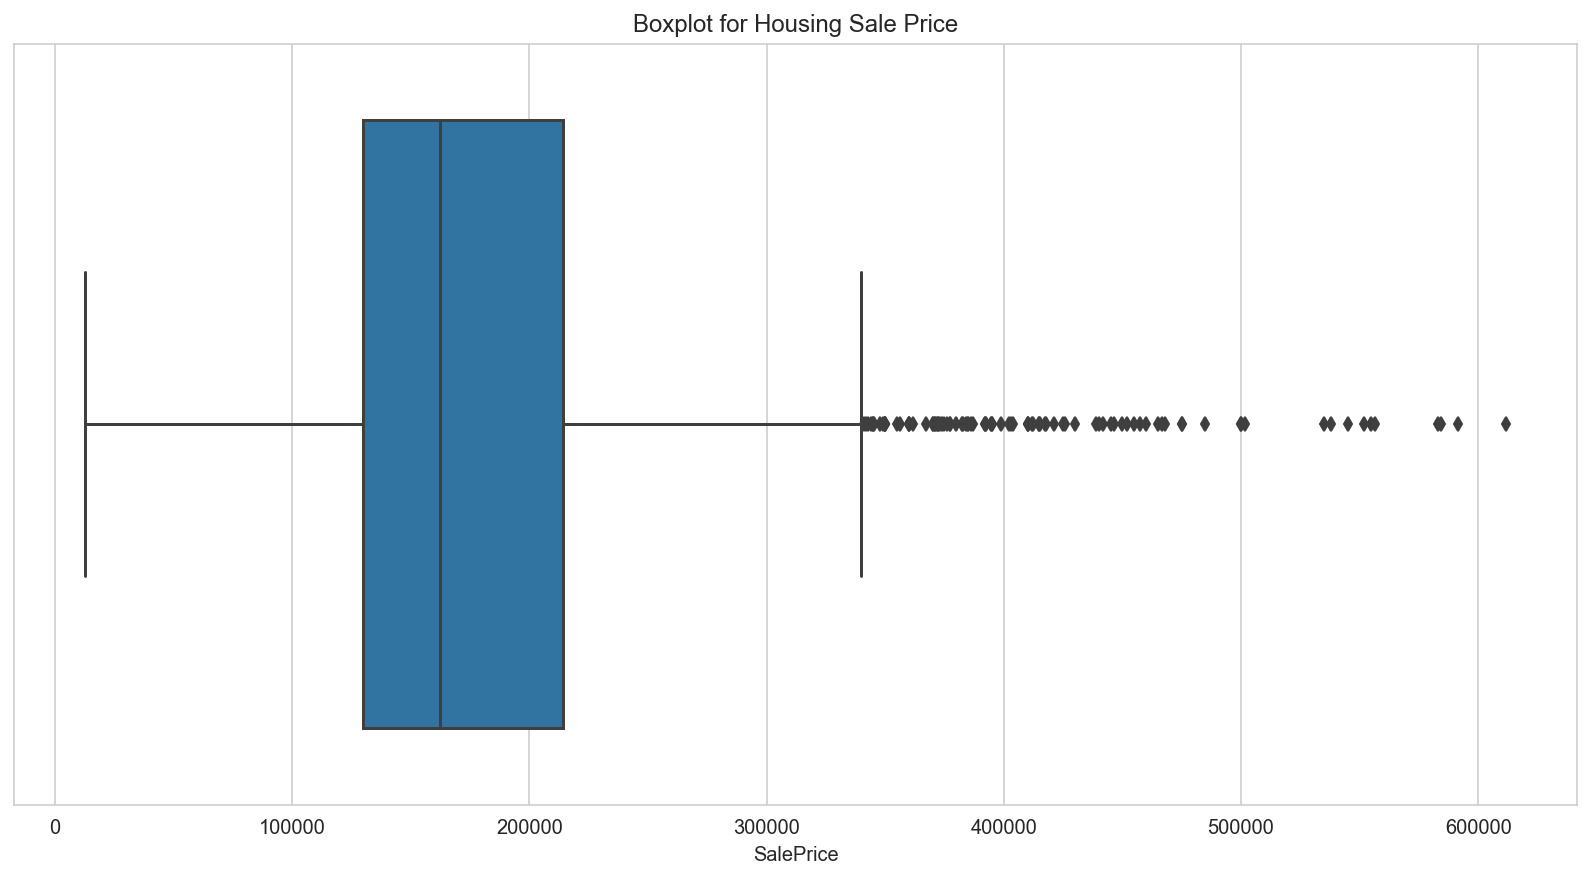

In [10]:
# create a boxplot for SalePrice to identify outliers

plt.figure(figsize=(14,7))
plt.title('Boxplot for Housing Sale Price')
sns.boxplot(train.SalePrice)

- From the above boxplot, the median housing sale price is USD 162,500.

- There are several outliers, with the maximum housing sale price reaching USD 611,657.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Housing Sale Price'}, xlabel='SalePrice', ylabel='Density'>

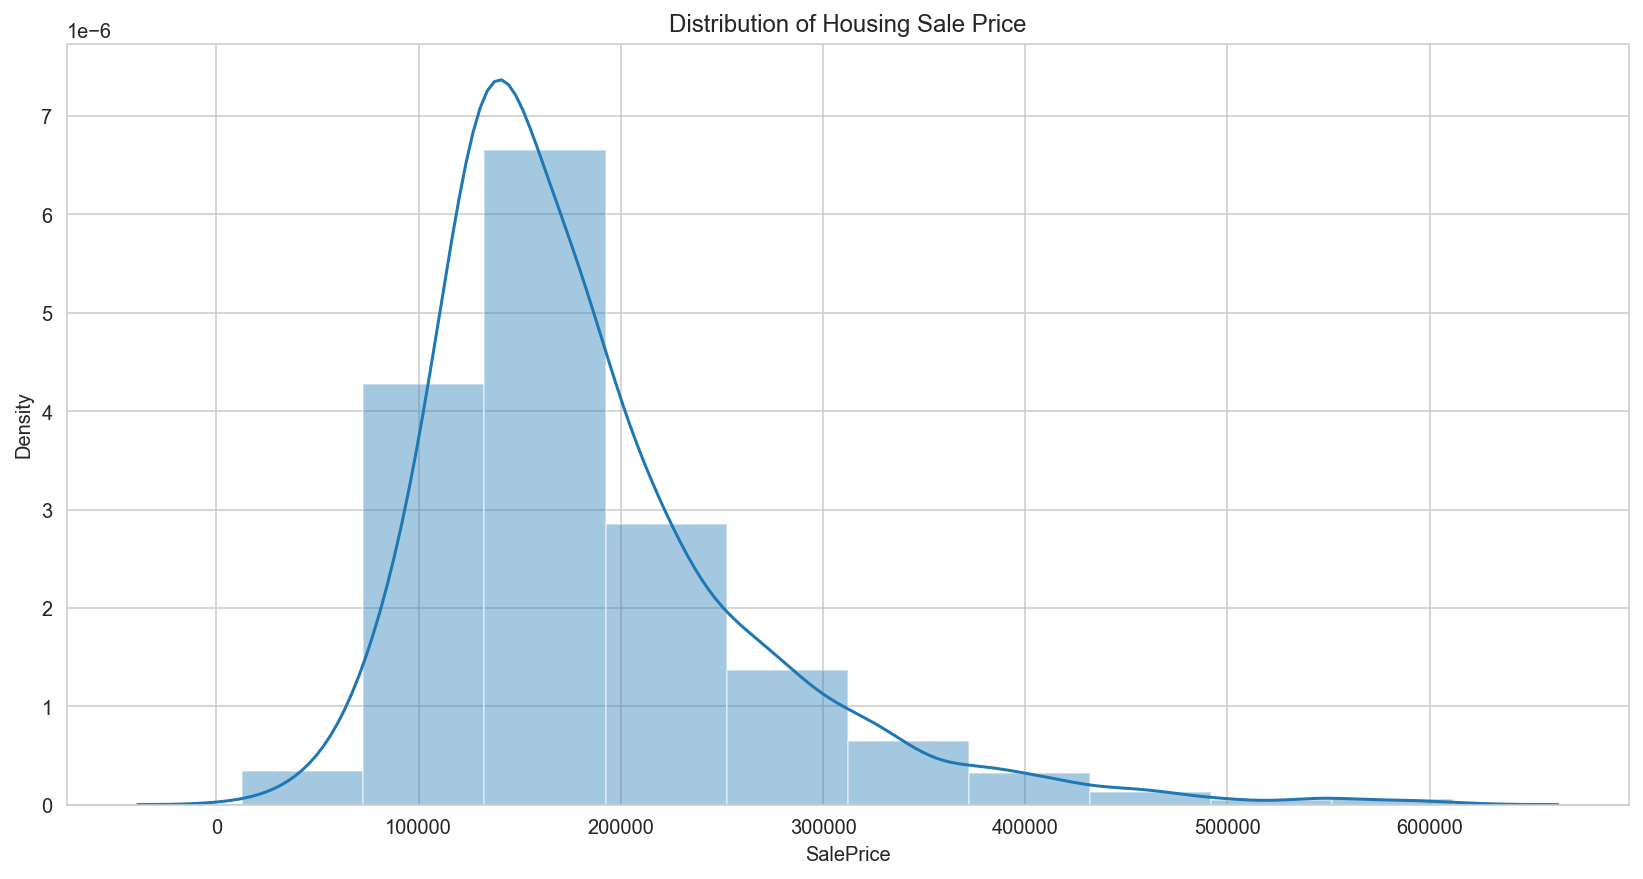

In [11]:
# view the distribution of SalePrice

plt.figure(figsize=(14,7))
plt.title('Distribution of Housing Sale Price')
sns.distplot(train['SalePrice'], bins=10, kde=True)

In [12]:
# obtain the skew and kurtosis of the SalePrice distribution

print("Skew is:", train.SalePrice.skew())
print("Kurtosis: %f" % train.SalePrice.kurt())

Skew is: 1.5575514385863427
Kurtosis: 3.579003


- From the above histogram, we observe that the distribution of housing sale prices seems to be strongly right-skewed. 
    - This means that there is a strong concentration of housing prices around the median sale value, with a smaller number of houses towards the higher/expensive price value. Thus, the housing sale priecs are not normally distributed. 
- What this implies is that we will need to apply logarithmic transformation to normalise the housing sale prices, to reduce the amount of biased predictions subsequently.

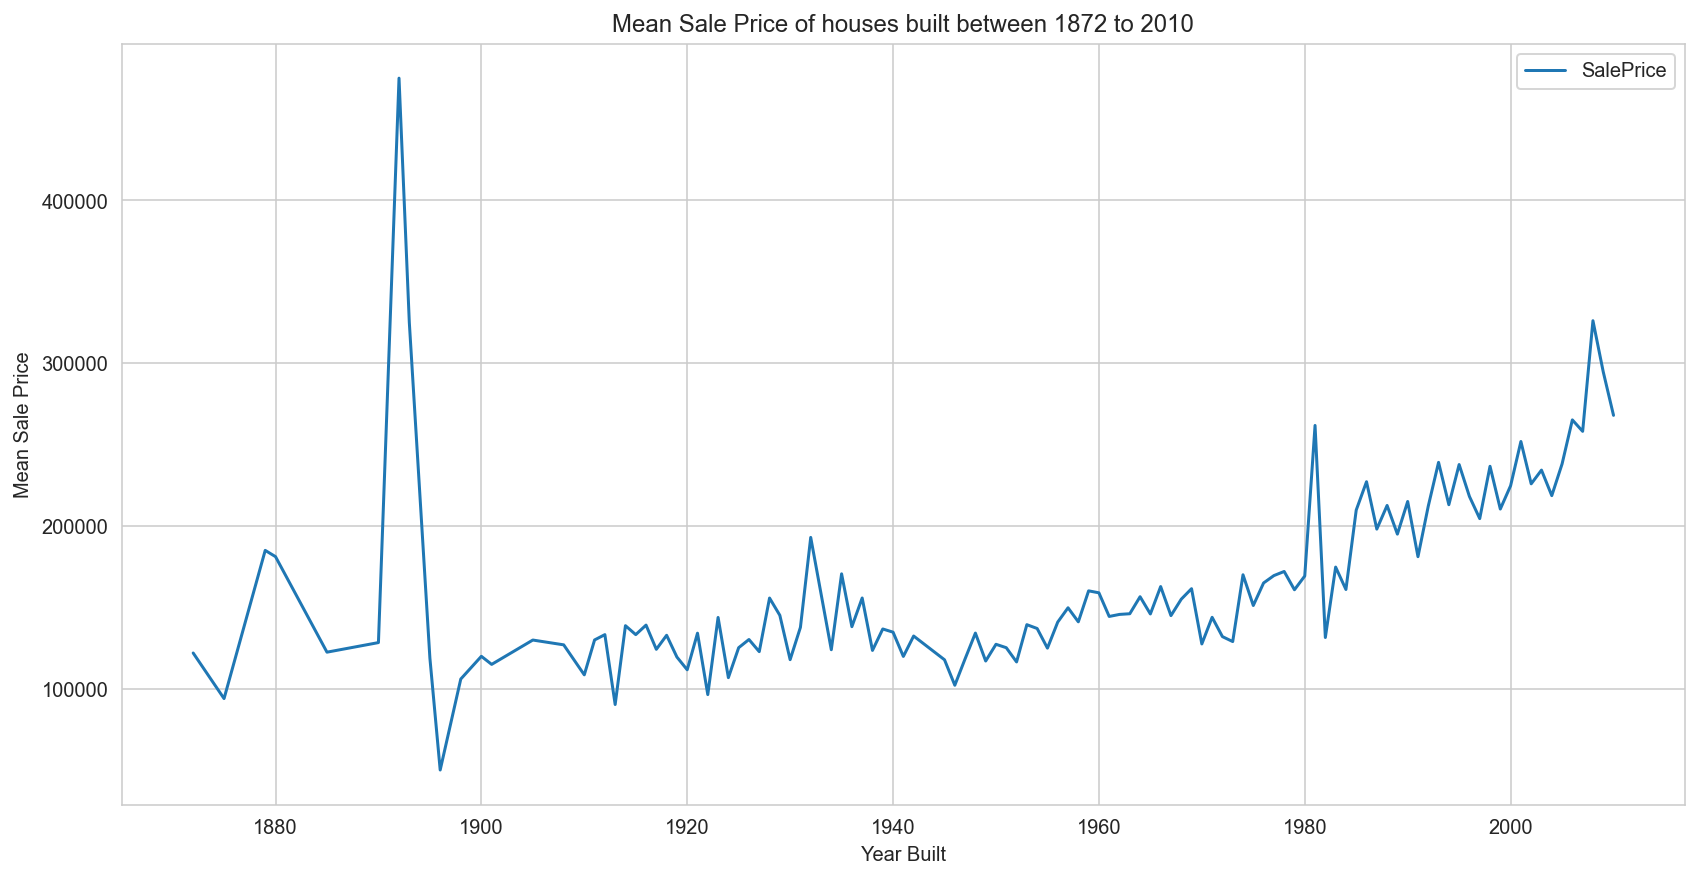

In [13]:
# view the distribution of mean SalePrice based on Year Built

train[['Year Built','SalePrice']].groupby(['Year Built'], as_index=True).mean().plot(figsize=(14,7))
plt.title('Mean Sale Price of houses built between 1872 to 2010')
plt.xlabel('Year Built')
plt.ylabel('Mean Sale Price');

From the above plot, the mean sale prices of the houses tend to fluctuate over the years the houses were built. 
- There was a sharp increase in the 1890s, followed by a rapid decline before 1900. 
- Subsequently, the mean sale price fluctuates up and down continuously, though at an increasing trend, till it hits above USD 300,000 in the 2000s.

<BarContainer object of 113 artists>

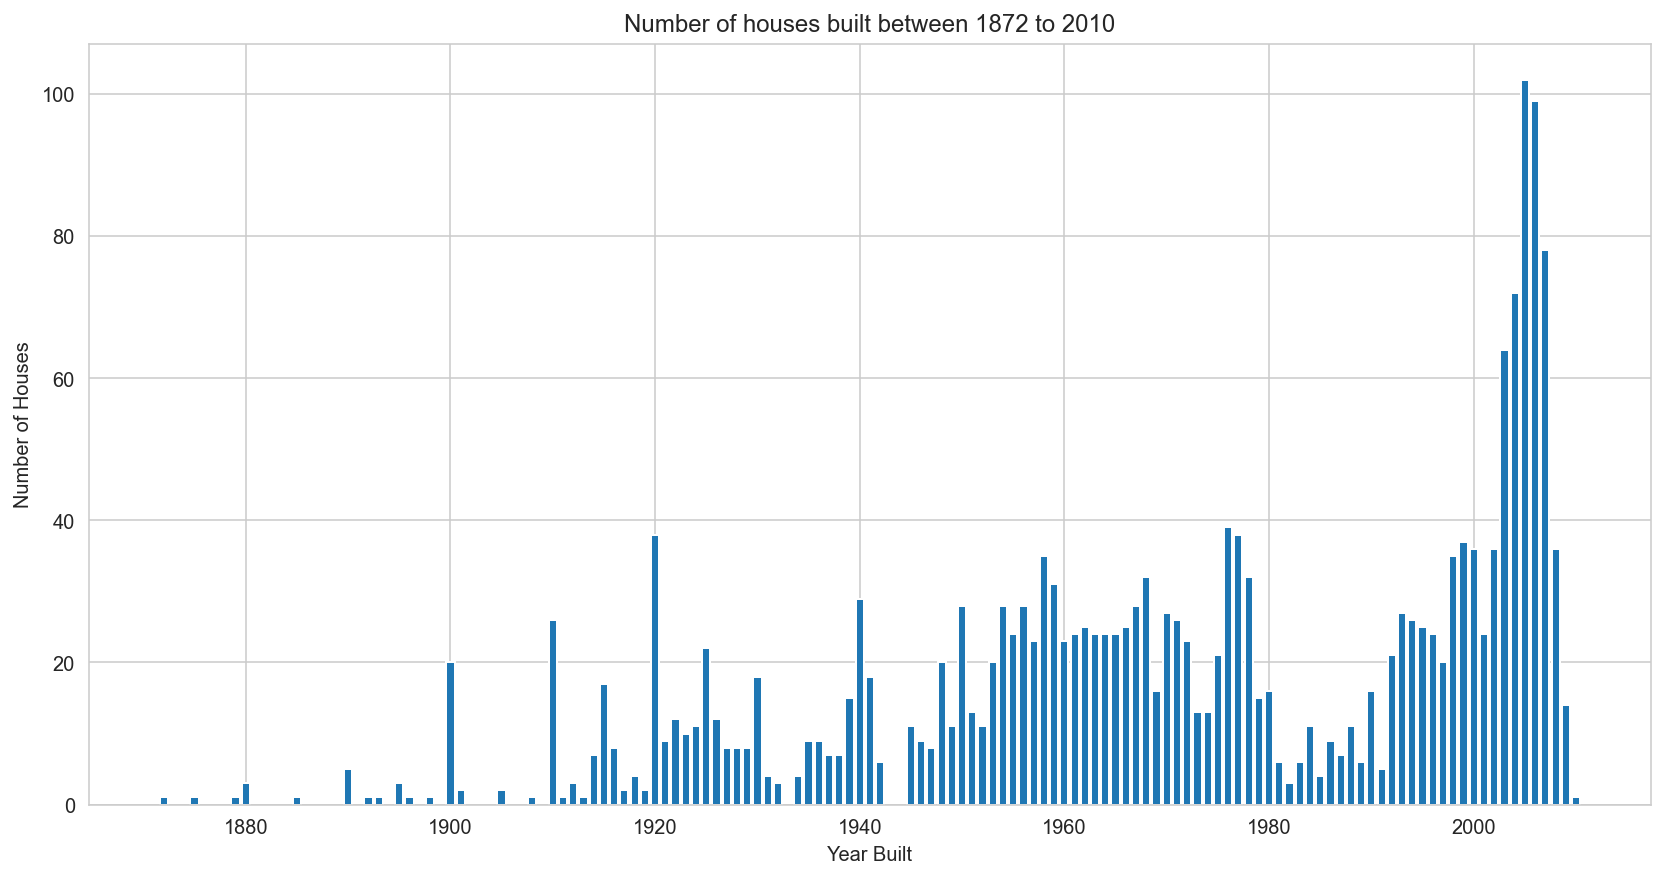

In [14]:
# view the distribution of no. of houses based on year built 

year_built = train['Year Built'].value_counts().reset_index(name='Year Built')
year_built.columns = ['Year Built', 'Count']
plt.figure(figsize=(14,7))
plt.xlabel('Year Built')
plt.ylabel('Number of Houses')
plt.title('Number of houses built between 1872 to 2010')
plt.bar(year_built['Year Built'], year_built['Count'])

- From the above bar chart, we observe a general increase in the number of houses built over the years. 
- Specifically, there's a spike in number of houses built after 2003, before declining after 2007. This is likely contributed by: 
    - The U.S. Federal Reserve reducing interest rates to tackle recession; 
    - Policies that encouraged home ownership were introduced, alongside financial products that increased the liquidity of assets in the real estate industry. 
- Thus, more investors shifted their focus into the business of buying and selling houses, away from the stock market after the burst of the dotcom bubble.
- Source: [Investopedia (Dec 2020)](https://www.investopedia.com/terms/h/housing_bubble.asp)

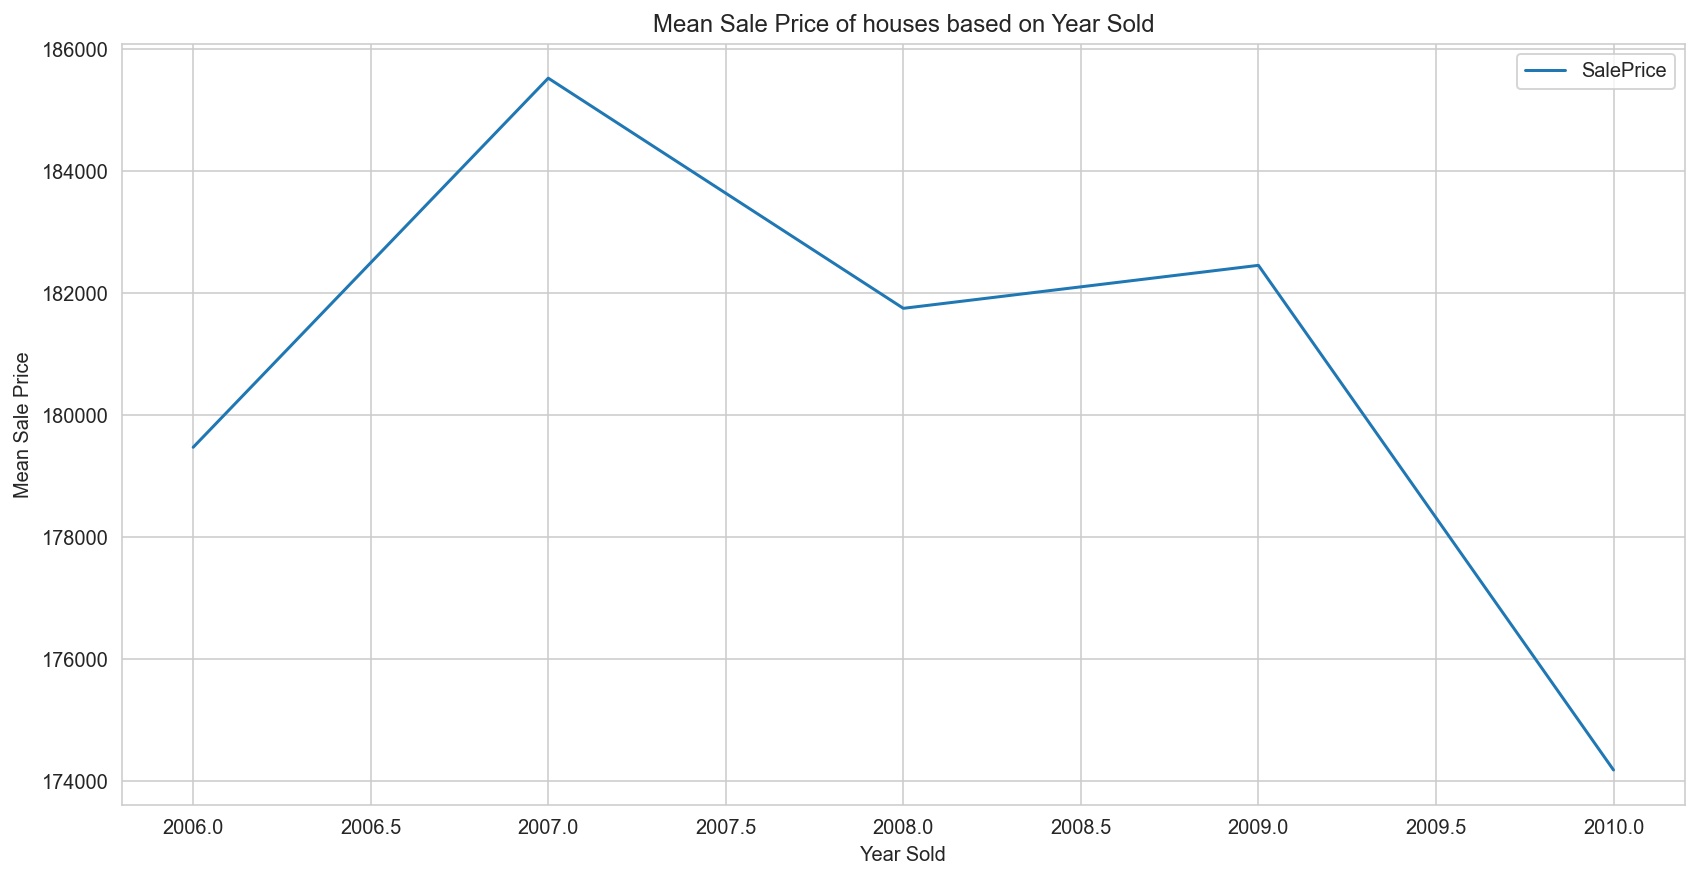

In [15]:
# view the distribution of mean SalePrice based on year sold

train[['Yr Sold','SalePrice']].groupby(['Yr Sold'], as_index=True).mean().plot(figsize=(14,7))
plt.title('Mean Sale Price of houses based on Year Sold');
plt.xlabel('Year Sold')
plt.ylabel('Mean Sale Price');

- From the above line chart, we observe that the mean sale price of houses increases between 2006 to 2007, before declining across 2008 to 2010.
    - With banks offering lower interest rates and relaxing their lending requirements, this prompted a home-buying frenzy which resulted in higher sale prices, as speculators would buy and sell houses for profits within a short period of time. 
    - However, as the stock market began to recover and interest rates started to rise from 2006-2007 onwards, investors stopped purchasing houses as the risk premium was too high and beyond control. 
    - This resulted in the decline of housing prices from 2007 to 2009, with investors selling their mortgage-backed securities, while others defaulted on their mortgage payments. 
    - Source: [Investopedia (Dec 2020)](https://www.investopedia.com/terms/h/housing_bubble.asp)

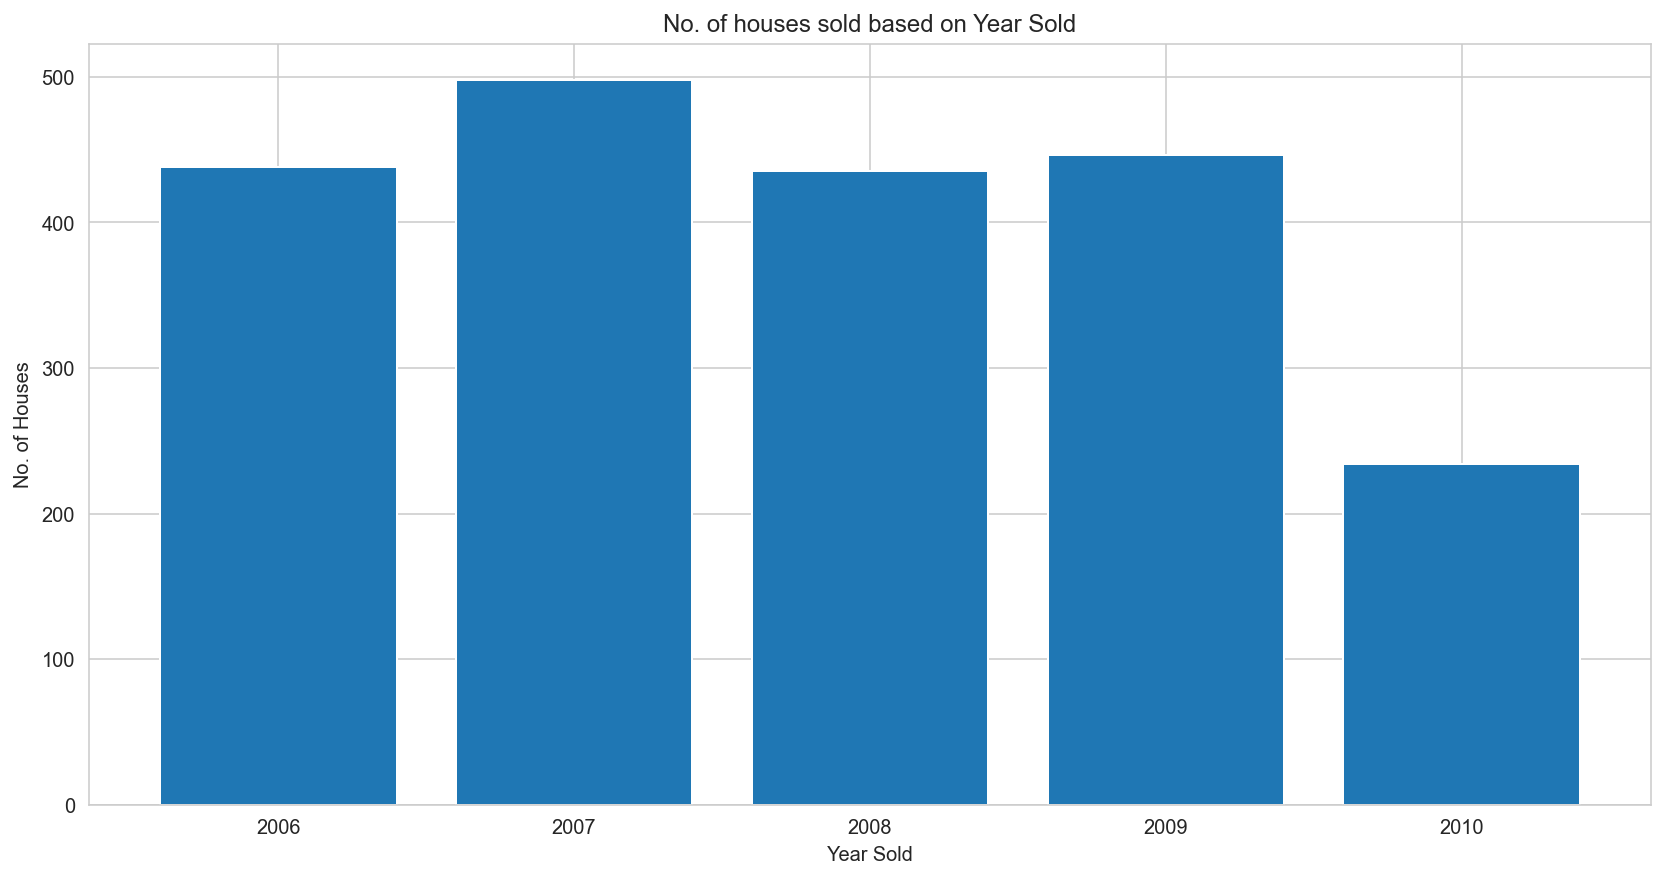

In [16]:
# view the distribution of no. of houses based on year sold 

year_sold = train['Yr Sold'].value_counts().reset_index(name='Yr Sold')
year_sold.columns = ['Yr Sold', 'Count']
plt.figure(figsize=(14,7))
plt.xlabel('Year Sold')
plt.ylabel('No. of Houses')
plt.title('No. of houses sold based on Year Sold')
plt.bar(year_sold['Yr Sold'], year_sold['Count']);

- From the above bar chart, we observe a similar trend in the number of houses sold between 2006 to 2010. 
    - There's an increase in number of houses sold from 2006 to 2007, as a result of lower interest rates and less stringent lending requirements. 
    - However, when the stock market recovered and interest rates increased, the number of houses sold declined from 2008 to 2010 as investors withdrew their investment in the real estate industry. 
    - Source: [Investopedia (Dec 2020)](https://www.investopedia.com/terms/h/housing_bubble.asp)

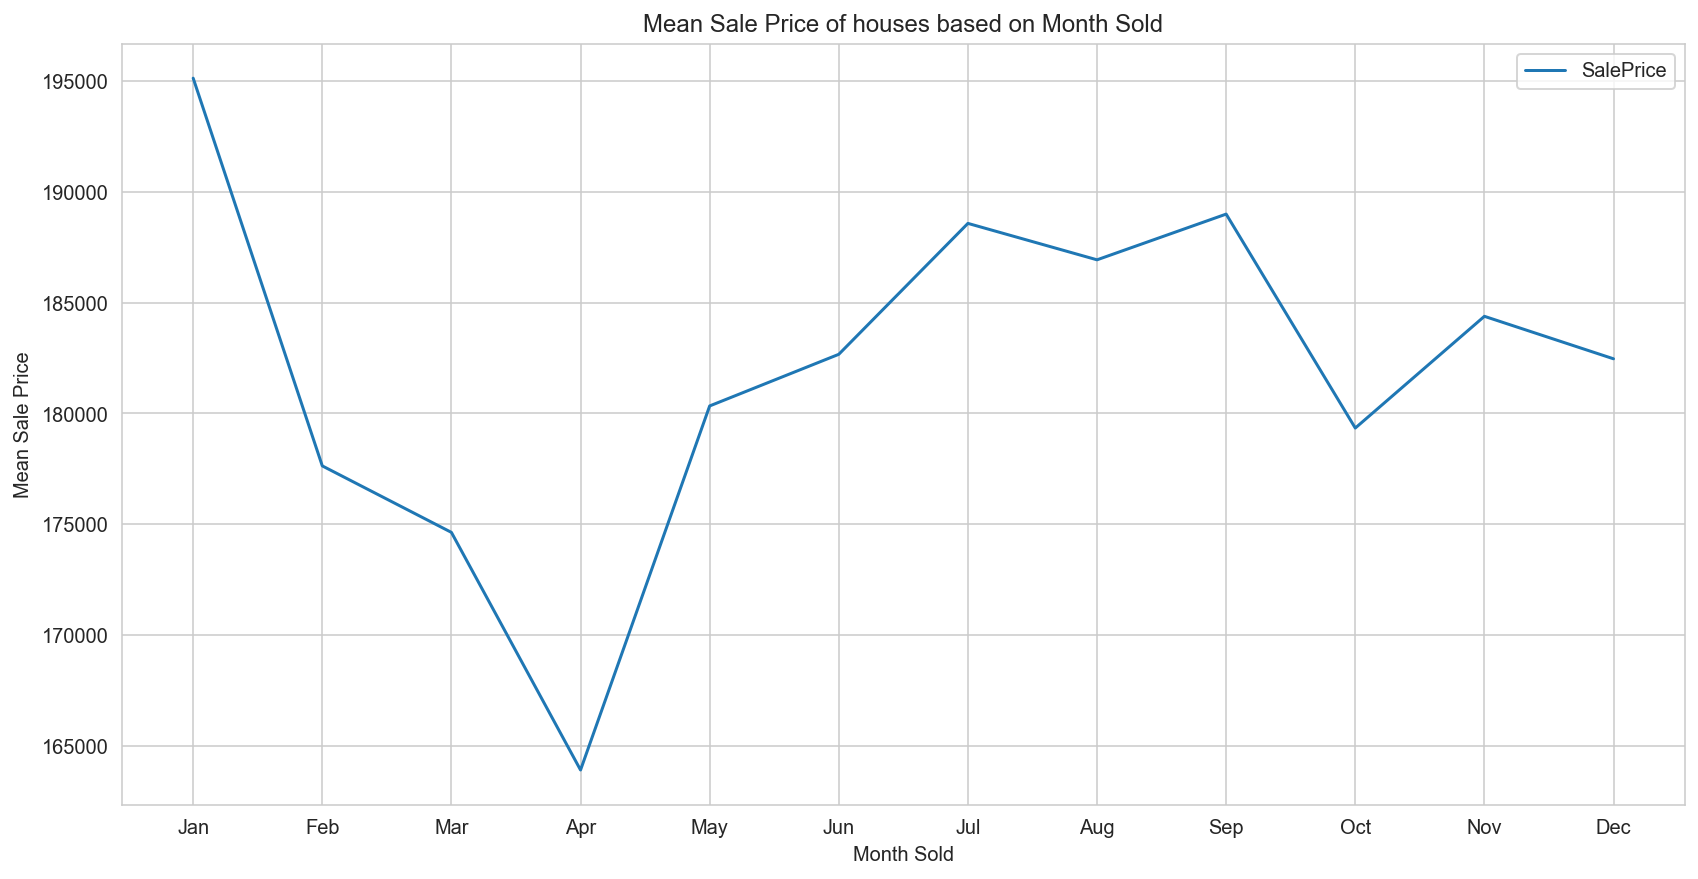

In [17]:
# view the distribution of mean SalePrice based on month sold

train[['Mo Sold','SalePrice']].groupby(['Mo Sold'], as_index=True).mean().plot(figsize=(14,7))
plt.title('Mean Sale Price of houses based on Month Sold');
plt.xlabel('Month Sold')
plt.ylabel('Mean Sale Price')
month_sold = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
month_label = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
plt.xticks(month_sold, month_label);

- From the above line chart, we observe that the mean sale price of houses is the highest in the month of January, followed by in September and July. 
- On the other hand, the mean sale price of houses is the lowest in the month of April, followed by March and February.

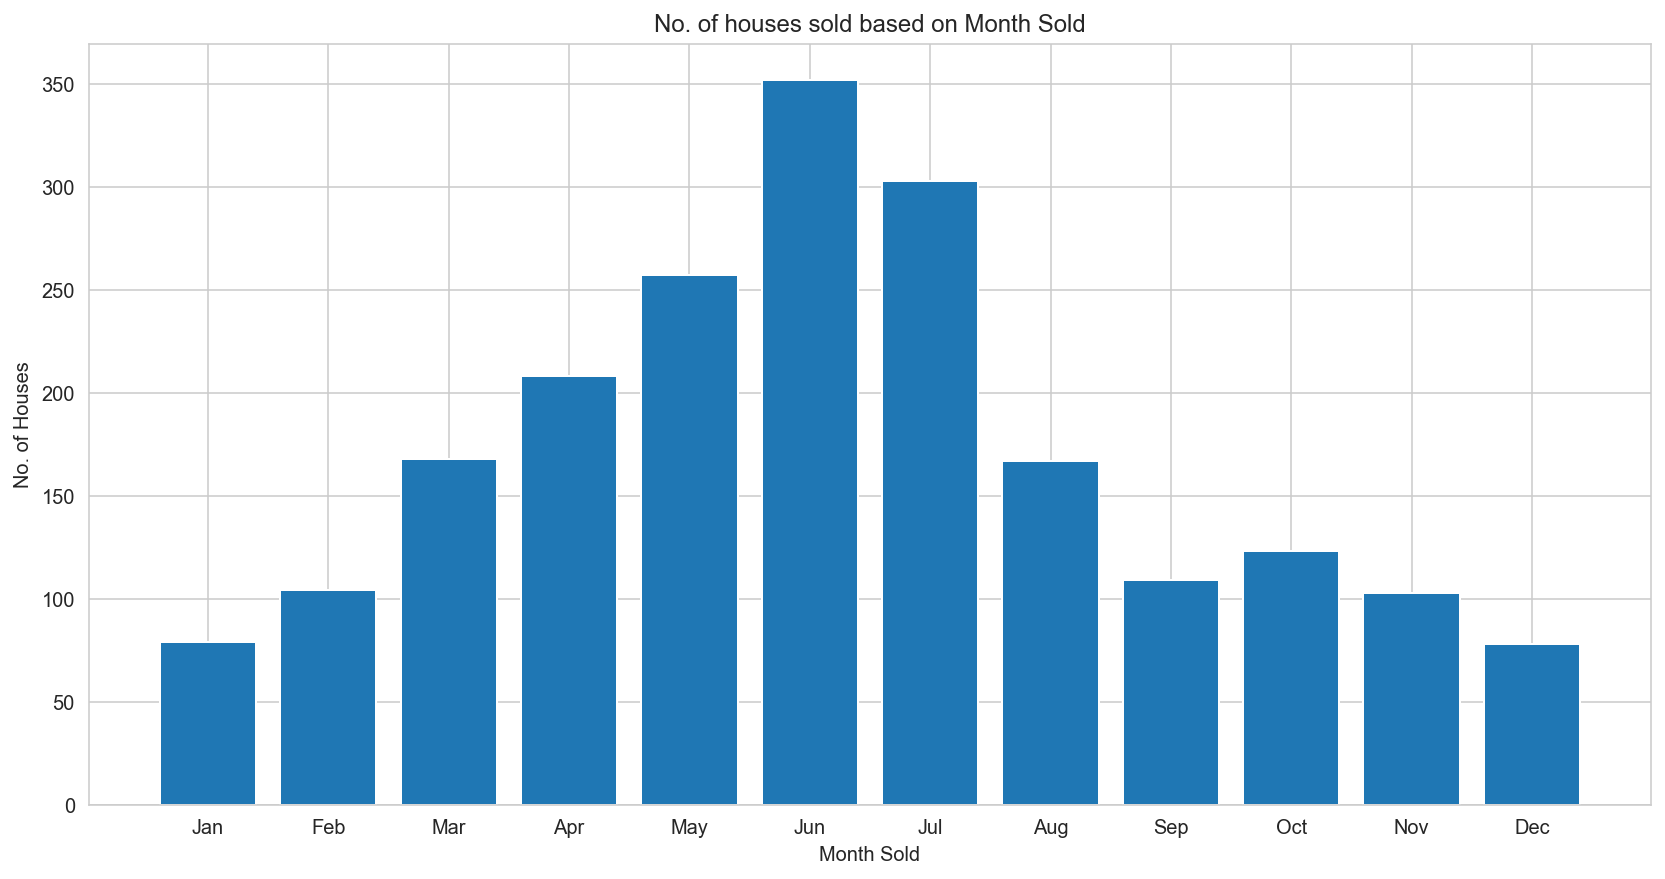

In [18]:
# view the distribution of no. of houses based on month sold 

month_sold = train['Mo Sold'].value_counts().reset_index(name='Mo Sold')
month_sold.columns = ['Mo Sold', 'Count']
plt.figure(figsize=(14,7))
plt.xlabel('Month Sold')
plt.ylabel('No. of Houses')
plt.title('No. of houses sold based on Month Sold')
month_sold_label = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
month_name_label = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
plt.xticks(month_sold_label, month_name_label)
plt.bar(month_sold['Mo Sold'], month_sold['Count']);

- From the above bar chart, we observe that the number of houses sold is the highest in the month of June, followed by in July and May. 
- On the other hand, the number of houses sold is the lowest in the month of December, followed by January and November. 


- This seems to correspond with the mean sale price of houses sold, for instance: 
    - When the mean sale price of house is highest in January, we observe one of the lowest number of houses sold in the month. 
    - When the mean sale prices are lower across February to May, we observe higher number of houses being sold over those months.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'No. of Houses in each Neighborhood'}, xlabel='Neighborhood', ylabel='Count'>

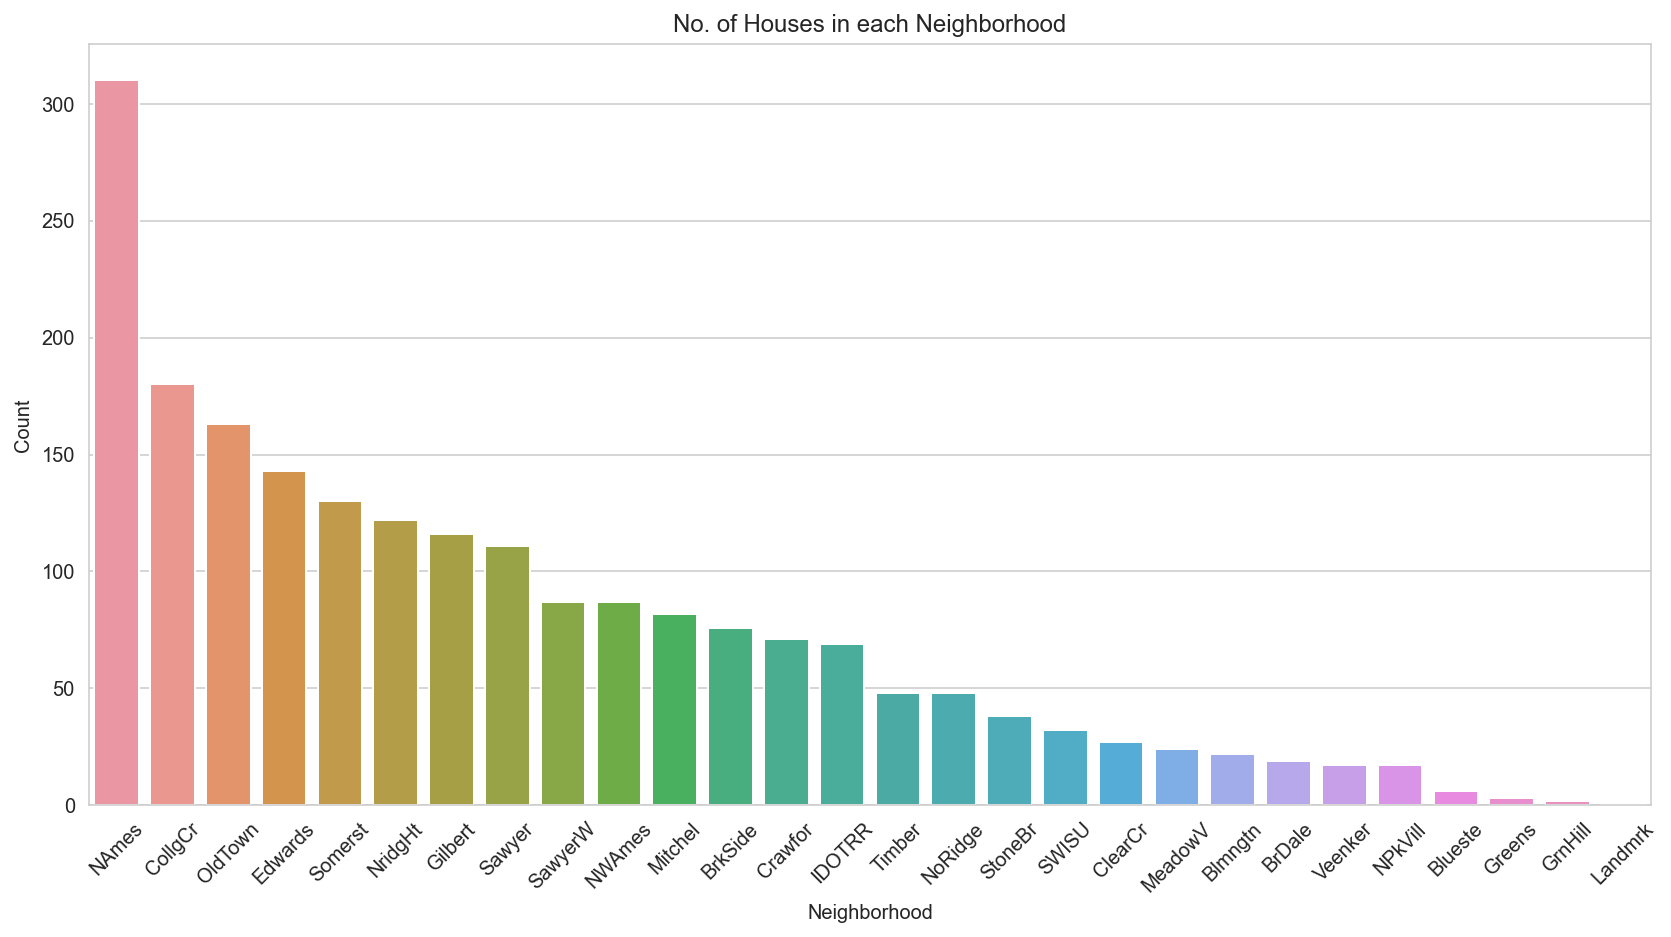

In [19]:
# view the distribution of no. of houses based on neighborhood

neighborhood = train['Neighborhood'].value_counts().reset_index(name='Neighborhood')
neighborhood.columns = ['Neighborhood', 'Count']
plt.figure(figsize=(14,7))
plt.xlabel('Neighborhood')
plt.ylabel('No. of Houses')
plt.xticks(rotation=45)
plt.title('No. of Houses in each Neighborhood')
sns.barplot(neighborhood['Neighborhood'], neighborhood['Count'])

- From the above bar chart, we observe that North Ames ('NAmes') has the highest number of houses sold (above 300), followed by College Creek ('CollgCr') and Old Town ('OldTown'). 
- On the other hand, Landmark ('Landmrk') has the lowest number of houses sold, followed by Green Hills ('GrnHill') and Greens ('Greens'). 

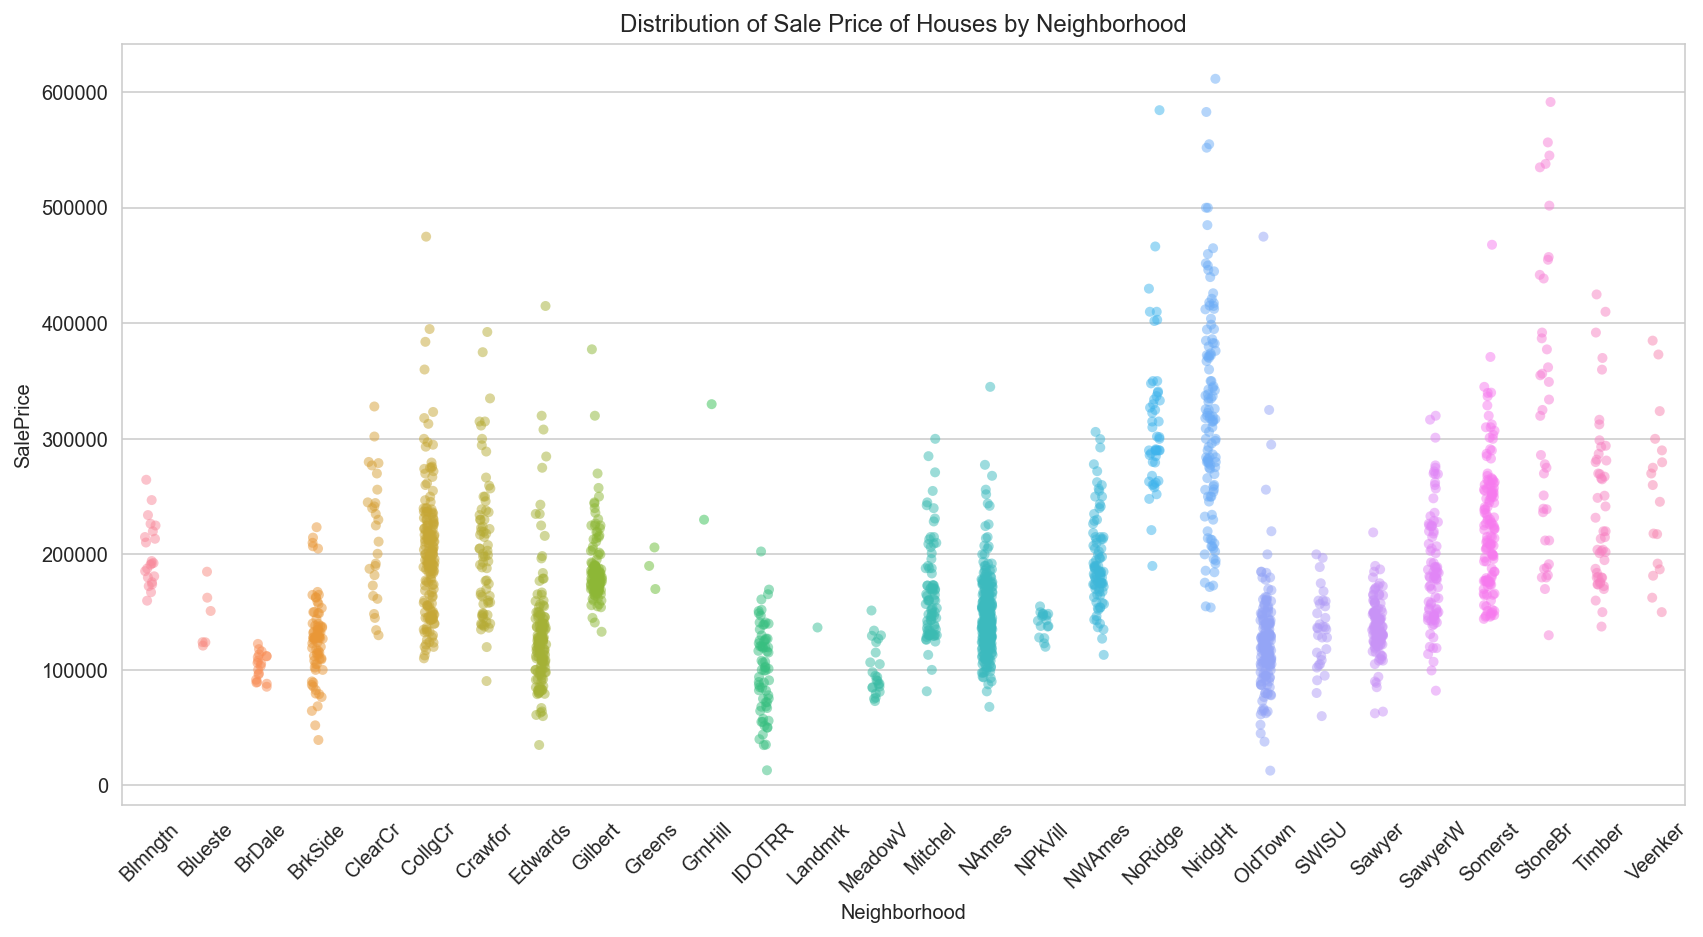

In [20]:
# view the distribution of SalePrice based on Neighborhood

plt.figure(figsize=(14,7))
sns.stripplot(x=train['Neighborhood'], y=train['SalePrice'], order=np.sort(train['Neighborhood'].unique()), jitter=0.1, alpha=0.5)
plt.xticks(rotation=45)
plt.title('Distribution of Sale Price of Houses by Neighborhood');

- As for the sale prices of houses in the respective neighborhood, Northridge ('NoRidge'), Northridge Heights ('NridgHt') and Stone Brook ('StoneBr') seem to command one of the highest sale prices for housing. 
- On the other hand, Iowa DOT and Rail Road ('IDOTRR'), Old Town ('OldTown') and Brookside ('BrkSide') seem to command one of the lowest sale prices for housing. 


- When compared to the number of houses sold in the neighborhood, one of the reason why North Ames has the highest number of houses sold could be due to its affordable housing price, predominantly between USD 100,000 to USD 200,000. 
    - However, there could also be other factors affecting the sale price, which we would need to investigate further. 

In [21]:
# print the value counts for all 'object' variables with more than 1 null value 

def valuecount_with_nulls(df):
    for i in df:
        if df[i].dtype=='O' and df[i].isnull().sum()>0:
            print(df[i].value_counts())  
            print("Number of null values: " + str(df[i].isnull().sum()))
            print("Proportion of null values = " + str(np.round((df[i].isnull().sum() / 20.50), 2)) + "%")
            print('\n')

valuecount_with_nulls(train)

Grvl    85
Pave    55
Name: Alley, dtype: int64
Number of null values: 1911
Proportion of null values = 93.22%


None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64
Number of null values: 22
Proportion of null values = 1.07%


TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64
Number of null values: 55
Proportion of null values = 2.68%


TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64
Number of null values: 55
Proportion of null values = 2.68%


No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64
Number of null values: 58
Proportion of null values = 2.83%


GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64
Number of null values: 55
Proportion of null values = 2.68%


Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64
Number of null values: 56
Pro

- There are 15 categorical variables with more than 1 null value, in which the column with the highest proportion of null values is Pool Quality ('Pool QC'), with 99.61% of its values being null.

In [22]:
# print the value counts for all 'object' variables with no null values

def valuecount_with_no_null(df):
    for i in df:
        if df[i].dtype=='O' and df[i].isnull().sum()==0:
            print(df[i].value_counts())  
            print("Number of null values: " + str(df[i].isnull().sum()))
            print('\n')

valuecount_with_no_null(train)

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
Number of null values: 0


Pave    2044
Grvl       7
Name: Street, dtype: int64
Number of null values: 0


Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64
Number of null values: 0


Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64
Number of null values: 0


AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64
Number of null values: 0


Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64
Number of null values: 0


Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64
Number of null values: 0


NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR   

- There are 27 categorical variables with no null values. 

In [23]:
# compute the mean Sale price for all 'object' variables (categorical)

def mean_price_categorical_var(df):
    for i in df:
        if df[i].dtype == 'O':
            print(train.groupby(i)['SalePrice'].mean())  
            print("\n")

print(mean_price_categorical_var(train))

MS Zoning
A (agr)     47300.000000
C (all)     78010.894737
FV         218618.316832
I (all)     57625.000000
RH         148859.571429
RL         191235.164581
RM         129119.142405
Name: SalePrice, dtype: float64


Street
Grvl     86901.428571
Pave    181793.565558
Name: SalePrice, dtype: float64


Alley
Grvl    120835.635294
Pave    174534.709091
Name: SalePrice, dtype: float64


Lot Shape
IR1    211848.670520
IR2    233954.745455
IR3    193182.222222
Reg    162925.812355
Name: SalePrice, dtype: float64


Land Contour
Bnk    142868.775000
HLS    262353.376471
Low    199313.116279
Lvl    178998.564840
Name: SalePrice, dtype: float64


Utilities
AllPub    181551.602245
NoSeWa    137500.000000
NoSewr     57625.000000
Name: SalePrice, dtype: float64


Lot Config
Corner     180629.591954
CulDSac    230744.358779
FR2        174703.600000
FR3        198600.000000
Inside     177537.014637
Name: SalePrice, dtype: float64


Land Slope
Gtl    180358.476703
Mod    204639.465909
Sev    194598.

In [24]:
# compute the mean sale price for MS SubClass:

train.groupby('MS SubClass')['SalePrice'].mean()

MS SubClass
20     189305.488312
30      94936.346535
40     119125.000000
45     116372.727273
50     137270.000000
60     239225.769036
70     153354.455556
75     204875.000000
80     169569.825581
85     154398.214286
90     139296.333333
120    211813.613636
150    148400.000000
160    138452.215909
180    109672.727273
190    124310.326087
Name: SalePrice, dtype: float64

Earlier, we see that mean value of sale price is USD 181,470, while its median value is USD 162,500.

Some of these features come across as 'surprising' as they contribute to one of the highest sales prices (above mean sale price of USD 181,470) when compared within their respective category:  
- MS Zoning - Floating Village Residential ('FV')
- Lot Shape - Moderately irregular ('IR2')
- Land Contour - Banked ('Bnk')
- Lot Config - Cul-de-sac ('CulDSac')
- Land Slope - Moderate slope ('Mod')
- Bldg Type - Townhouse E ('TwnhsE')
- Roof Style - Hip
- Roof Matl - Wood Shingles ('WdShng1')
- Exterior 1st - Imitation Stucco ('ImStucc')
- Exterior 2nd - Cement Board ('CmentBd')
- Bsmt Cond - Good
- Bsmt Exposure - Good
- Garage Qual - Good
- Garade Cond - Good
- MS SubClass - 2-STORY 1946 & NEWER ('60')

These features are expected for contributing to one of the highest sales prices when compared within their respective category:  
- Street - Paved ('Pave')
- Alley - Paved ('Pave')
- Utilities - All public utilities ('AllPub')
- Neighbourhood - Stone Brook ('StoneBr')
- Condition 1 - Near positive off-site feature--park, greenbelt, etc. ('PosN')
- Condition 2 - Near positive off-site feature--park, greenbelt, etc. ('PosN')
- House Style - Two and one-half story: 2nd level finished ('2.5Fin')
- Mas Vnr Type - Stone
- Exter Qual - Excellent ('Ex')
- Exter Cond - Excellent ('Ex')
- Foundation - Poured Concrete ('PConc')
- Bsmt Qual - Excellent ('Ex')
- BsmtFin Type 1 - Good Living Quarters ('GLQ')
- BsmtFin Type 2 - Good Living Quarters ('GLQ')
- Heating - Gas forced warm air furnace ('GasA')
- Heating QC - Excellent ('Ex')
- Central Air - Yes ('Y')
- Electrical - Standard Circuit Breakers & Romex ('SBrkr')
- Kitchen Quality - Excellent ('Ex')
- Functional - Typical Functionality ('Typ')
- Fireplace Qu - Excellent ('Ex')
- Garage Type - Built-In ('BuiltIn')
- Garage Finish - Finished ('Fin')
- Paved Drive - Yes ('Y')
- Pool QC - Excellent ('Ex')
- Fence - Good Privacy ('GdPrv')
- Misc Feature - Tennis Court ('TenC')
- Sale Type - Home just constructed and sold ('New')

### Exploring Test Data

In [25]:
# check the shape of the test data

test.shape

# 878 rows, 80 columns

(878, 80)

In [26]:
# check the datatype of the test data

test.info()

# the only column missing from test data is the SalePrice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [27]:
# check if there are null values in the test data

print(test.isnull().sum().sort_values(ascending=False).to_string())

Pool QC            874
Misc Feature       837
Alley              820
Fence              706
Fireplace Qu       422
Lot Frontage       160
Garage Cond         45
Garage Qual         45
Garage Yr Blt       45
Garage Finish       45
Garage Type         44
Bsmt Exposure       25
BsmtFin Type 1      25
Bsmt Qual           25
BsmtFin Type 2      25
Bsmt Cond           25
Mas Vnr Area         1
Mas Vnr Type         1
Electrical           1
Overall Cond         0
Exter Qual           0
Exter Cond           0
Foundation           0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
Roof Style           0
Year Remod/Add       0
Year Built           0
Sale Type            0
Overall Qual         0
House Style          0
Bldg Type            0
Condition 2          0
Condition 1          0
Land Slope           0
Lot Config           0
Utilities            0
Land Contour         0
Lot Shape            0
Street               0
Lot Area             0
MS Zoning            0
MS SubClass

In [28]:
# obtain the computations of the numerical values in the test data

test.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count   878.000000  8.780000e+02   878.000000    718.000000     878.000000   
mean   1444.749431  7.162867e+08    58.268793     69.545961   10307.033030   
std     850.838263  1.889103e+08    42.235407     23.533945   10002.674602   
min       2.000000  5.263021e+08    20.000000     21.000000    1477.000000   
25%     692.250000  5.284841e+08    20.000000     59.000000    7297.250000   
50%    1433.000000  5.354542e+08    50.000000     68.000000    9446.000000   
75%    2197.500000  9.071904e+08    70.000000     80.000000   11589.000000   
max    2928.000000  1.007100e+09   190.000000    182.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count    878.000000    878.000000   878.000000      878.000000    877.000000   
mean       6.050114      5.566059  1970.492027     1984.417995    106.236032   
std        1.369065      1.128903    30.395895       20.450725    187.158908   
min        2.000000      1.000000  1880.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1967.000000      0.000000   
50%        6.000000      5.000000  1972.000000     1992.000000      0.000000   
75%        7.000000      6.000000  1999.750000     2003.000000    172.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1378.000000   

       ...  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
count  ...   878.000000    878.000000     878.000000      878.000000   
mean   ...   470.362187     93.430524      47.070615       24.064920   
std    ...   212.734075    121.181702      68.180939       73.249463   
min    ...     0.000000      0.000000       0.000000        0.000000   
25%    ...   322.500000      0.000000       0.000000        0.000000   
50%    ...   473.000000      0.000000      27.000000        0.000000   
75%    ...   576.000000    170.750000      69.750000        0.000000   
max    ...  1488.000000    690.000000     742.000000     1012.000000   

       3Ssn Porch  Screen Porch   Pool Area      Misc Val     Mo Sold  \
count  878.000000    878.000000  878.000000    878.000000  878.000000   
mean     2.597950     14.830296    1.884966     48.498861    6.202733   
std     24.962482     53.003794   29.916672    550.169317    2.642498   
min      0.000000      0.000000    0.000000      0.000000    1.000000   
25%      0.000000      0.000000    0.000000      0.000000    5.000000   
50%      0.000000      0.000000    0.000000      0.000000    6.000000   
75%      0.000000      0.000000    0.000000      0.000000    8.000000   
max    360.000000    576.000000  555.000000  15500.000000   12.000000   

           Yr Sold  
count   878.000000  
mean   2007.825740  
std       1.327861  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 38 columns]

- There should be a total of 878 rows in each column - however, some columns do not have 878 rows, indicating that null values are present.

In [29]:
# print the value counts for all 'object' variables with more than 1 null value 

valuecount_with_nulls(test)

Grvl    35
Pave    23
Name: Alley, dtype: int64
Number of null values: 820
Proportion of null values = 40.0%


None       534
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64
Number of null values: 1
Proportion of null values = 0.05%


TA    396
Gd    355
Ex     73
Fa     28
Po      1
Name: Bsmt Qual, dtype: int64
Number of null values: 25
Proportion of null values = 1.22%


TA    781
Fa     39
Gd     33
Name: Bsmt Cond, dtype: int64
Number of null values: 25
Proportion of null values = 1.22%


No    567
Av    130
Gd     80
Mn     76
Name: Bsmt Exposure, dtype: int64
Number of null values: 25
Proportion of null values = 1.22%


Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
Name: BsmtFin Type 1, dtype: int64
Number of null values: 25
Proportion of null values = 1.22%


Unf    749
LwQ     29
Rec     26
BLQ     20
ALQ     18
GLQ     11
Name: BsmtFin Type 2, dtype: int64
Number of null values: 25
Proportion of null values = 1.

- There are 16 categorical variables with more than 1 null value, in which the column with the highest proportion of null values is Miscellaneous Feature ('Misc Feature'), with 40.83% of its values being null.

In [30]:
# print the value counts for all 'object' variables with no null values

valuecount_with_no_null(test)

RL         674
RM         146
FV          38
RH          13
C (all)      6
I (all)      1
Name: MS Zoning, dtype: int64
Number of null values: 0


Pave    873
Grvl      5
Name: Street, dtype: int64
Number of null values: 0


Reg    564
IR1    286
IR2     21
IR3      7
Name: Lot Shape, dtype: int64
Number of null values: 0


Lvl    790
Bnk     36
HLS     35
Low     17
Name: Land Contour, dtype: int64
Number of null values: 0


AllPub    877
NoSewr      1
Name: Utilities, dtype: int64
Number of null values: 0


Inside     636
Corner     163
CulDSac     49
FR2         25
FR3          5
Name: Lot Config, dtype: int64
Number of null values: 0


Gtl    835
Mod     37
Sev      6
Name: Land Slope, dtype: int64
Number of null values: 0


NAmes      133
CollgCr     87
OldTown     76
Somerst     52
Edwards     50
Gilbert     49
NridgHt     44
NWAmes      44
Sawyer      40
SawyerW     38
Crawfor     32
Mitchel     32
BrkSide     32
Timber      24
IDOTRR      24
NoRidge     23
ClearCr     17
SWISU 

- There are 26 categorical variables with no null values.

### Cleaning Train & Test Data

In [31]:
# view the columns in train data
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [32]:
# view the columns in test data 
test.columns

# only SalePrice is missing in test data

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sale Price')

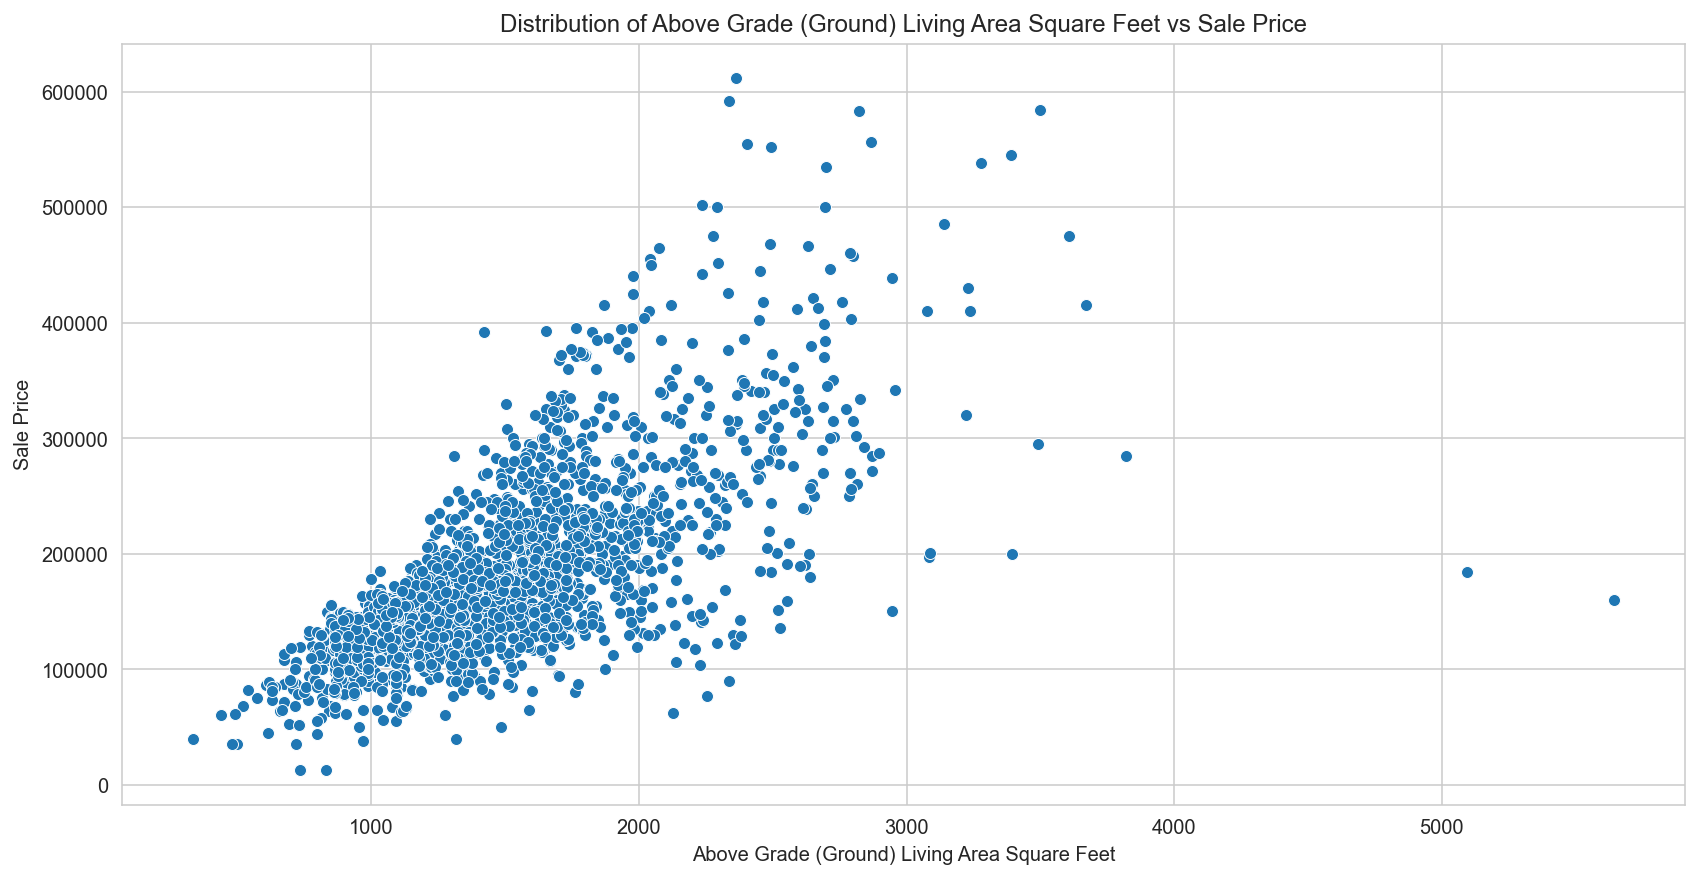

In [33]:
# view the outliers based on SalePrice vs Gr Liv Area in train data

plt.figure(figsize=(14,7))
sns.scatterplot(train['Gr Liv Area'], train['SalePrice'])

plt.title('Distribution of Above Grade (Ground) Living Area Square Feet vs Sale Price')
plt.xlabel('Above Grade (Ground) Living Area Square Feet')
plt.ylabel('Sale Price')

- From the above scatter plot, it could be seen that as above grade (ground) living area in square feet increases, the sale price of the houses also increases.
- There are two observations with large above grade (ground) living area (i.e. more than 5,000 square feet) that are priced relatively low (i.e. below USD 200,000).
    - Since it is unusual to have such sales, these two observations would be removed from the train dataset.

In [34]:
# drop the outliers for 'Gr Liv Area' > 4000 in train data (as listed in the instruction from Kaggle)

train = train.drop(train[train['Gr Liv Area']>4000].index, inplace=False)

In [35]:
# check if the outliers for 'Gr Liv Area' > 4000 in train data are completely dropped

train[train['Gr Liv Area']>4000]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

- To make it easier to effect changes across both train and test data set, we will combine both data sets into one DataFrame.

In [36]:
# combine both train and test data

combined = pd.concat([train,test], ignore_index=True)

In [37]:
# view combined dataset

combined

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2922  1662  527377110           60        RL          80.0      8000   Pave   
2923  1234  535126140           60        RL          90.0     14670   Pave   
2924  1373  904100040           20        RL          55.0      8250   Pave   
2925  1672  527425140           20        RL          60.0      9000   Pave   
2926  1939  535327160           20        RL          70.0      8400   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC  Fence  \
0      NaN       IR1          Lvl  ...            0         0     NaN    NaN   
1      NaN       IR1          Lvl  ...            0         0     NaN    NaN   
2      NaN       Reg          Lvl  ...            0         0     NaN    NaN   
3      NaN       Reg          Lvl  ...            0         0     NaN    NaN   
4      NaN       IR1          Lvl  ...            0         0     NaN    NaN   
...    ...       ...          ...  ...          ...       ...     ...    ...   
2922   NaN       Reg          Lvl  ...            0         0     NaN    NaN   
2923   NaN       Reg          Lvl  ...            0         0     NaN  MnPrv   
2924   NaN       Reg          Lvl  ...            0         0     NaN    NaN   
2925   NaN       Reg          Lvl  ...            0         0     NaN   GdWo   
2926   NaN       Reg          Lvl  ...            0         0     NaN   GdWo   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0             NaN        0       3    2010        WD    130500.0  
1             NaN        0       4    2009        WD    220000.0  
2             NaN        0       1    2010        WD    109000.0  
3             NaN        0       4    2010        WD    174000.0  
4             NaN        0       3    2010        WD    138500.0  
...           ...      ...     ...     ...        ...        ...  
2922          NaN        0      11    2007        WD         NaN  
2923          NaN        0       8    2008        WD         NaN  
2924          NaN        0       8    2008        WD         NaN  
2925          NaN        0       5    2007        WD         NaN  
2926          NaN        0       3    2007        WD         NaN  

[2927 rows x 81 columns]

#### Verify if the 'Year' values are listed accurately

In [38]:
# check if the year values are listed correctly, 
# i.e. Yr Sold needs to be after Year Built

combined[combined['Year Built'] > combined['Yr Sold']]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [39]:
# check if the year values are listed correctly, 
# i.e. Yr Sold needs to be after Year Remod/Add

combined['Year Remod/Add'][combined['Year Remod/Add'] > combined['Yr Sold']]

# Yr Sold was 2007
# while Year Remod/Add was 2008

1718    2008
Name: Year Remod/Add, dtype: int64

In [40]:
# check if the year values are listed correctly, 
# i.e. Yr Sold needs to be after Garage Yr Blt

combined['Garage Yr Blt'][combined['Garage Yr Blt'] > combined['Yr Sold']]

# Yr Sold was 2007
# while Garage Yr Blt was 2007

1698    2207.0
Name: Garage Yr Blt, dtype: float64

In [41]:
# fix incorrect year values (assuming that there were typos)
combined.at[1718,'Year Remod/Add'] = '2007'
combined.at[1698,'Garage Yr Blt'] = '2007'

#### Handle Null Values

In [42]:
# create a variable for storing the proportion of null values of the combined dataset 

combined_null_prop = combined.isnull().sum() / combined.shape[0] * 100

In [43]:
# view the proportion of null values of the combined dataset 

print(combined_null_prop.sort_values(ascending=False).to_string())

Pool QC            99.590024
Misc Feature       96.412709
Alley              93.235395
Fence              80.457807
Fireplace Qu       48.582166
SalePrice          29.996584
Lot Frontage       16.740690
Garage Qual         5.432183
Garage Cond         5.432183
Garage Yr Blt       5.432183
Garage Finish       5.432183
Garage Type         5.363854
Bsmt Exposure       2.835668
BsmtFin Type 2      2.767339
BsmtFin Type 1      2.733174
Bsmt Cond           2.733174
Bsmt Qual           2.733174
Mas Vnr Type        0.785787
Mas Vnr Area        0.785787
Bsmt Full Bath      0.068329
Bsmt Half Bath      0.068329
Garage Cars         0.034165
Electrical          0.034165
Garage Area         0.034165
Total Bsmt SF       0.034165
Bsmt Unf SF         0.034165
BsmtFin SF 2        0.034165
BsmtFin SF 1        0.034165
Lot Shape           0.000000
Street              0.000000
Lot Area            0.000000
MS Zoning           0.000000
MS SubClass         0.000000
Exterior 2nd        0.000000
Exterior 1st  

- There are 28 variables with at least 1 missing value.

#### Impute Missing Values

(i) For categorical variables which do not provide much information, i.e. indicating the lack of the attributes, the value 'None' will be imputed. 

(ii) For numerical variables which do not provide much information, i.e. where null values are likely to indicate the lack of the particular feature, the value '0.0' will be imputed. 

(iii) For variables in which the house consists of the particular feature, and 'None' will not be applicable, the mode value will be imputed. 

(iv) For the remaining variables, the median value will be imputed. 

In [44]:
# compare variables for pool - Pool Area vs Pool QC

pool_null = combined[['Pool Area','Pool QC']][combined['Pool QC'].isnull()]
pool_null.describe()

Pool Area
count     2915.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0

- It is likely that the null value in Pool Quality ('Pool QC') represents the lack of a pool in the house.

In [45]:
# compare variables for fireplace - Fireplaces vs Fireplace Qu

fireplaces_null = combined[['Fireplaces','Fireplace Qu']][combined['Fireplace Qu'].isnull()]
fireplaces_null.describe()

Fireplaces
count      1422.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0

- It is likely that the null value in Fireplace Quality ('Fireplace QU') represents the lack of a fireplace in the house.

In [46]:
# compare variables (categorical) for garage - Garage Type, Garage Qual, Garage Cond, Garage Finish, Garage Type

garage_null = combined[['Garage Type','Garage Qual','Garage Cond','Garage Finish']][combined['Garage Type'].isnull()]
garage_null.describe()

Garage Type Garage Qual Garage Cond Garage Finish
count            0           0           0             0
unique           0           0           0             0
top            NaN         NaN         NaN           NaN
freq           NaN         NaN         NaN           NaN

- It is likely that the null values in Garage location ('Garage Type'), Garage quality ('Garage Qual'), Garage condition ('Garage Cond') and Garage interior finish ('Garage Finish') represent the lack of a garage in the house.

In [47]:
# compare variables (numerical) for garage - Garage Area, Garage Cars

garage_num_null = combined[['Garage Area','Garage Cars']][combined['Garage Type'].isnull()]
garage_num_null.describe()

Garage Area  Garage Cars
count        157.0        157.0
mean           0.0          0.0
std            0.0          0.0
min            0.0          0.0
25%            0.0          0.0
50%            0.0          0.0
75%            0.0          0.0
max            0.0          0.0

- It is likely that the null values in Garage Area and Garage Cars represent the lack of a garage in the house.

In [48]:
# compare variables for basement - Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Cond, Bsmt Qual

basement_null = combined[['Bsmt Exposure','BsmtFin Type 2','BsmtFin Type 1','Bsmt Cond','Bsmt Qual']][combined['Bsmt Cond'].isnull()]
basement_null.describe()

Bsmt Exposure BsmtFin Type 2 BsmtFin Type 1 Bsmt Cond Bsmt Qual
count              0              0              0         0         0
unique             0              0              0         0         0
top              NaN            NaN            NaN       NaN       NaN
freq             NaN            NaN            NaN       NaN       NaN

- It is likely that the null values in Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Cond, Bsmt Qual represent the lack of a basement in the house.

In [49]:
# compare variables (numerical) for basement - Bsmt Full Bath, Bsmt Half Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, BsmtFin SF 1

basement_bath_null = combined[['Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']][combined['Bsmt Cond'].isnull()]
basement_bath_null.describe()

Bsmt Full Bath  Bsmt Half Bath  Total Bsmt SF  Bsmt Unf SF  \
count            78.0            78.0           79.0         79.0   
mean              0.0             0.0            0.0          0.0   
std               0.0             0.0            0.0          0.0   
min               0.0             0.0            0.0          0.0   
25%               0.0             0.0            0.0          0.0   
50%               0.0             0.0            0.0          0.0   
75%               0.0             0.0            0.0          0.0   
max               0.0             0.0            0.0          0.0   

       BsmtFin SF 2  BsmtFin SF 1  
count          79.0          79.0  
mean            0.0           0.0  
std             0.0           0.0  
min             0.0           0.0  
25%             0.0           0.0  
50%             0.0           0.0  
75%             0.0           0.0  
max             0.0           0.0

- It is likely that the null values in Bsmt Full Bath, Bsmt Half Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, BsmtFin SF 1 represent the lack of a basement in the house.

In [50]:
# impute 'None' for categorical variables where null values are likely to indicate the lack of the particular feature

impute_none = combined[['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Garage Type','Garage Qual','Garage Cond','Garage Finish','Bsmt Exposure','BsmtFin Type 2','BsmtFin Type 1','Bsmt Cond','Bsmt Qual']]

combined.update(impute_none.fillna('None'))

In [51]:
# impute '0.0' for numerical variables where null values are likely to indicate the lack of the particular feature

impute_zero = combined[['Garage Cars','Garage Area','Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']]

combined.update(impute_zero.fillna('0.0'))

In [52]:
# impute mode for variables where the house consists of the particular feature, and 'None' would not be applicable

impute_mode = ['Mas Vnr Type','Electrical']
combined.loc[:,impute_mode] = combined[impute_mode].fillna(combined[impute_mode].mode().iloc[0])

In [53]:
# view the remaining type of null values for Mas Vnr Area

combined[['Mas Vnr Area','Mas Vnr Type']][combined['Mas Vnr Area'].isnull()]

Mas Vnr Area Mas Vnr Type
22             NaN         None
41             NaN         None
86             NaN         None
212            NaN         None
276            NaN         None
338            NaN         None
431            NaN         None
451            NaN         None
591            NaN         None
844            NaN         None
913            NaN         None
939            NaN         None
1024           NaN         None
1243           NaN         None
1305           NaN         None
1429           NaN         None
1433           NaN         None
1605           NaN         None
1698           NaN         None
1814           NaN         None
1819           NaN         None
1939           NaN         None
2914           NaN         None

In [54]:
# obtain the median value for Mas Vnr Area

np.median(combined['Mas Vnr Area'])

nan

In [55]:
# impute median value or '0.00' for Mas Vnr Area, since the respective Mas Vnr Type is returning 'none'

impute_zero_mas = combined[['Mas Vnr Area']]
combined.update(impute_zero_mas.fillna('0.0'))

In [56]:
# view the remaining type of null values for Lot Frontage

combined[['Lot Area','Lot Frontage']][combined['Lot Frontage'].isnull()]

Lot Area  Lot Frontage
0        13517           NaN
7        12160           NaN
8        15783           NaN
23        7980           NaN
27       11700           NaN
...        ...           ...
2902      7032           NaN
2908      8780           NaN
2915      7777           NaN
2916      5062           NaN
2918     36500           NaN

[490 rows x 2 columns]

In [57]:
# obtain the numerical computations for Lot Frontage

combined['Lot Frontage'].describe()

count    2437.000000
mean       69.075503
std        22.787266
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [58]:
# impute median value for Lot Frontage

impute_median = combined[['Lot Frontage']]
lotfrontage_median = combined['Lot Frontage'].median()
combined.update(impute_median.fillna(lotfrontage_median))

In [59]:
# view the remaining type of null values for Garage Yr Blt, as compared to Year Built

combined[['Year Built','Garage Yr Blt','Garage Type']][combined['Garage Type']=='None']

Year Built  Garage Yr Blt Garage Type
28          1895            NaN        None
53          1970            NaN        None
65          2007            NaN        None
79          1925            NaN        None
101         1920            NaN        None
...          ...            ...         ...
2760        1920            NaN        None
2828        1923            NaN        None
2852        1907            NaN        None
2862        1962            NaN        None
2908        1985            NaN        None

[157 rows x 3 columns]

- It is likely that the Garage Yr Blt is showing null values when there's no garage in the house.

In [60]:
# whilst a new feature comparing the Year Built and Garage Yr Blt needs to be created
# the null values in Garage Yr Blt will be replaced with the respective Year Built values

combined.update(combined['Garage Yr Blt'].fillna(combined['Year Built']))

In [61]:
# view the list of null values left

combined_null_prop = combined.isnull().sum() / combined.shape[0] * 100
print(combined_null_prop.sort_values(ascending=False).to_string())

# Missing values for 'SalePrice' in the combined dataset will be ignored - as the missing values are from the test data.

SalePrice          29.996584
Total Bsmt SF       0.000000
Year Remod/Add      0.000000
Roof Style          0.000000
Roof Matl           0.000000
Exterior 1st        0.000000
Exterior 2nd        0.000000
Mas Vnr Type        0.000000
Mas Vnr Area        0.000000
Exter Qual          0.000000
Exter Cond          0.000000
Foundation          0.000000
Bsmt Qual           0.000000
Bsmt Cond           0.000000
Bsmt Exposure       0.000000
BsmtFin Type 1      0.000000
BsmtFin SF 1        0.000000
BsmtFin Type 2      0.000000
BsmtFin SF 2        0.000000
Year Built          0.000000
Overall Cond        0.000000
Overall Qual        0.000000
Lot Shape           0.000000
PID                 0.000000
MS SubClass         0.000000
MS Zoning           0.000000
Lot Frontage        0.000000
Lot Area            0.000000
Street              0.000000
Alley               0.000000
Land Contour        0.000000
House Style         0.000000
Utilities           0.000000
Lot Config          0.000000
Land Slope    

#### Create new features 

(i) Create aggregate variables based on number of bathrooms.

(ii) Create aggregate variable for total porch area in square feet.

(iii) Create 'age' variables to determine the age of the house, garage and remodelling/addition when the house is sold.

In [62]:
# view the datatypes in the combined dataset

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2927 non-null   int64  
 1   PID              2927 non-null   int64  
 2   MS SubClass      2927 non-null   int64  
 3   MS Zoning        2927 non-null   object 
 4   Lot Frontage     2927 non-null   float64
 5   Lot Area         2927 non-null   int64  
 6   Street           2927 non-null   object 
 7   Alley            2927 non-null   object 
 8   Lot Shape        2927 non-null   object 
 9   Land Contour     2927 non-null   object 
 10  Utilities        2927 non-null   object 
 11  Lot Config       2927 non-null   object 
 12  Land Slope       2927 non-null   object 
 13  Neighborhood     2927 non-null   object 
 14  Condition 1      2927 non-null   object 
 15  Condition 2      2927 non-null   object 
 16  Bldg Type        2927 non-null   object 
 17  House Style   

In [63]:
# convert columns identified with 'object' data type into numerical values

combined['Total Bsmt SF'] = pd.to_numeric(combined['Total Bsmt SF'], downcast="float")
combined['Bsmt Full Bath'] = pd.to_numeric(combined['Bsmt Full Bath'], downcast="float")
combined['Bsmt Half Bath'] = pd.to_numeric(combined['Bsmt Half Bath'], downcast="float")
combined['Garage Area'] = pd.to_numeric(combined['Garage Area'], downcast="float")                      

In [64]:
# compute the total no. of bathrooms in the main house
combined['TotalMainBath'] = combined['Full Bath'] + (combined['Half Bath']*0.5)

# compute the total no. of bathrooms in the main house and basement
combined['TotalBath'] = combined['TotalMainBath'] + combined['Bsmt Full Bath'] + (combined['Bsmt Half Bath']*0.5)

# compute the total porch area in square feet
combined['TotalPorch'] = combined['Wood Deck SF'] + combined['Open Porch SF'] + combined['Enclosed Porch'] + combined['3Ssn Porch'] + combined['Screen Porch']

# compute the age of the house when sold 
combined['AgeSold'] = combined['Yr Sold'] - combined['Year Built']

# compute the age of the garage when the house was sold
combined['GarageAgeSold'] = combined['Yr Sold'] - combined['Garage Yr Blt']

# compute the age of remodelling when the house was sold
combined['RemodAddAge'] = combined['Yr Sold'] - combined['Year Remod/Add']

In [65]:
# view the datatypes in the combined dataset, together with new features created

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 87 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2927 non-null   int64  
 1   PID              2927 non-null   int64  
 2   MS SubClass      2927 non-null   int64  
 3   MS Zoning        2927 non-null   object 
 4   Lot Frontage     2927 non-null   float64
 5   Lot Area         2927 non-null   int64  
 6   Street           2927 non-null   object 
 7   Alley            2927 non-null   object 
 8   Lot Shape        2927 non-null   object 
 9   Land Contour     2927 non-null   object 
 10  Utilities        2927 non-null   object 
 11  Lot Config       2927 non-null   object 
 12  Land Slope       2927 non-null   object 
 13  Neighborhood     2927 non-null   object 
 14  Condition 1      2927 non-null   object 
 15  Condition 2      2927 non-null   object 
 16  Bldg Type        2927 non-null   object 
 17  House Style   

#### Mapping of features 

To conduct a correlation analysis for all features (categorical & numerical variables), the categorical variables will be mapped to an integer wherever feasible, beginning with 0 as the lowest integer value. 
- The integer value is determined by the mean Sale Price that each feature derives.
- For example, when looking at the variable 'Street', 'Pave' has a higher mean Sale Price than 'Grvl'.
    - Therefore, 'Grvl' is assigned the integer value 0, while 'Pave' is assigned the integer value 1.
    
The remaining variables will be converted to a float. 

In [66]:
# view the categorical variables in the combined dataset
valuecount_with_no_null(combined)

RL         2270
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64
Number of null values: 0


Pave    2915
Grvl      12
Name: Street, dtype: int64
Number of null values: 0


None    2729
Grvl     120
Pave      78
Name: Alley, dtype: int64
Number of null values: 0


Reg    1859
IR1     977
IR2      76
IR3      15
Name: Lot Shape, dtype: int64
Number of null values: 0


Lvl    2633
HLS     120
Bnk     114
Low      60
Name: Land Contour, dtype: int64
Number of null values: 0


AllPub    2924
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
Number of null values: 0


Inside     2138
Corner      510
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64
Number of null values: 0


Gtl    2786
Mod     125
Sev      16
Name: Land Slope, dtype: int64
Number of null values: 0


NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer 

In [67]:
# view the mean sale price for each variable in the combined dataset 
mean_price_categorical_var(combined)

MS Zoning
A (agr)     47300.000000
C (all)     78010.894737
FV         218618.316832
I (all)     57625.000000
RH         148859.571429
RL         191259.362782
RM         129119.142405
Name: SalePrice, dtype: float64


Street
Grvl     86901.428571
Pave    181803.231146
Name: SalePrice, dtype: float64


Alley
Grvl    120835.635294
Pave    174534.709091
Name: SalePrice, dtype: float64


Lot Shape
IR1    211889.189580
IR2    233954.745455
IR3    197330.000000
Reg    162925.812355
Name: SalePrice, dtype: float64


Land Contour
Bnk    142123.743590
HLS    262353.376471
Low    199313.116279
Lvl    178998.564840
Name: SalePrice, dtype: float64


Utilities
AllPub    181561.007816
NoSeWa    137500.000000
NoSewr     57625.000000
Name: SalePrice, dtype: float64


Lot Config
Corner     180689.043228
CulDSac    230744.358779
FR2        174703.600000
FR3        198600.000000
Inside     177532.811585
Name: SalePrice, dtype: float64


Land Slope
Gtl    180367.121989
Mod    204639.465909
Sev    194598.

Name: SalePrice, dtype: float64


Fence
GdPrv    176979.855422
GdWo     141499.162500
MnPrv    147677.969163
MnWw     135165.000000
Name: SalePrice, dtype: float64


Misc Feature
Gar2    146500.000000
Othr    163166.666667
Shed    159042.732143
TenC    250000.000000
Name: SalePrice, dtype: float64


Sale Type
COD      133574.523810
CWD      186635.000000
Con      241807.500000
ConLD    129091.352941
ConLI    207992.857143
ConLw    124600.000000
New      280376.702532
Oth      127497.750000
WD       174912.251544
Name: SalePrice, dtype: float64




In [68]:
# map an integer value to the respective features

# mapping for MS Zoning
combined['MS Zoning'] = combined['MS Zoning'].map({'FV':7, 'RL':6, 'RH':5, 'RM':4, 'C (all)':3, 'I (all)': 2, 'A (agr)':1})
combined['MS Zoning'] = combined['MS Zoning'].astype(int)

# mapping for Street
combined['Street'] = combined['Street'].map({'Pave':2, 'Grvl':1}) 
combined['Street'] = combined['Street'].astype(int)

# mapping for Alley 
combined['Alley'] = combined['Alley'].map({'Pave':2, 'Grvl':1, 'None':0})
combined['Alley'] = combined['Alley'].astype(int)

# mapping for Lot Shape
combined['Lot Shape'] = combined['Lot Shape'].map({'IR2':4, 'IR1':3, 'IR3':2, 'Reg':1})
combined['Lot Shape'] = combined['Lot Shape'].astype(int) 

# mapping for Land Contour
combined['Land Contour'] = combined['Land Contour'].map({'HLS':4, 'Low':3, 'Lvl':2, 'Bnk': 1})
combined['Land Contour'] = combined['Land Contour'].astype(int) 

# mapping for Utilities
combined['Utilities'] = combined['Utilities'].map({'AllPub':3, 'NoSeWa':2, 'NoSewr':1})
combined['Utilities'] = combined['Utilities'].astype(int) 

# mapping for Lot Config
combined['Lot Config'] = combined['Lot Config'].map({'CulDSac':5, 'FR3':4, 'Corner':3, 'Inside':2, 'FR2':1})
combined['Lot Config'] = combined['Lot Config'].astype(int) 

In [69]:
# mapping for Land Slope
combined['Land Slope'] = combined['Land Slope'].map({'Mod':3, 'Sev':2, 'Gtl':1})
combined['Land Slope'] = combined['Land Slope'].astype(int) 

# mapping for Condition 1
combined['Condition 1'] = combined['Condition 1'].map({'PosN':9, 'PosA':8, 'RRNn':7, 'Norm':6, 'RRAn':5, 'Feedr':4, 'RRAe':3, 'RRNe':2, 'Artery':1})
combined['Condition 1'] = combined['Condition 1'].astype(int) 

# mapping for Condition 2
combined['Condition 2'] = combined['Condition 2'].map({'PosN':8, 'PosA':7, 'RRAe':6, 'Norm':5, 'RRAn':4, 'Feedr':3, 'Artery':2, 'RRNn':1})
combined['Condition 2'] = combined['Condition 2'].astype(int) 

# mapping for Bldg Type
combined['Bldg Type'] = combined['Bldg Type'].map({'TwnhsE':5, '1Fam':4, 'Duplex':3, 'Twnhs':2, '2fmCon':1})
combined['Bldg Type'] = combined['Bldg Type'].astype(int) 

# mapping for House Style
combined['House Style'] = combined['House Style'].map({'2.5Fin':8, '2Story':7, '2.5Unf':6, '1Story':5, 'SLvl':4, 'SFoyer':3, '1.5Fin':2, '1.5Unf':1})
combined['House Style'] = combined['House Style'].astype(int) 

# mapping for Roof Style
combined['Roof Style'] = combined['Roof Style'].map({'Hip':6, 'Shed':5, 'Flat':4, 'Gable':3, 'Mansard':2, 'Gambrel':1}) 
combined['Roof Style'] = combined['Roof Style'].astype(int) 

# mapping for Roof Matl
combined['Roof Matl'] = combined['Roof Matl'].map({'WdShngl':7, 'WdShake':6, 'Membran':5, 'Tar&Grv':4, 'CompShg':3, 'Metal':2, 'Roll':1})
combined['Roof Matl'] = combined['Roof Matl'].astype(int)

In [70]:
# mapping for Neighborhood
combined['Neighborhood'] = combined['Neighborhood'].map({'StoneBr':28, 'NridgHt':27, 'NoRidge':26, 'GrnHill':25, 'Veenker':24, 'Timber':23, 'Somerst':22, 'ClearCr':21, 'Crawfor':20, 'CollgCr':19, 'Blmngtn':18, 'NWAmes':17, 'Gilbert':16, 'Greens':15, 'SawyerW':14, 'Mitchel':13, 'NAmes':12, 'Blueste':11, 'NPkVill':10, 'Sawyer':9, 'Landmrk':8, 'SWISU':7, 'Edwards':6, 'BrkSide':5, 'OldTown':4, 'BrDale':3, 'IDOTRR':2, 'MeadowV':1})
combined['Neighborhood'] = combined['Neighborhood'].astype(int) 

In [71]:
# mapping for Exterior 1st
combined['Exterior 1st'] = combined['Exterior 1st'].map({'ImStucc':16, 'Stone':15, 'CemntBd':14, 'VinylSd':13, 'BrkFace':12, 'Plywood':11, 'HdBoard':10, 'WdShing':9, 'MetalSd':8, 'Wd Sdng':7, 'Stucco':6, 'BrkComm':5, 'AsbShng':4, 'CBlock':3, 'AsphShn':2, 'PreCast':1})
combined['Exterior 1st'] = combined['Exterior 1st'].astype(int)

# mapping for Exterior 2nd
combined['Exterior 2nd'] = combined['Exterior 2nd'].map({'CmentBd':17, 'ImStucc':16, 'VinylSd':15, 'BrkFace':14, 'Plywood':13, 'HdBoard':12, 'MetalSd':11, 'Wd Shng':10, 'Stucco':9, 'Wd Sdng':8, 'Stone':7, 'Brk Cmn':6, 'AsphShn':5, 'AsbShng':4, 'CBlock':3, 'PreCast':2, 'Other':1})
combined['Exterior 2nd'] = combined['Exterior 2nd'].astype(int)

In [72]:
# mapping for Mas Vnr Type
combined['Mas Vnr Type'] = combined['Mas Vnr Type'].map({'Stone':4, 'BrkFace':3, 'BrkCmn': 2, 'CBlock':1, 'None':0})
combined['Mas Vnr Type'] = combined['Mas Vnr Type'].astype(int)

# convert Mas Vnr Area to float type 
combined['Mas Vnr Area'] = combined['Mas Vnr Area'].astype(float)

In [73]:
# mapping for Exter Qual 
combined['Exter Qual'] = combined['Exter Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
combined['Exter Qual'] = combined['Exter Qual'].astype(int)

# mapping for Exter Cond
combined['Exter Cond'] = combined['Exter Cond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
combined['Exter Cond'] = combined['Exter Cond'].astype(int)

# mapping for Foundation
combined['Foundation'] = combined['Foundation'].map({'PConc':6, 'Wood':5, 'CBlock':4, 'Stone':3, 'BrkTil':2, 'Slab':1})
combined['Foundation'] = combined['Foundation'].astype(int)

In [74]:
# mapping for Bsmt Qual 
combined['Bsmt Qual'] = combined['Bsmt Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
combined['Bsmt Qual'] = combined['Bsmt Qual'].astype(int)

# mapping for Bsmt Cond
combined['Bsmt Cond'] = combined['Bsmt Cond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
combined['Bsmt Cond'] = combined['Bsmt Cond'].astype(int)

# mapping for Bsmt Exposure
combined['Bsmt Exposure'] = combined['Bsmt Exposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0})
combined['Bsmt Exposure'] = combined['Bsmt Exposure'].astype(int)

# mapping for BsmtFin Type 1
combined['BsmtFin Type 1'] = combined['BsmtFin Type 1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
combined['BsmtFin Type 1'] = combined['BsmtFin Type 1'].astype(int)

# convert BsmtFin SF 1 to float type 
combined['BsmtFin SF 1'] = combined['BsmtFin SF 1'].astype(float)

# mapping for BsmtFin Type 2
combined['BsmtFin Type 2'] = combined['BsmtFin Type 2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
combined['BsmtFin Type 2'] = combined['BsmtFin Type 2'].astype(int)

# convert BsmtFin SF 2 to float type 
combined['BsmtFin SF 2'] = combined['BsmtFin SF 2'].astype(float)

# convert Bsmt Unf SF to float type
combined['Bsmt Unf SF'] = combined['Bsmt Unf SF'].astype(float)

In [75]:
# mapping for Heating
combined['Heating'] = combined['Heating'].map({'GasA':6, 'GasW':5, 'OthW':4, 'Wall':3, 'Grav':2, 'Floor':1})
combined['Heating'] = combined['Heating'].astype(int)

# mapping for Heating QC
combined['Heating QC'] = combined['Heating QC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
combined['Heating QC'] = combined['Heating QC'].astype(int)

# mapping for Central Air
combined['Central Air'] = combined['Central Air'].map({'Y':1, 'N':0})
combined['Central Air'] = combined['Central Air'].astype(int)

# mapping for Electrical
combined['Electrical'] = combined['Electrical'].map({'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1})
combined['Electrical'] = combined['Electrical'].astype(int)

# mapping for Kitchen Qual
combined['Kitchen Qual'] = combined['Kitchen Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
combined['Kitchen Qual'] = combined['Kitchen Qual'].astype(int)

# mapping for Functional
combined['Functional'] = combined['Functional'].map({'Typ':8, 'Maj1':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Sev':3, 'Maj2':2, 'Sal':1})
combined['Functional'] = combined['Functional'].astype(int)

# mapping for Fireplace Qu
combined['Fireplace Qu'] = combined['Fireplace Qu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
combined['Fireplace Qu'] = combined['Fireplace Qu'].astype(int)

In [76]:
# mapping for Garage Type
combined['Garage Type'] = combined['Garage Type'].map({'BuiltIn':6, 'Attchd':5, '2Types':4, 'Basment':3, 'Detchd':2, 'CarPort':1, 'None':0})
combined['Garage Type'] = combined['Garage Type'].astype(int)

# mapping for Garage Finish
combined['Garage Finish'] = combined['Garage Finish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'None':0})
combined['Garage Finish'] = combined['Garage Finish'].astype(int)

# convert Garage Cars to float type 
combined['Garage Cars'] = combined['Garage Cars'].astype(float)

# mapping for Garage Qual
combined['Garage Qual'] = combined['Garage Qual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
combined['Garage Qual'] = combined['Garage Qual'].astype(int)

# mapping for Garage Cond
combined['Garage Cond'] = combined['Garage Cond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
combined['Garage Cond'] = combined['Garage Cond'].astype(int)

# mapping for Paved Drive
combined['Paved Drive'] = combined['Paved Drive'].map({'Y':2, 'P':1, 'N':0})
combined['Paved Drive'] = combined['Paved Drive'].astype(int)

In [77]:
# mapping for Pool QC
combined['Pool QC'] = combined['Pool QC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'None':0})
combined['Pool QC'] = combined['Pool QC'].astype(int)

# mapping for Fence
combined['Fence'] = combined['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})
combined['Fence'] = combined['Fence'].astype(int)

# mapping for Misc Feature
combined['Misc Feature'] = combined['Misc Feature'].map({'TenC':4, 'Othr':3, 'Shed':2, 'Gar2':1, 'None':0})
combined['Misc Feature'] = combined['Misc Feature'].astype(int)

# mapping for Sale Type
combined['Sale Type'] = combined['Sale Type'].map({'New':10, 'Con':9, 'ConLI':8, 'CWD':7, 'WD':6, 'COD':5, 'ConLD':4, 'Oth':3, 'ConLw':2, 'VWD':1, np.nan:0})
combined['Sale Type'] = combined['Sale Type'].astype(float)

In [78]:
# Sale Type still contains null values, therefore we will replace the null values with '0'
combined['Sale Type'] = combined['Sale Type'].replace(np.nan, 0)

In [79]:
# check if there are still null values in Sale Type
combined['Sale Type'].isnull().sum()

0

In [80]:
# mapping for MS SubClass
combined['MS SubClass'] = combined['MS SubClass'].astype(str)
combined['MS SubClass'] = combined['MS SubClass'].map({'60':16, '120':15, '75':14, '20':13, '80':12, '85':11, '70':10, '150':9, '90':8, '160':7, '50':6, '190':5, '40':4, '45':3, '180':2, '30':1 })
combined['MS SubClass'] = combined['MS SubClass'].astype(int)

In [81]:
# mapping for Year Sold - since Sale Price may be affected by the burst of the housing bubble between 2006 to 2010
combined = pd.get_dummies(combined, columns=['Yr Sold'])

In [82]:
# view the datatypes of the combined dataset
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2927 non-null   int64  
 1   PID              2927 non-null   int64  
 2   MS SubClass      2927 non-null   int32  
 3   MS Zoning        2927 non-null   int32  
 4   Lot Frontage     2927 non-null   float64
 5   Lot Area         2927 non-null   int64  
 6   Street           2927 non-null   int32  
 7   Alley            2927 non-null   int32  
 8   Lot Shape        2927 non-null   int32  
 9   Land Contour     2927 non-null   int32  
 10  Utilities        2927 non-null   int32  
 11  Lot Config       2927 non-null   int32  
 12  Land Slope       2927 non-null   int32  
 13  Neighborhood     2927 non-null   int32  
 14  Condition 1      2927 non-null   int32  
 15  Condition 2      2927 non-null   int32  
 16  Bldg Type        2927 non-null   int32  
 17  House Style   

## Data Visualizations

### Correlation Analysis

In [83]:
# view the shape of the combined dataset
combined.shape

(2927, 91)

In [84]:
# view the shape of the original train dataset
train.shape

(2049, 81)

In [85]:
# separate the train and test data from the combined dataset

combined_train = combined[:train.shape[0]]
combined_test = combined.iloc[2049:]

Since there are 91 columns in the modified train dataset, this dataset will be divided into 4 different sub-dataset for plotting the correlation between the variables and SalePrice.

In [86]:
# retrieve the columns in the combined_train dataset
combined_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [87]:
# split the combined_train dataset into 4 sub-dataset

combined_train_1 = combined_train[['SalePrice', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl']]

combined_train_2 = combined_train[['SalePrice', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF']]

combined_train_3 = combined_train[['SalePrice', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']]

combined_train_4 = combined_train[['SalePrice', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Sale Type', 'TotalMainBath', 'TotalBath', 'TotalPorch', 'AgeSold', 'GarageAgeSold', 'RemodAddAge', 'Yr Sold_2006', 'Yr Sold_2007', 'Yr Sold_2008', 'Yr Sold_2009', 'Yr Sold_2010']]

<AxesSubplot:title={'center':'Correlation Matrix of Variables with Housing Sale Price (Part 1)'}>

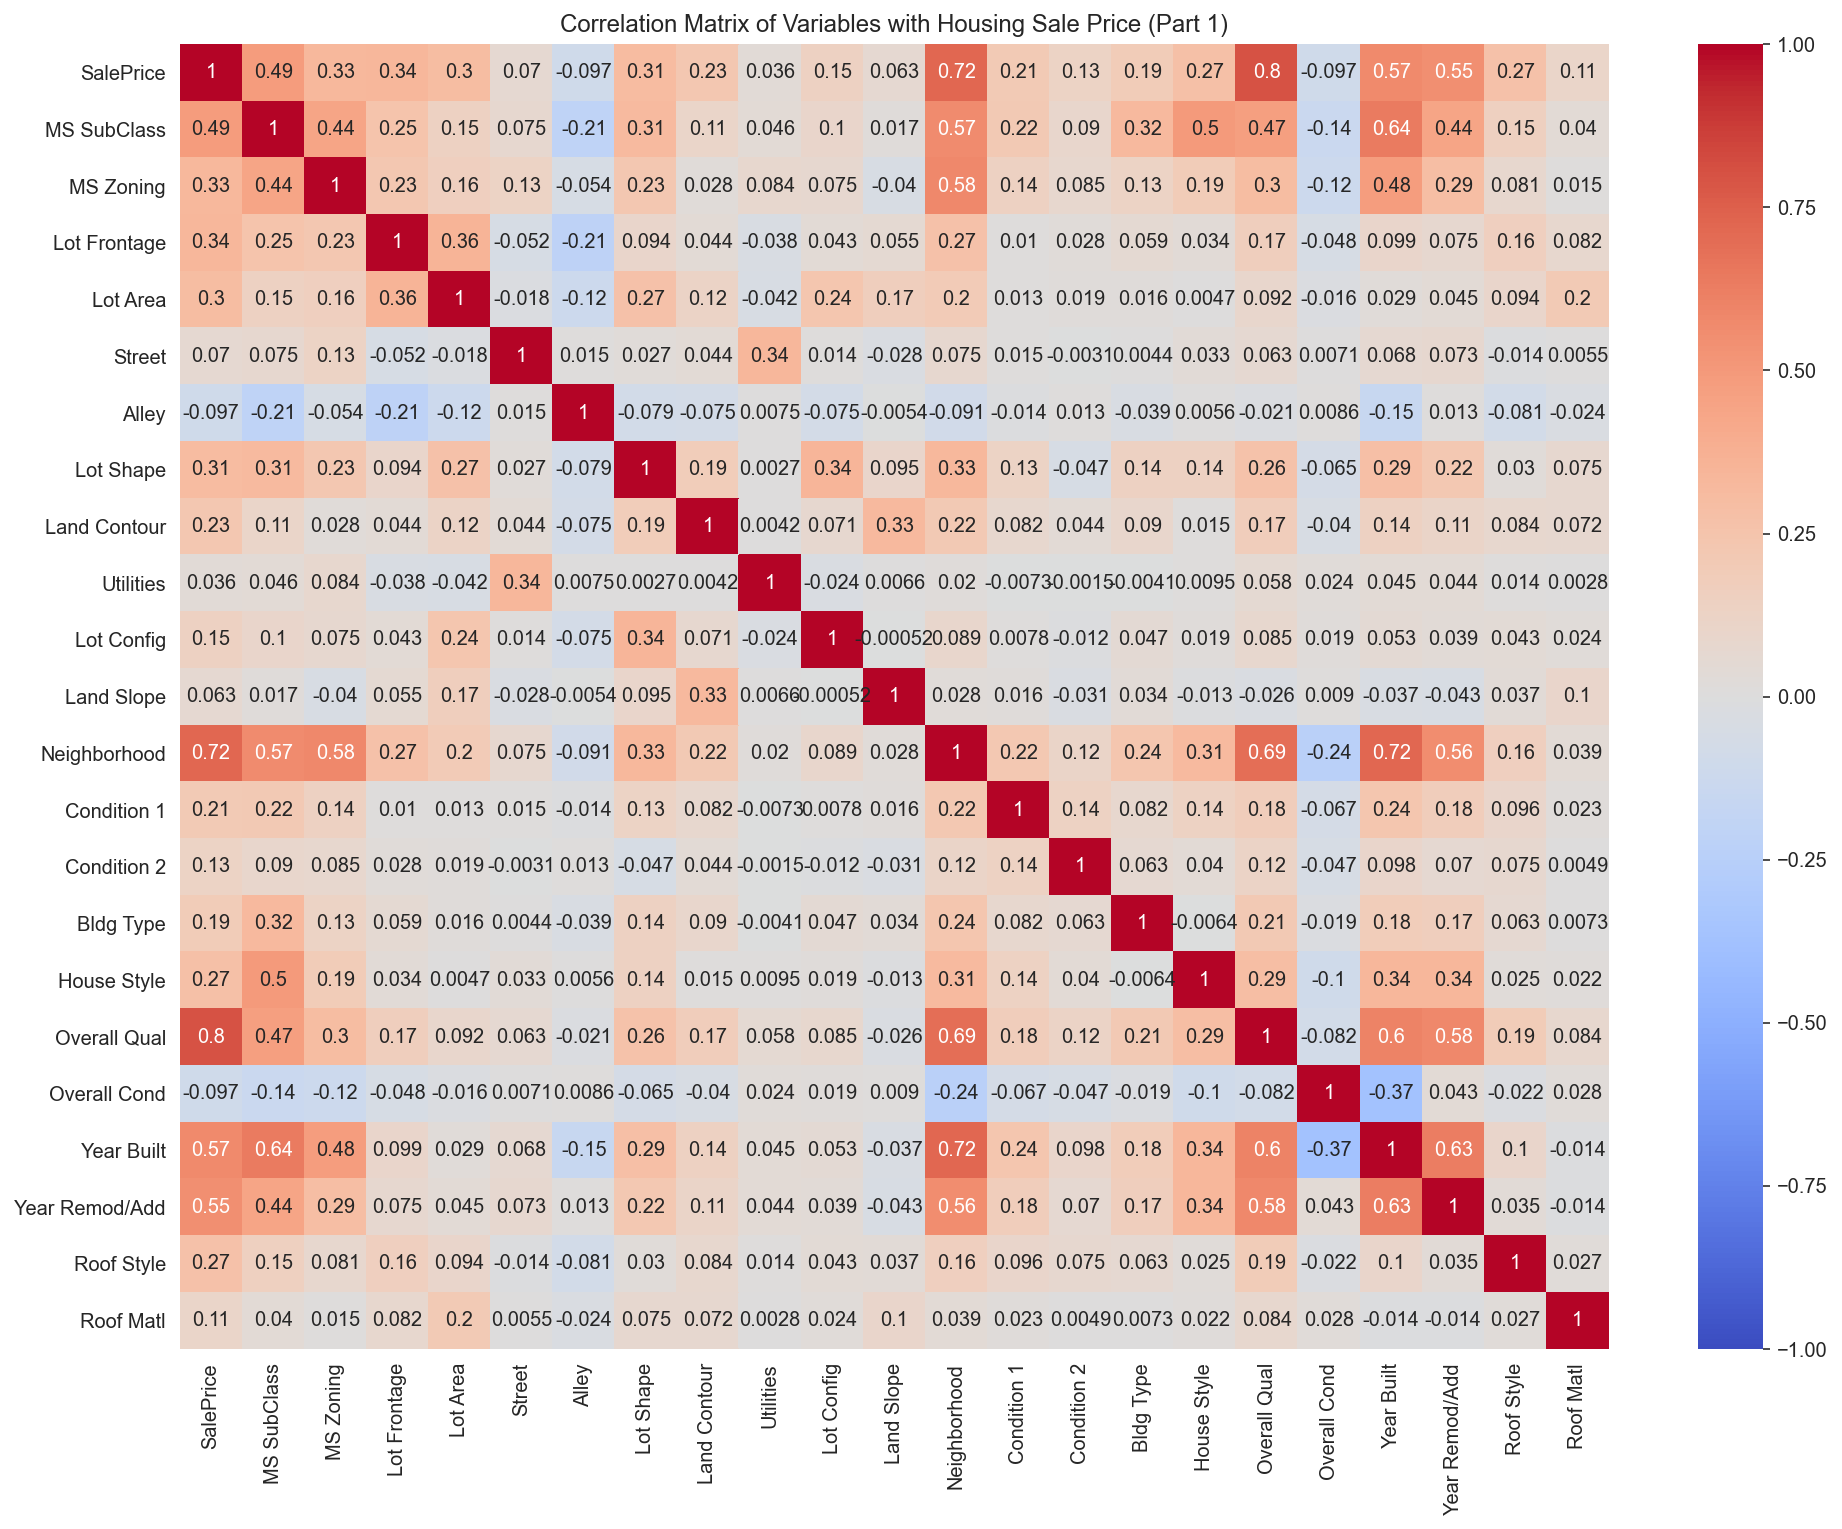

In [88]:
# plot the correlation heatmap for variables in combined_train_1 against 'SalePrice'

corr_1 = combined_train_1.corr()
plt.figure(figsize = (16,12))
plt.title('Correlation Matrix of Variables with Housing Sale Price (Part 1)')
sns.heatmap(corr_1, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<AxesSubplot:title={'center':'Correlation Matrix of Variables with Housing Sale Price (Part 2)'}>

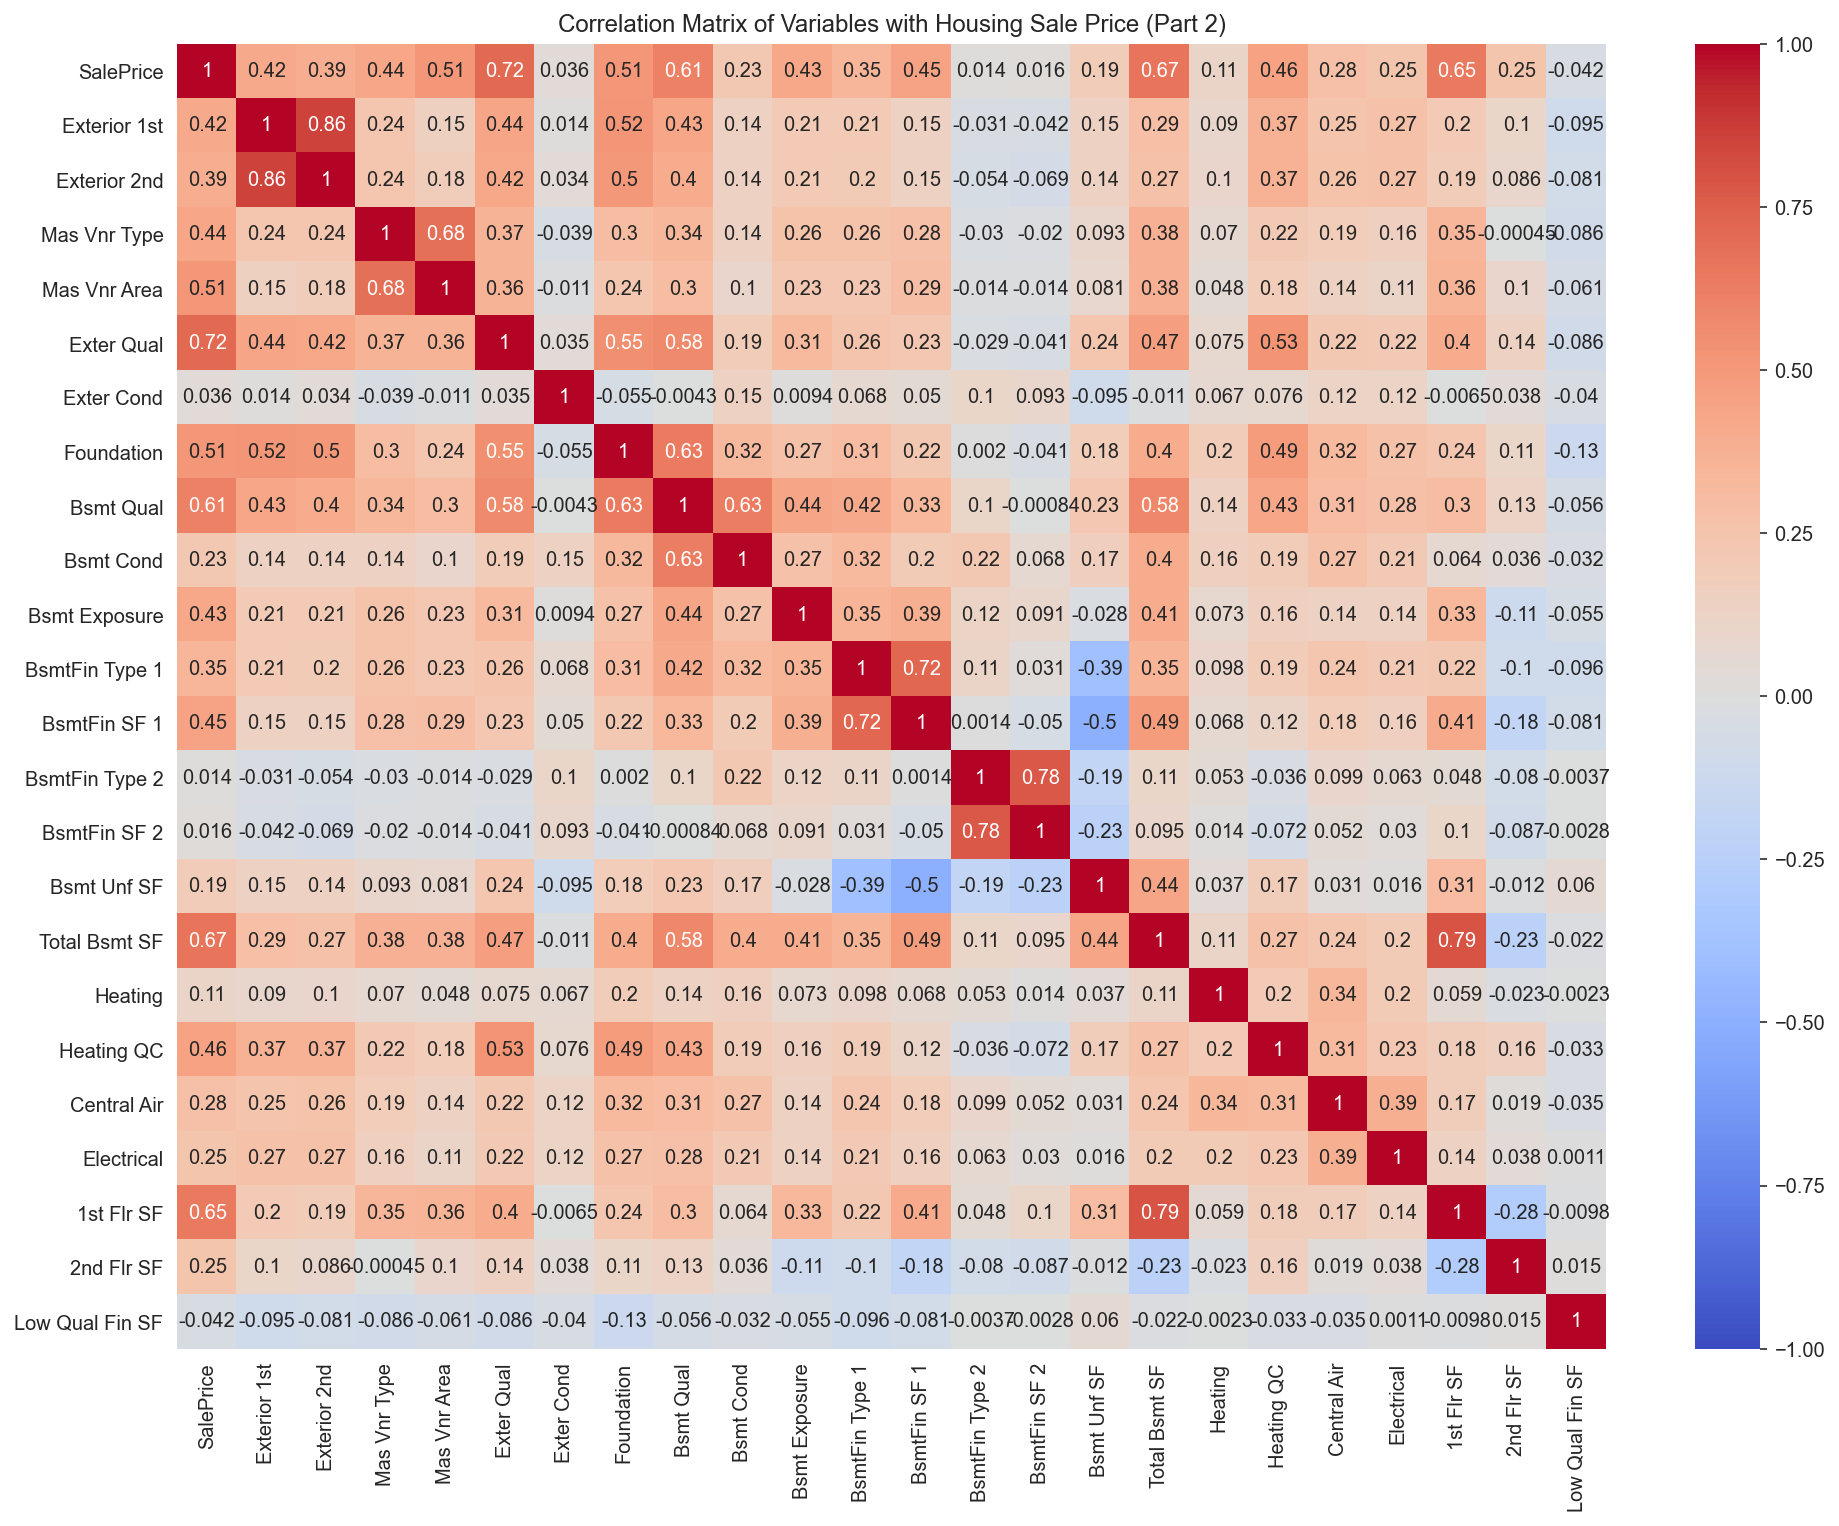

In [89]:
# plot the correlation heatmap for variables in combined_train_2 against 'SalePrice'

corr_2 = combined_train_2.corr()
plt.figure(figsize = (16,12))
plt.title('Correlation Matrix of Variables with Housing Sale Price (Part 2)')
sns.heatmap(corr_2, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<AxesSubplot:title={'center':'Correlation Matrix of Variables with Housing Sale Price (Part 3)'}>

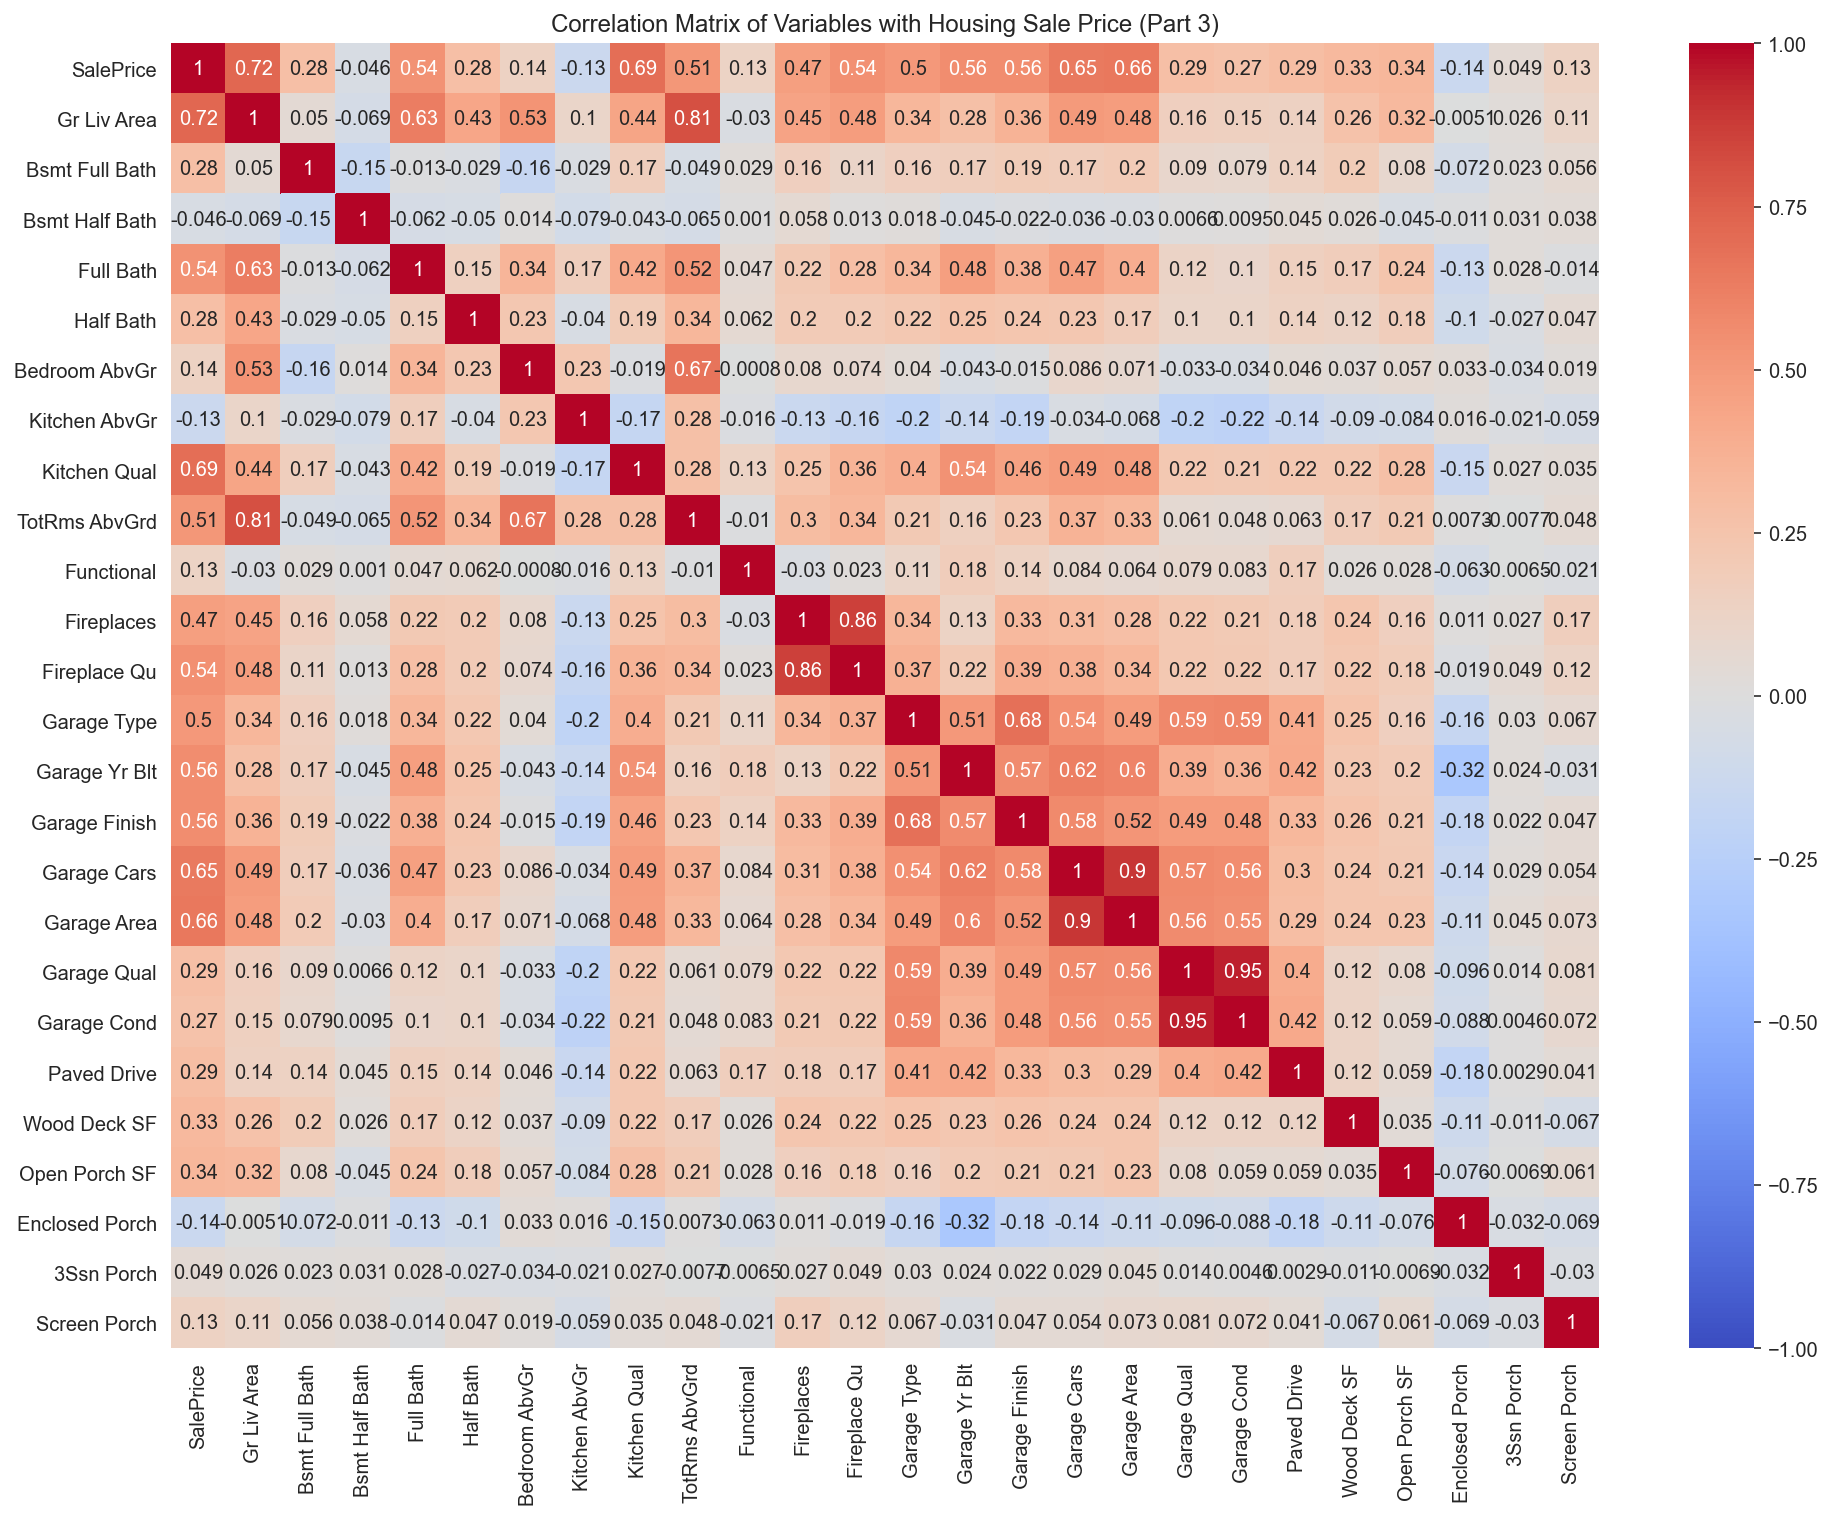

In [90]:
# plot the correlation heatmap for variables in combined_train_3 against 'SalePrice'

corr_3 = combined_train_3.corr()
plt.figure(figsize = (16,12))
plt.title('Correlation Matrix of Variables with Housing Sale Price (Part 3)')
sns.heatmap(corr_3, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<AxesSubplot:title={'center':'Correlation Matrix of Variables with Housing Sale Price (Part 4)'}>

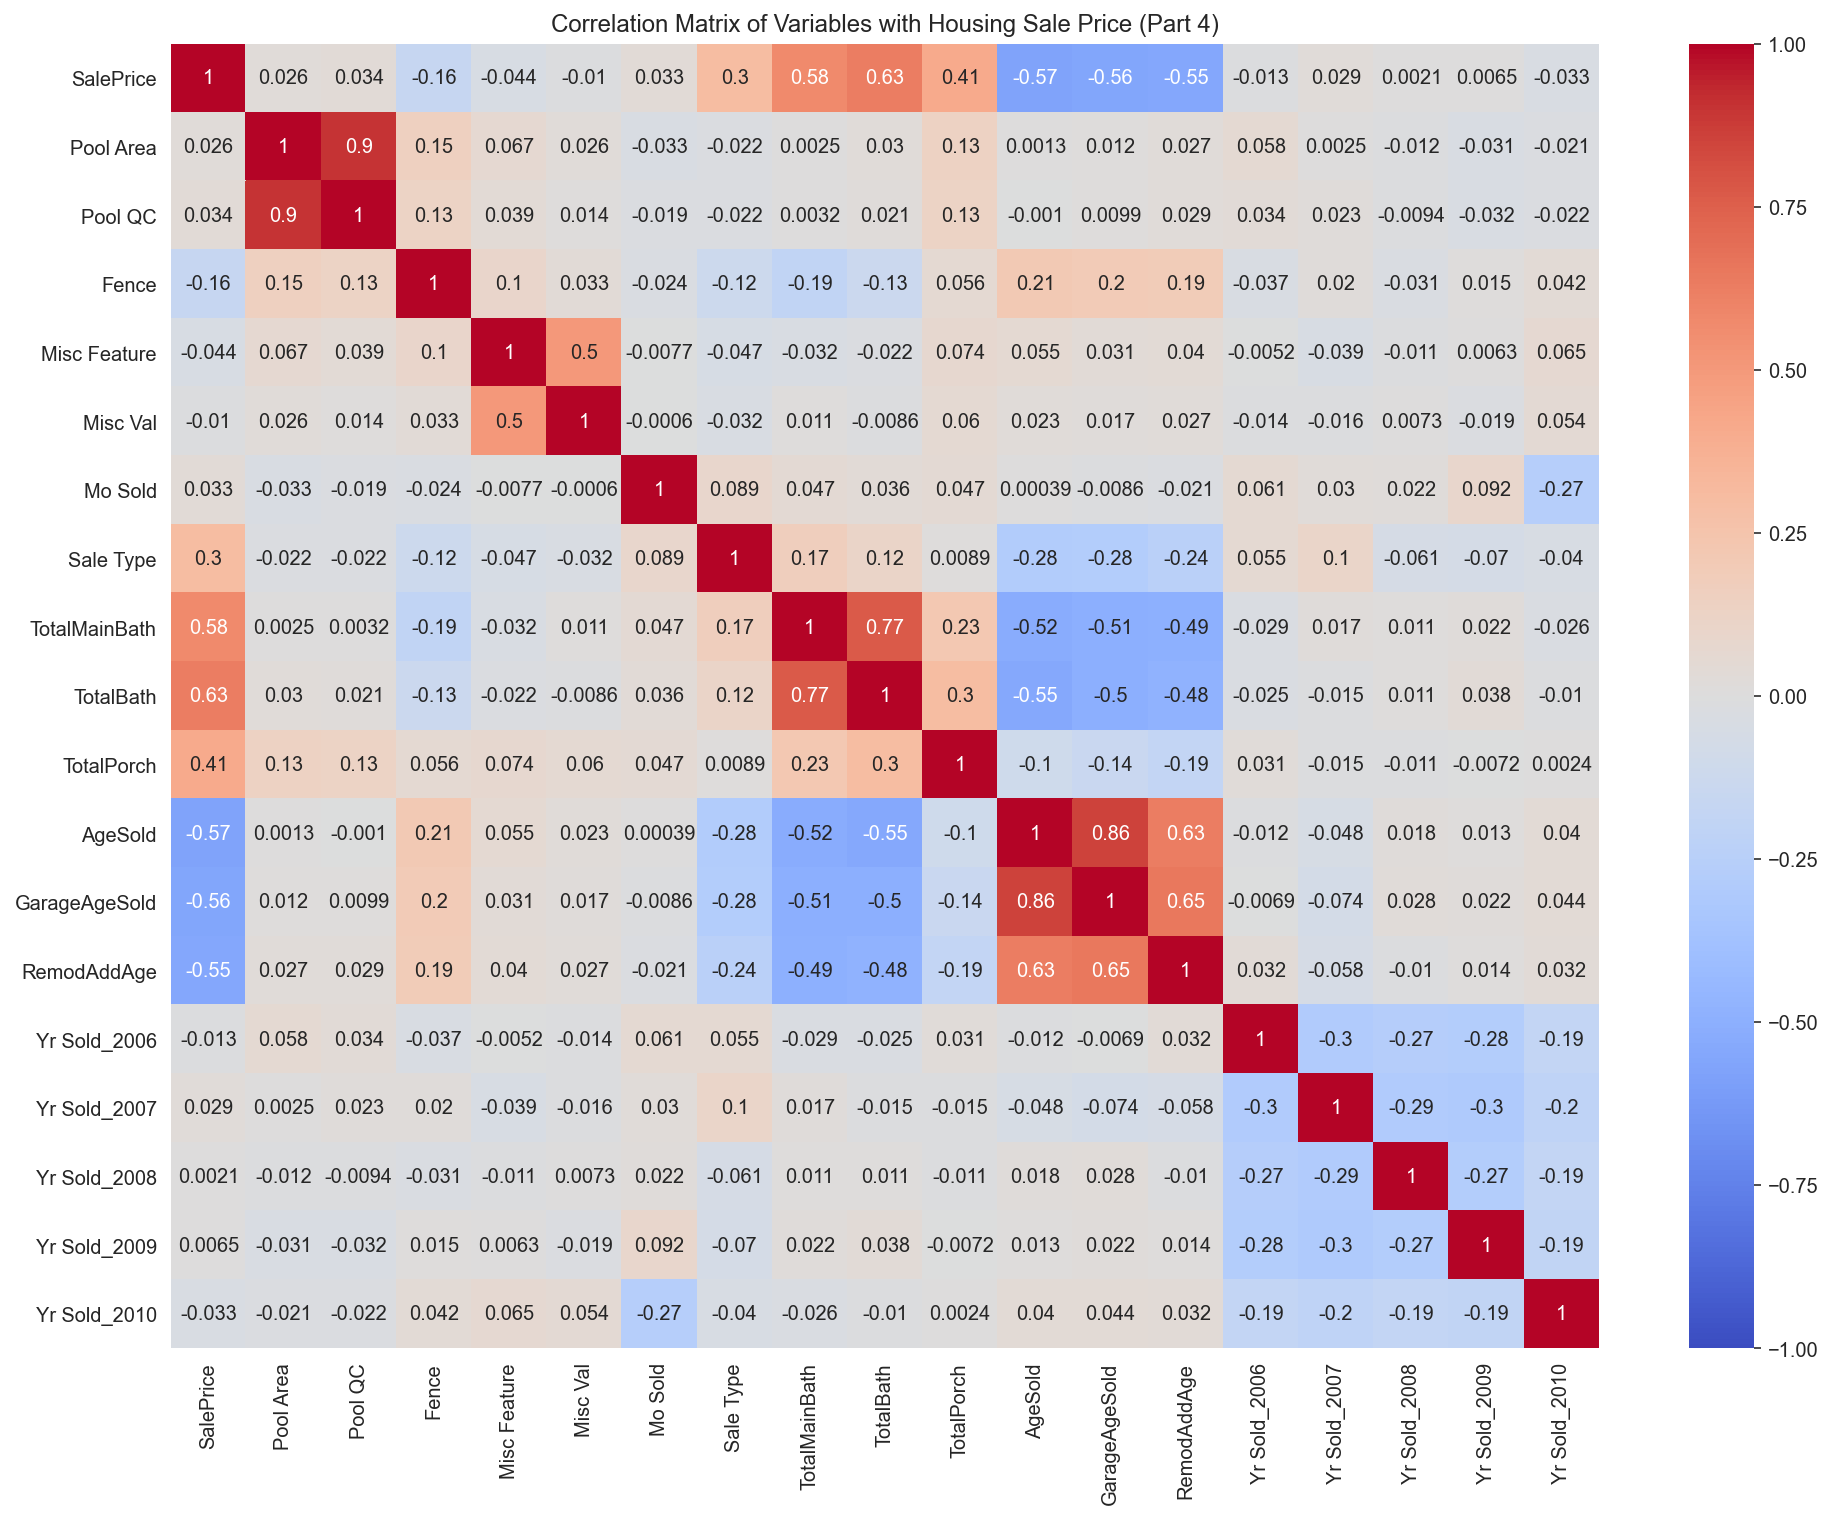

In [91]:
# plot the correlation heatmap for variables in combined_train_4 against 'SalePrice'

corr_4 = combined_train_4.corr()
plt.figure(figsize = (16,12))
plt.title('Correlation Matrix of Variables with Housing Sale Price (Part 4)')
sns.heatmap(corr_4, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

In [92]:
# view the correlation between the variables and 'SalePrice'

corr_all = combined_train.corr()

print(corr_all['SalePrice'].sort_values(ascending=False)[:30], '\n')
print (corr_all['SalePrice'].sort_values(ascending=False)[-20:])       # ignore ID and PID

SalePrice         1.000000
Overall Qual      0.803462
Neighborhood      0.720388
Gr Liv Area       0.719463
Exter Qual        0.715048
Kitchen Qual      0.694295
Total Bsmt SF     0.665116
Garage Area       0.655097
1st Flr SF        0.648252
Garage Cars       0.648227
TotalBath         0.632542
Bsmt Qual         0.613236
TotalMainBath     0.575008
Year Built        0.572405
Garage Finish     0.558566
Garage Yr Blt     0.556673
Year Remod/Add    0.550863
Fireplace Qu      0.539484
Full Bath         0.538225
Mas Vnr Area      0.511273
TotRms AbvGrd     0.509775
Foundation        0.508446
Garage Type       0.500405
MS SubClass       0.489785
Fireplaces        0.473783
Heating QC        0.458636
BsmtFin SF 1      0.446103
Mas Vnr Type      0.437212
Bsmt Exposure     0.426134
Exterior 1st      0.421054
Name: SalePrice, dtype: float64 

BsmtFin SF 2       0.016398
BsmtFin Type 2     0.014037
Yr Sold_2009       0.006495
Yr Sold_2008       0.002102
Misc Val          -0.010323
Yr Sold_2006    

It is interesting to note that these features have a strong positive correlation with SalePrice: 
- Overall material and finish quality ('Overall Qual')
- Neighborhood
- Above grade (ground) living area square feet ('Gr Liv Area')
- Exterior material quality ('Exter Qual')
- Kitchen quality ('Kitchen Qual')
- Total square feet of basement area ('Total Bsmt SF')
- Size of garage in square feet ('Garage Area')

On the other hand, these features have mid-to-strong negative correlation with SalePrice: 
- Age of house when house is sold ('AgeSold')
- Age of garage when house is sold ('GarageAgeSold')
- Age of remodelling/addition when house is sold ('RemodAddAge')
- Fence quality ('Fence')
- Enclosed porch area in square feet ('Enclosed Porch')
- No. of kitchens above grade ('Kitchen AbvGr')
- Type of alley access to property ('Alley')
- Overall condition rating ('Overall Cond')

#### A closer look into the top 3 and bottom 3 variables that are most strongly correlated with Sale Price

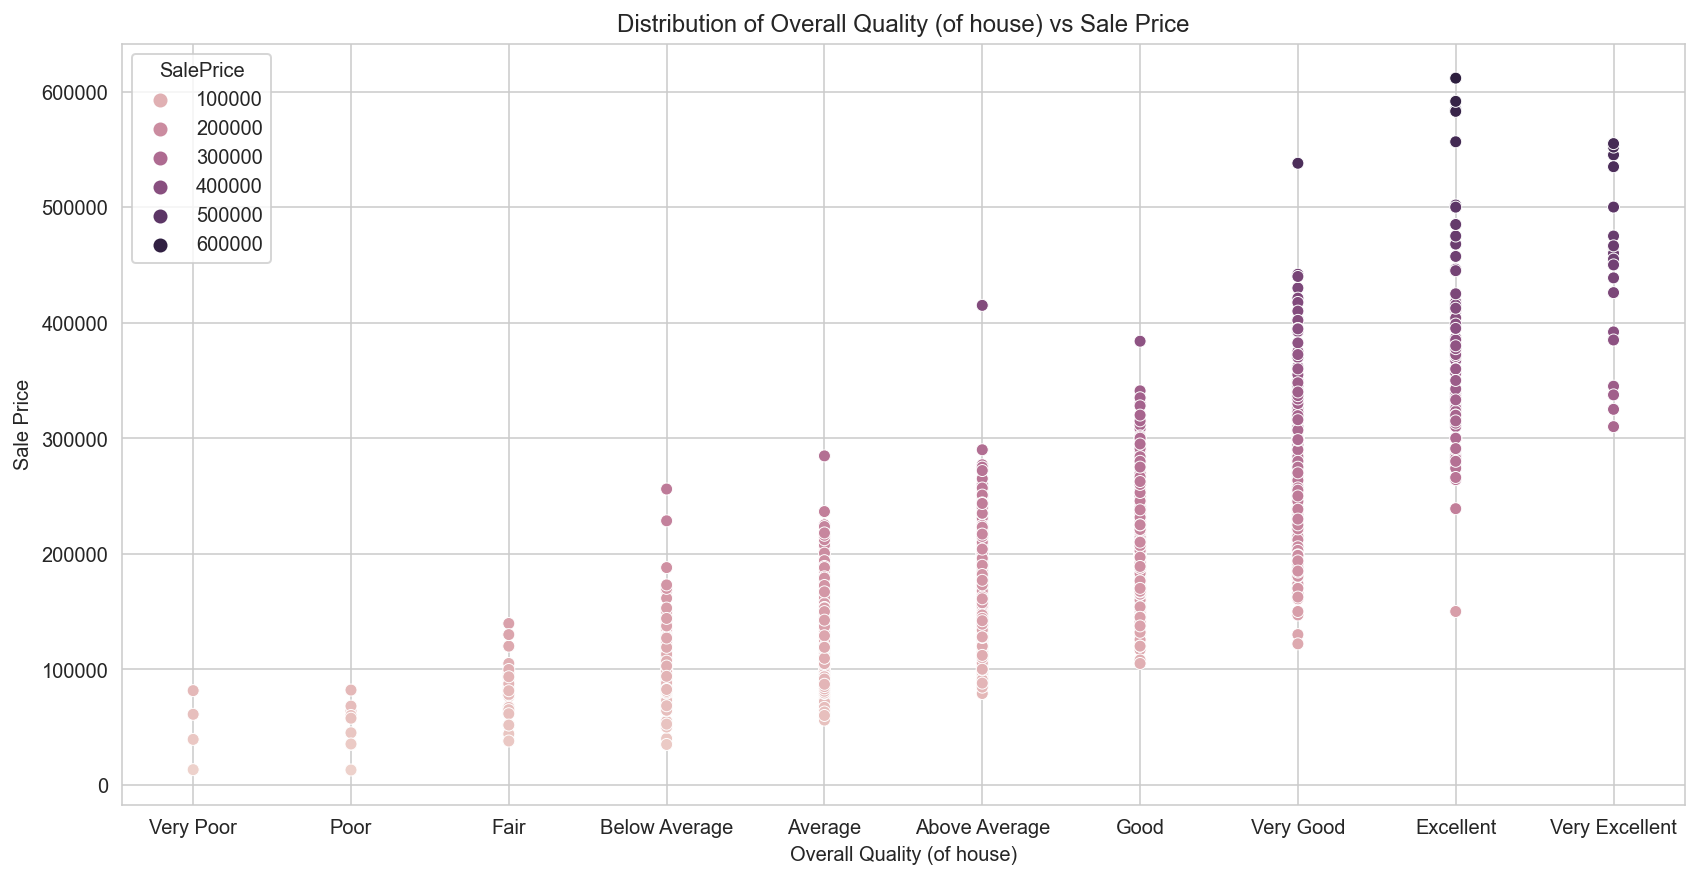

In [93]:
# view the distribution between Overall Qual and SalePrice

plt.figure(figsize=(14,7))
sns.scatterplot(x=combined_train['Overall Qual'], y=combined_train['SalePrice'], hue=combined_train['SalePrice'])

plt.title('Distribution of Overall Quality (of house) vs Sale Price')
plt.xlabel('Overall Quality (of house)')
plt.ylabel('Sale Price')
overall_qual_label = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
overall_qual_name = ('Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average', 'Good', 'Very Good', 'Excellent', 'Very Excellent')
plt.xticks(overall_qual_label, overall_qual_name);

- From the above scatter plot, it can be observed that higher overall quality of the houses (i.e. 'Very Good' to 'Very Excellent') tend to command higher sale prices. 
- Correlation between SalePrice and Overall Quality = **+0.803462**

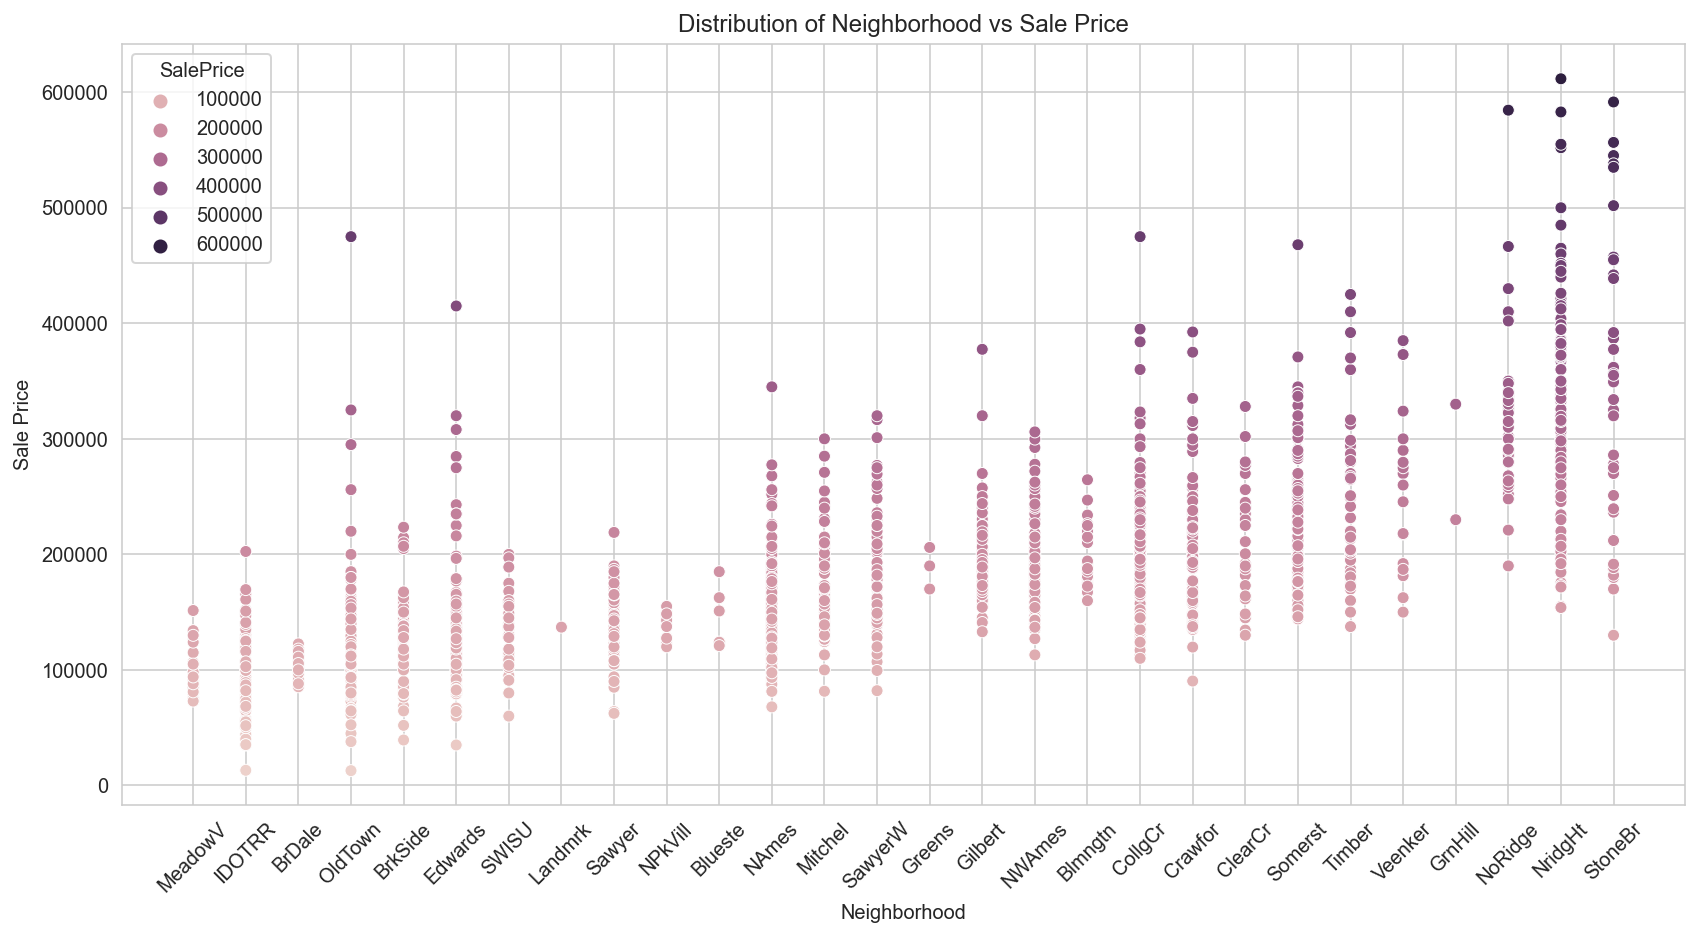

In [94]:
# view the distribution between Neighborhood and SalePrice

plt.figure(figsize=(14,7))
sns.scatterplot(x=combined_train['Neighborhood'], y=combined_train['SalePrice'], hue=combined_train['SalePrice'])

plt.title('Distribution of Neighborhood vs Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
neighborhood_label = (28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
neighborhood_name = ('StoneBr', 'NridgHt', 'NoRidge', 'GrnHill', 'Veenker', 'Timber', 'Somerst', 'ClearCr', 'Crawfor', 'CollgCr', 'Blmngtn', 'NWAmes', 'Gilbert', 'Greens', 'SawyerW', 'Mitchel', 'NAmes', 'Blueste', 'NPkVill', 'Sawyer', 'Landmrk', 'SWISU', 'Edwards', 'BrkSide', 'OldTown', 'BrDale', 'IDOTRR', 'MeadowV')
plt.xticks(neighborhood_label, neighborhood_name)
plt.xticks(rotation=45);

- From the above scatter plot, which is visualised in a different manner compared to the one earlier, indicates that: 
    - The higher sale prices (i.e. above USD 400,000) tend to congregate around neighborhoods such as Stone Brook ('StoneBr'), Northridge Heights ('NridgHt') and Northridge ('NoRidge').
    - Majority of the sale price ranges between USD 100,000 to USD 400,000.
    - There are some outliers present in neighborhoods such as Old Town ('Old Town'), Edwards ('Edwards'), College Creek ('CollgCr') and Somerset ('Somerst'), which command higher sale prices from their usual ranges.
- Correlation between SalePrice and Neighborhood = **+0.720388**

Text(0, 0.5, 'Sale Price')

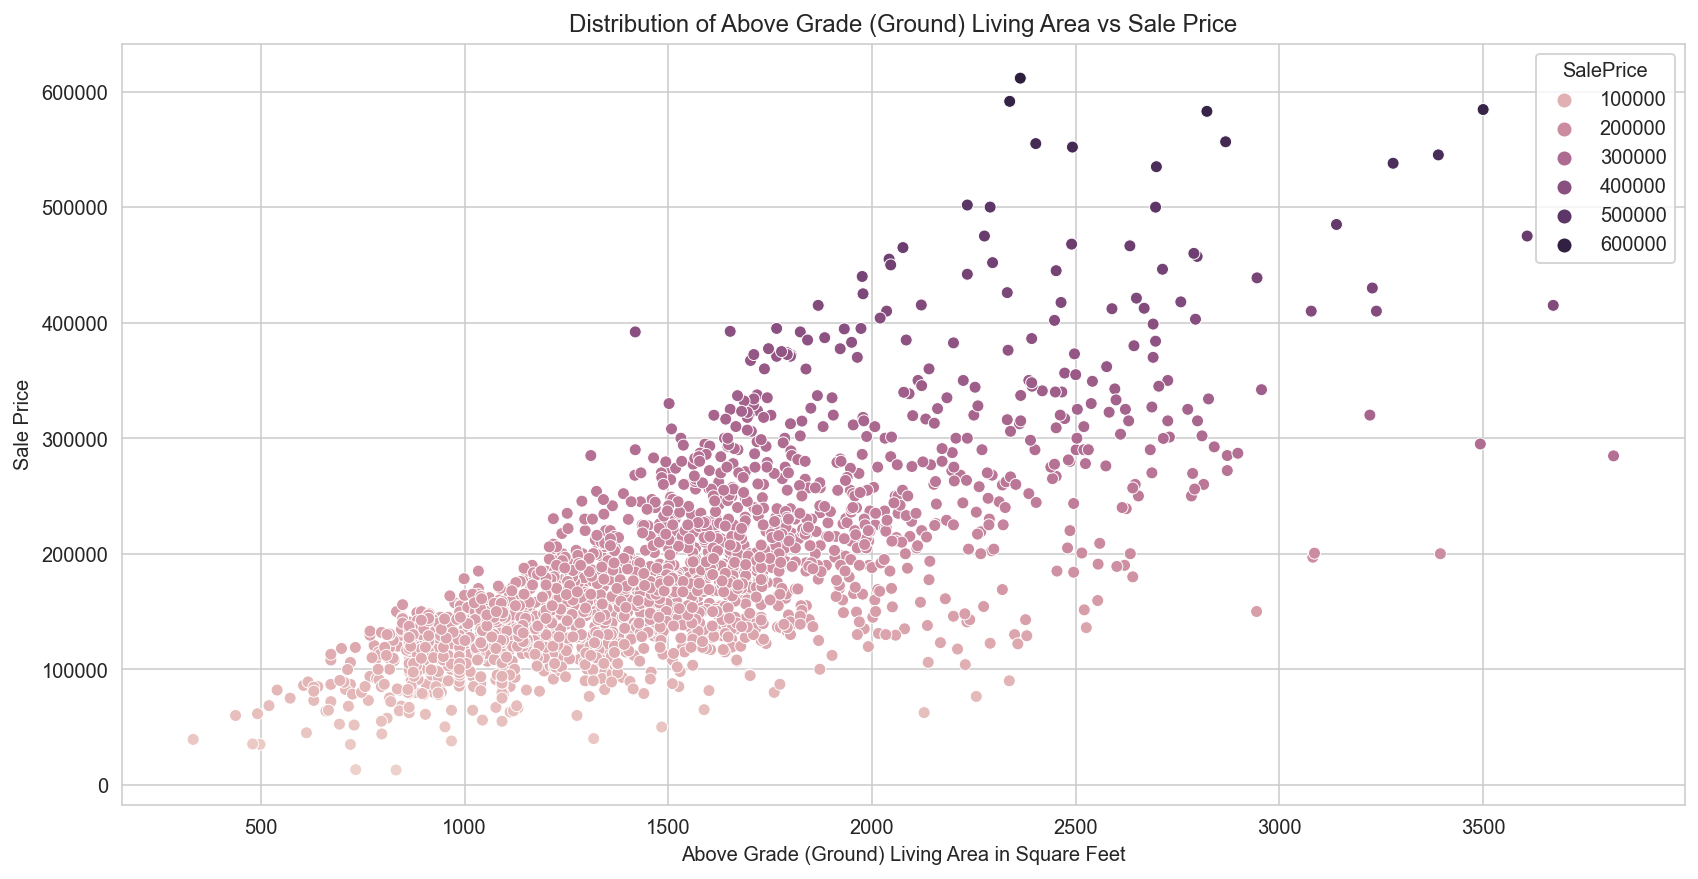

In [95]:
# view the distribution between Gr Liv Area and SalePrice

plt.figure(figsize=(14,7))
sns.scatterplot(x=combined_train['Gr Liv Area'], y=combined_train['SalePrice'], hue=combined_train['SalePrice'])

plt.title('Distribution of Above Grade (Ground) Living Area vs Sale Price')
plt.xlabel('Above Grade (Ground) Living Area in Square Feet')
plt.ylabel('Sale Price')

- From the above scatter plot, it can be observed that as above grade (ground) living area in square feet increases, the sale price of the houses also increases.
- Correlation between SalePrice and Gr Liv Area = **+0.719463**

Text(0, 0.5, 'Sale Price')

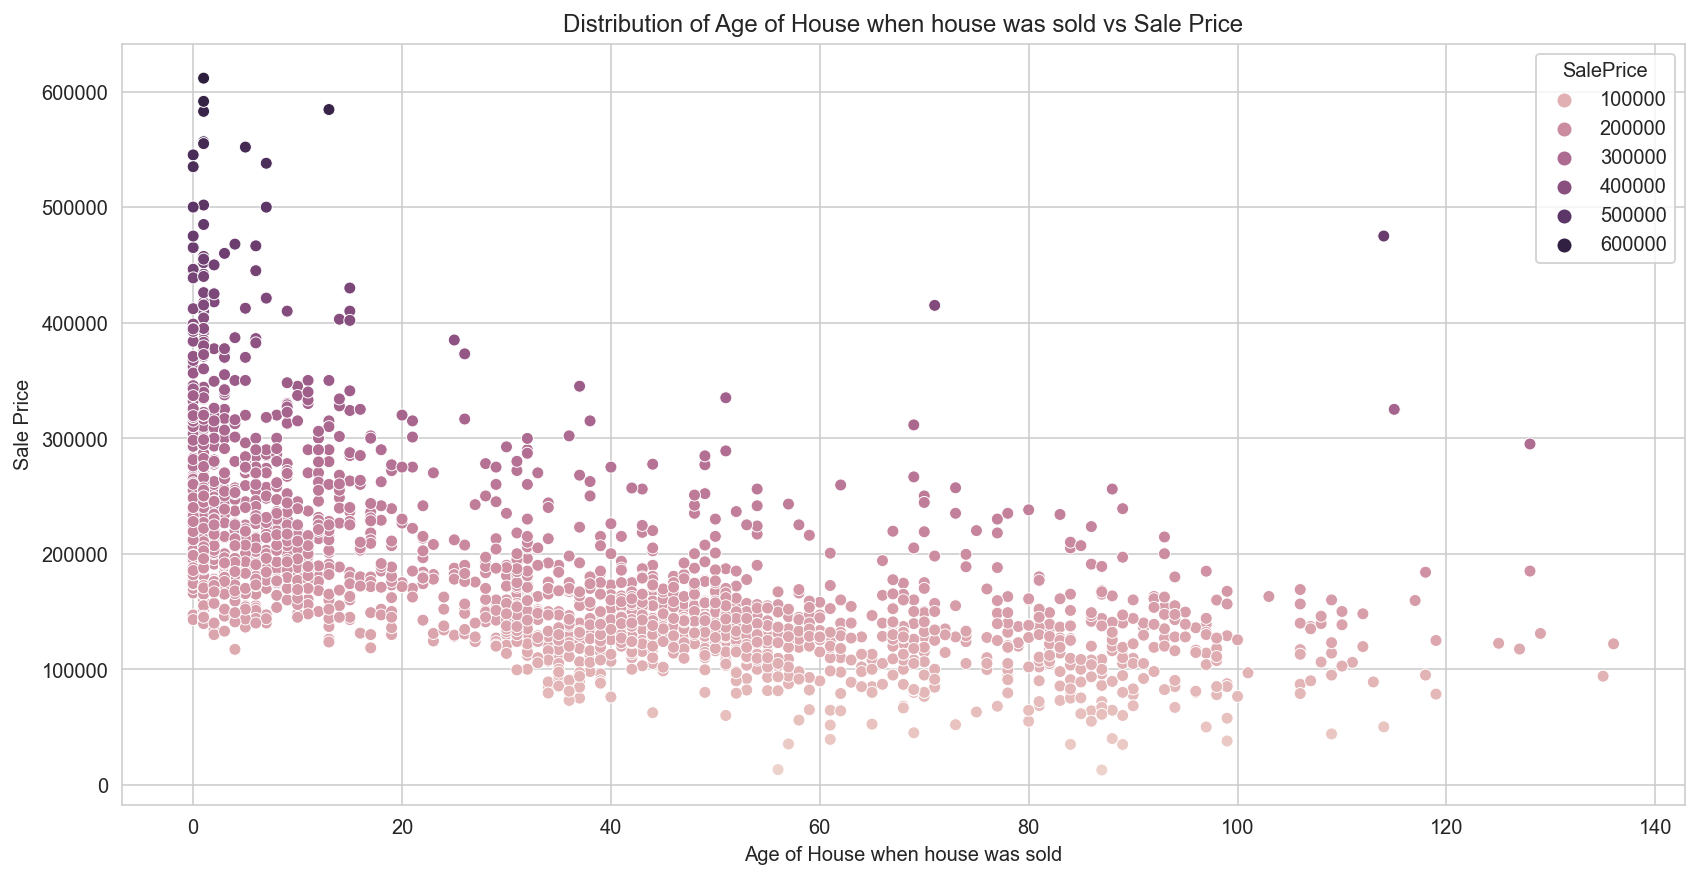

In [96]:
# view the distribution between AgeSold and SalePrice

plt.figure(figsize=(14,7))
sns.scatterplot(x=combined_train['AgeSold'], y=combined_train['SalePrice'], hue=combined_train['SalePrice'])

plt.title('Distribution of Age of House when house was sold vs Sale Price')
plt.xlabel('Age of House when house was sold')
plt.ylabel('Sale Price')

- From the above scatter plot, it can be observed that as the age of the house (when the house was sold) increases, the sale value of the house decreases. 
    - For instance, when the house is newly built and sold (i.e. age of house when house was sold = 0 years old), the house tends to command one of the highest sale price (i.e. above USD 500,000). 
    - However, it is also worthwhile to note that:
        - Several newly built houses do have lower sale prices (i.e. those below 20 years old); 
        - Some older houses (outliers with ages around 115 years old) may command high sale prices - taking into account that the houses have been maintained relatively well.  
- Correlation between SalePrice and Age of House (when house was sold) = **-0.572441**

Text(0, 0.5, 'Sale Price')

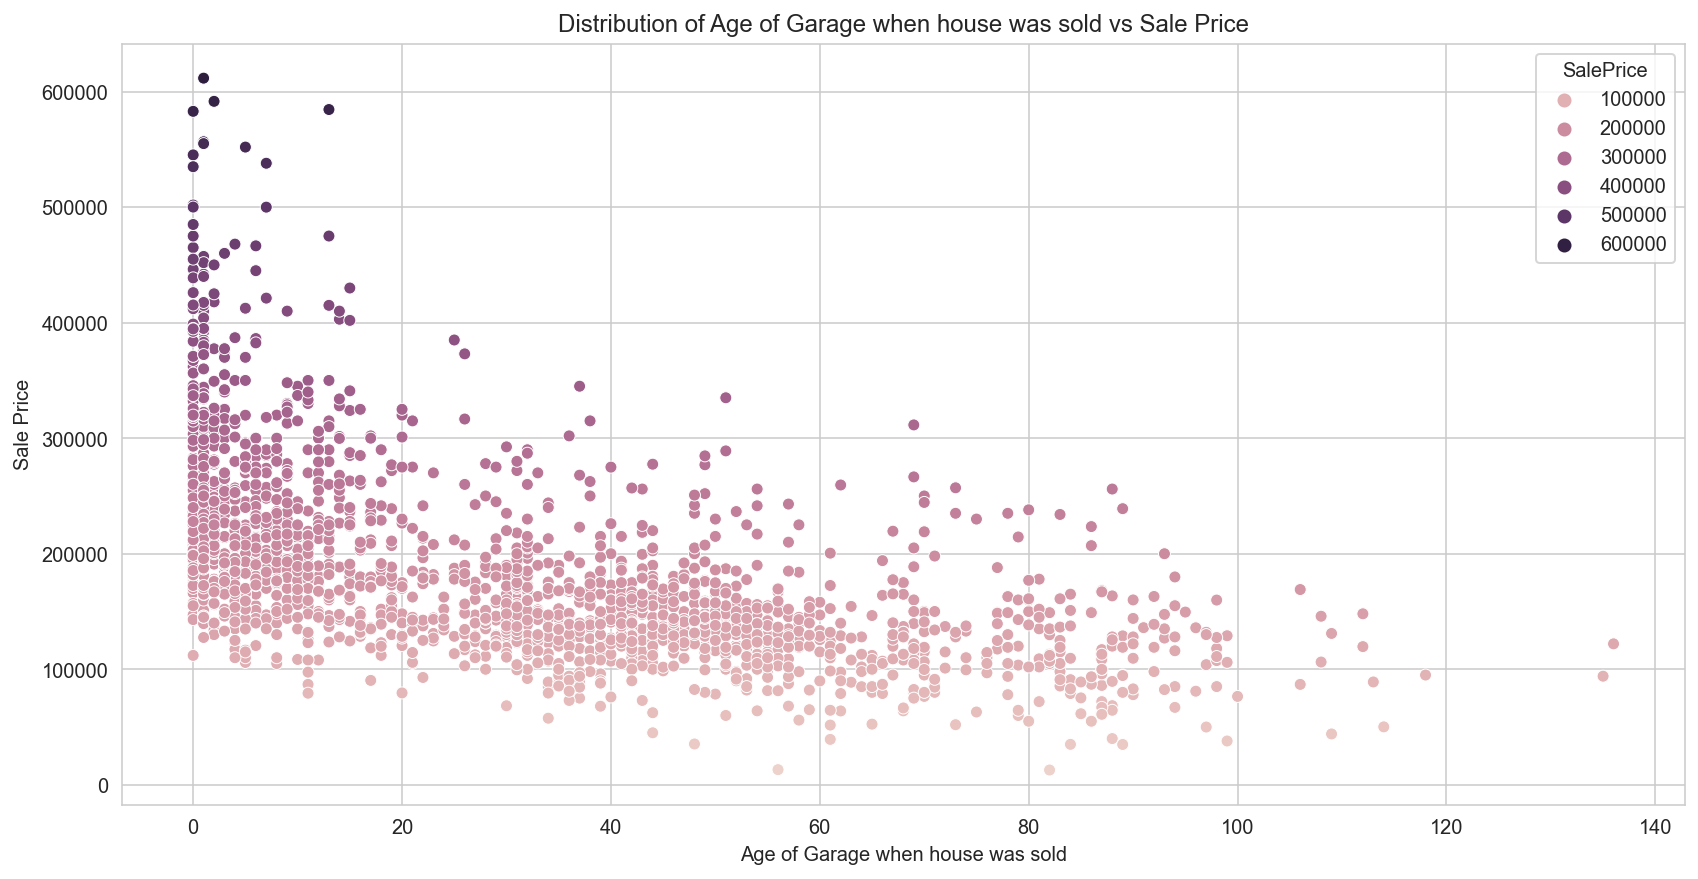

In [97]:
# view the distribution between GarageAgeSold and SalePrice

plt.figure(figsize=(14,7))
sns.scatterplot(x=combined_train['GarageAgeSold'], y=combined_train['SalePrice'], hue=combined_train['SalePrice'])

plt.title('Distribution of Age of Garage when house was sold vs Sale Price')
plt.xlabel('Age of Garage when house was sold')
plt.ylabel('Sale Price')

- From the above scatter plot, similarly it can also be observed that as the age of the garage (when the house was sold) increases, the sale value of the house decreases.  
- Correlation between SalePrice and Age of Garage (when house was sold) = **-0.556550**

Text(0, 0.5, 'Sale Price')

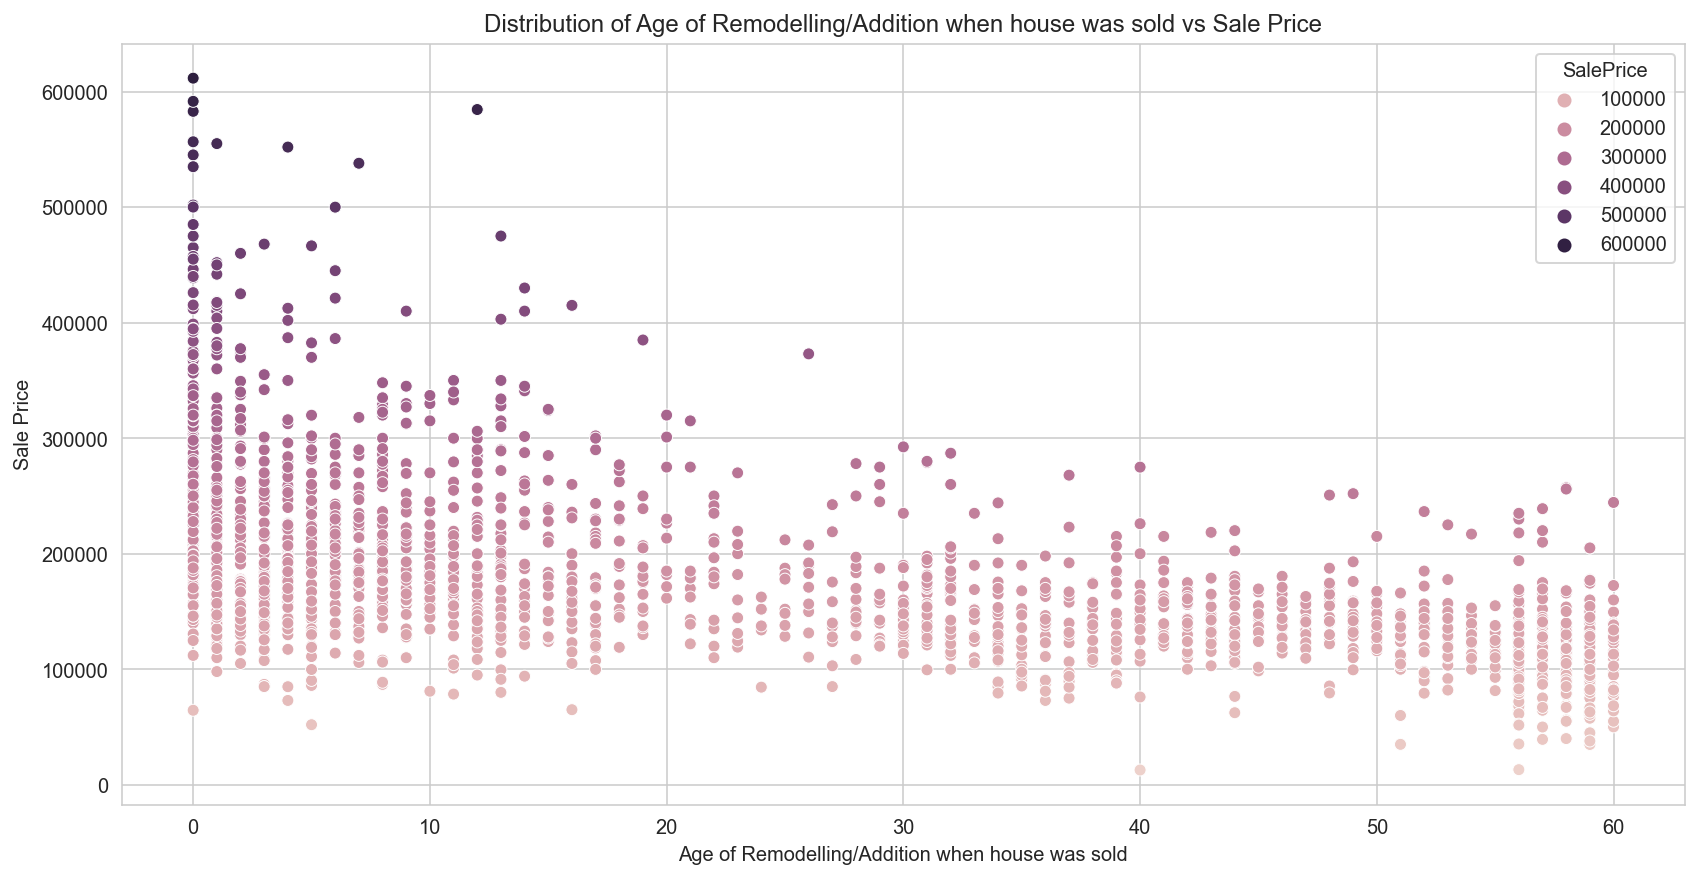

In [98]:
# view the distribution between RemodAddAge and SalePrice

plt.figure(figsize=(14,7))
sns.scatterplot(x=combined_train['RemodAddAge'], y=combined_train['SalePrice'], hue=combined_train['SalePrice'])

plt.title('Distribution of Age of Remodelling/Addition when house was sold vs Sale Price')
plt.xlabel('Age of Remodelling/Addition when house was sold')
plt.ylabel('Sale Price')

- From the above scatter plot, it can also be observed that more recently remodelled houses tend to garner higher sale prices.
    - For instance, houses that have been remodelled in the last 10 years, are able to command higher sale prices above USD 400,000, as compared to houses that have been remodelled 50 years ago that command sale prices below USD 250,000.
- Correlation between SalePrice and Age of Remodelling/Addition (when house was sold) = **-0.552218**

## Preprocessing & Modelling

### Viewing the distributions of numerical variables

- Earlier, we observe that the distribution of housing sale prices ('SalePrice') seems to be strongly right-skewed.

- Since 'Gr Liv Area' has one of the strongest correlation with 'SalePrice', we will examine its distribution. 

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


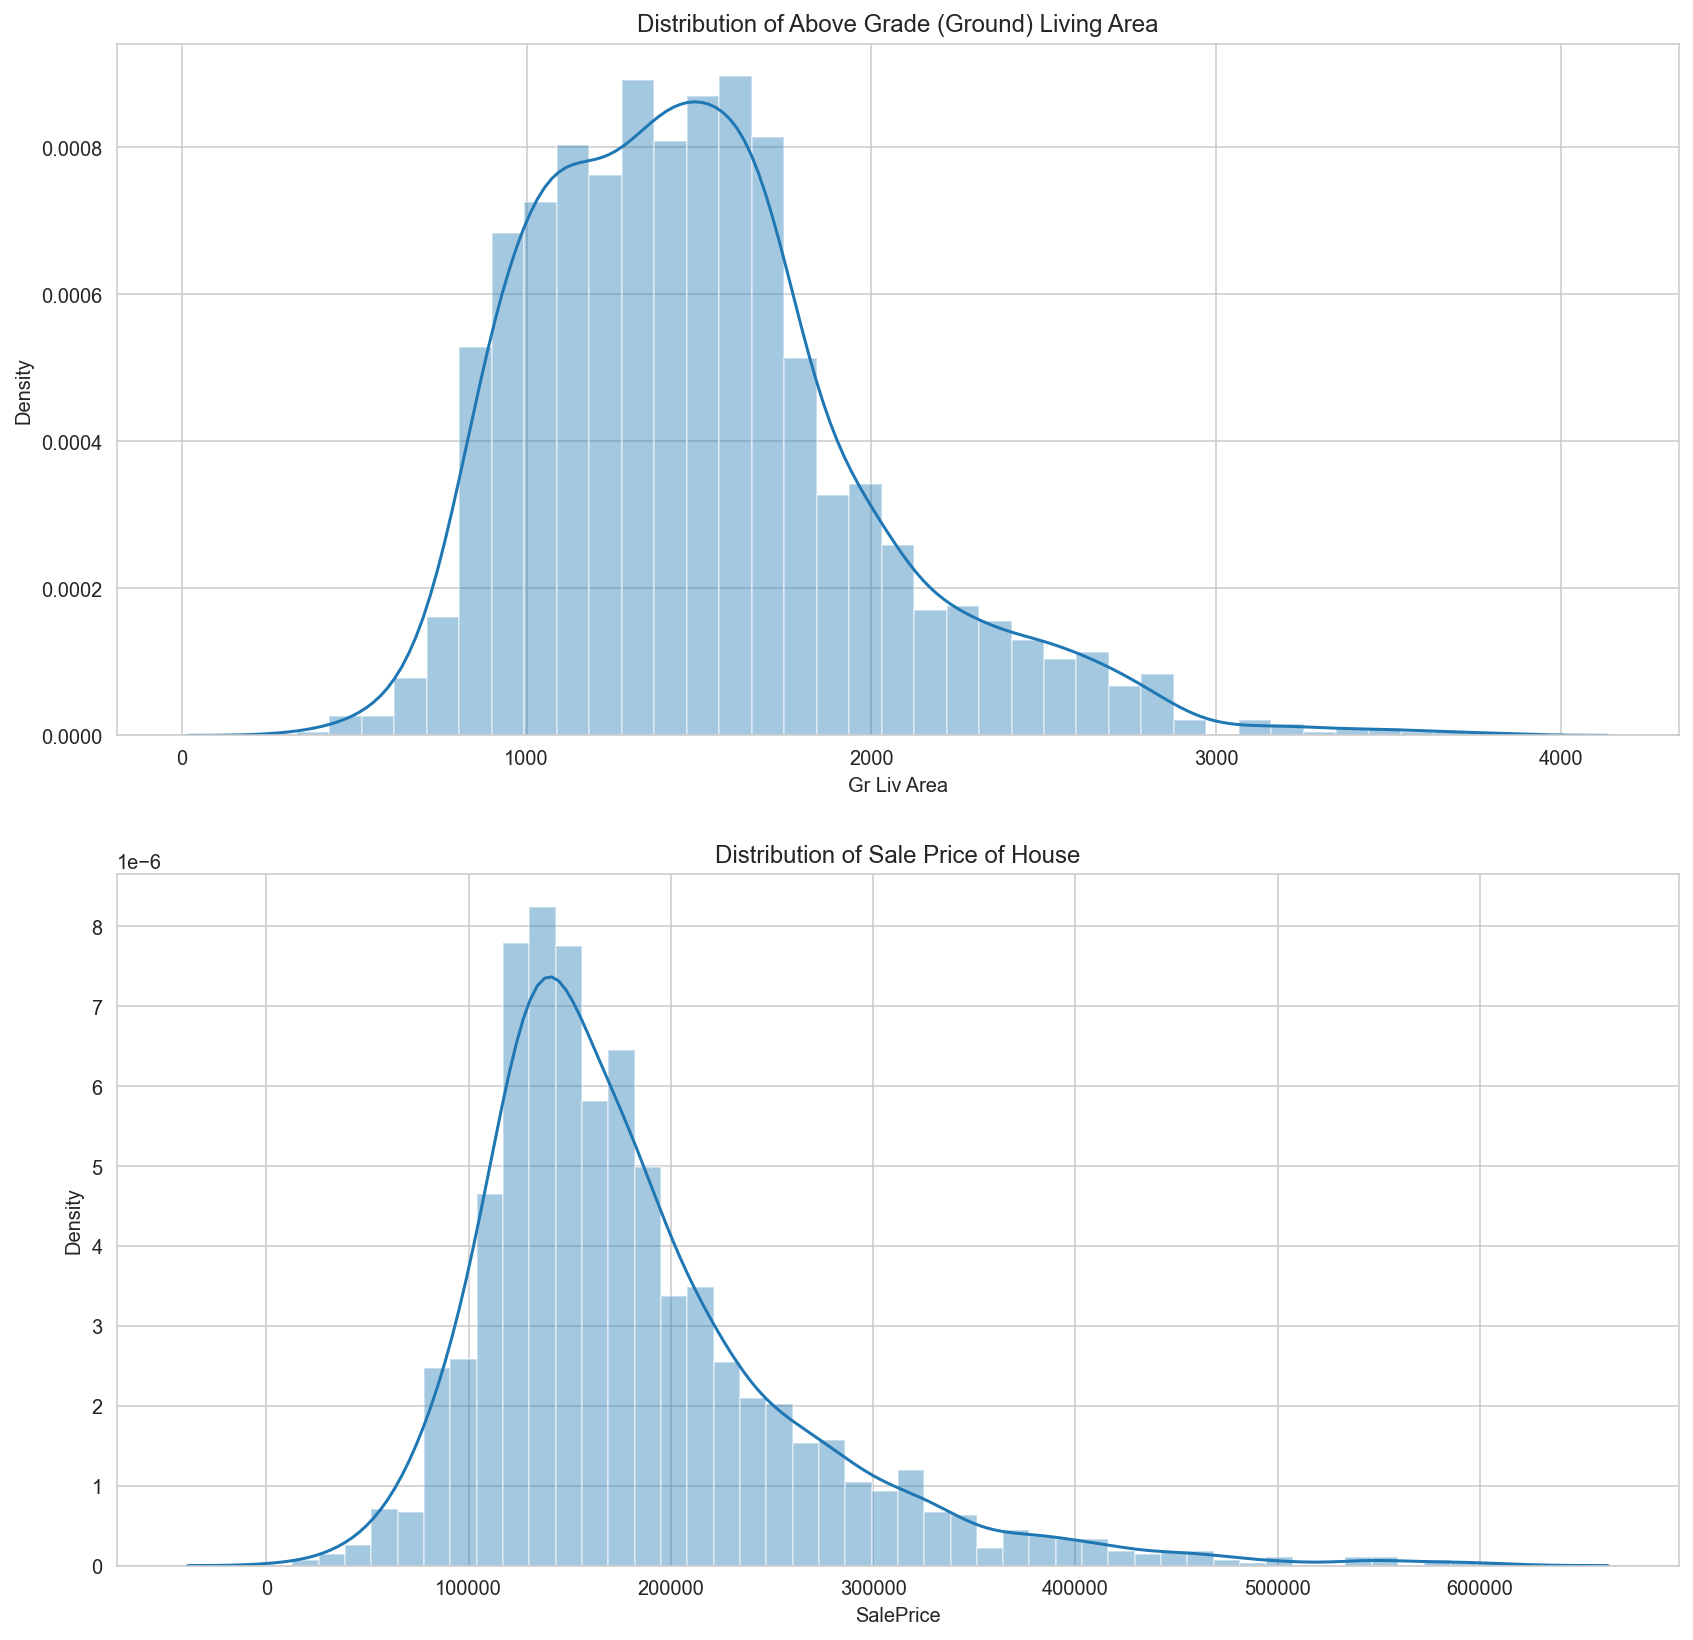

In [99]:
# view the distribution of the numerical variables listed above

f, (ax1, ax2) = plt.subplots(2,figsize=(14,14))

sns.distplot(combined_train['Gr Liv Area'], kde=True, ax=ax1)
ax1.title.set_text('Distribution of Above Grade (Ground) Living Area')

sns.distplot(combined_train['SalePrice'], kde=True, ax=ax2)
ax2.title.set_text('Distribution of Sale Price of House')

- From the above subplots, we observe that the distribution of housing sale prices is more right-skewed than that of above grade (ground) living area. 
- With this, logarithmic transformation will be applied to normalise the housing sale prices. 

#### Exporting Modified Data (pre-transformed)

In [100]:
# view train data shape
train.shape

(2049, 81)

In [101]:
# view combined data shape
combined.shape

(2927, 91)

In [102]:
# split into train and test
combined_train = combined[:train.shape[0]]
combined_test = combined.iloc[2049:2927]

# export files as modified versions
combined_train.to_csv('datasets/train_modified.csv', index=False)
combined_test.to_csv('datasets/test_modified.csv', index=False)
combined.to_csv('datasets/combined_modified.csv', index=False)

### Modelling

In [103]:
# import the modified files 
train_df = pd.read_csv('datasets/train_modified.csv')

In [104]:
# view column values in train_df
train_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [105]:
# create a variable 'features' to store features from train_df
features = ['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Sale Type', 'TotalMainBath', 'TotalBath', 'TotalPorch', 'AgeSold', 'GarageAgeSold', 'RemodAddAge', 'Yr Sold_2006', 'Yr Sold_2007', 'Yr Sold_2008', 'Yr Sold_2009', 'Yr Sold_2010']

In [106]:
# create X and y variables from train DataFrame
X = train_df[features]
y = train_df['SalePrice']

### Feature Engineering

In [107]:
# generate a polynomial feature table 
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape

(2049, 4004)

In [108]:
# add an appropriate name to the polynomial features 
X_poly = pd.DataFrame(X_poly,columns=poly.get_feature_names(X.columns))

# generate a list of correlations for the polynomial features with SalePrice
X_poly_corrs = X_poly.corrwith(y)

# list down features that are most highly correlated (positively) with SalePrice
X_poly_corrs.sort_values(ascending=False).head(20)

Overall Qual Gr Liv Area      0.872971
Neighborhood Gr Liv Area      0.854738
Exter Qual Gr Liv Area        0.854311
Gr Liv Area Kitchen Qual      0.843172
Bsmt Qual Gr Liv Area         0.842403
Overall Qual 1st Flr SF       0.840861
Overall Qual Kitchen Qual     0.838024
Overall Qual Exter Qual       0.833453
Overall Qual^2                0.830575
Overall Qual Total Bsmt SF    0.828402
Overall Qual Garage Area      0.825063
Overall Qual Garage Cars      0.821957
Neighborhood Overall Qual     0.821678
Neighborhood 1st Flr SF       0.820673
Neighborhood Total Bsmt SF    0.820131
Total Bsmt SF Gr Liv Area     0.820087
Neighborhood Garage Area      0.818470
Overall Qual TotalBath        0.818385
Overall Qual Bsmt Qual        0.815974
Neighborhood Garage Cars      0.811359
dtype: float64

In [109]:
# list down features that are most highly correlated (negatively) with SalePrice
X_poly_corrs.sort_values().head(10)

Year Built AgeSold            -0.576870
Garage Yr Blt AgeSold         -0.573308
AgeSold                       -0.572441
Utilities AgeSold             -0.571260
Year Remod/Add AgeSold        -0.570013
Street AgeSold                -0.569166
Heating AgeSold               -0.566847
Condition 2 AgeSold           -0.565132
Garage Yr Blt GarageAgeSold   -0.559877
Year Built GarageAgeSold      -0.558853
dtype: float64

- As the dataset is huge (i.e. 91 variables), including all polynomial features in the dataset will not be feasible. 
- After experimenting with different combinations of polynomial features, 5 new features with the highest correlation with SalePrice will be created, as they seem to return better scores.
- Features from the original dataset are not removed, as they can be 'eliminated' by the regression techniques that will be applied subsequently, where their coefficients may be penalized. 

In [110]:
# manually create new features to be added
# identified top 5 features with highest correlation with SalePrice

train_df['Overall Qual Gr Liv Area'] = train_df['Overall Qual'] * train_df['Gr Liv Area']
train_df['Neighborhood Gr Liv Area'] = train_df['Neighborhood'] * train_df['Gr Liv Area']
train_df['Exter Qual Gr Liv Area'] = train_df['Exter Qual'] * train_df['Gr Liv Area']
train_df['Gr Liv Area Kitchen Qual'] = train_df['Gr Liv Area'] * train_df['Kitchen Qual']
train_df['Bsmt Qual Gr Liv Area'] = train_df['Bsmt Qual'] * train_df['Gr Liv Area']

In [111]:
# view the new features created in train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 96 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2049 non-null   int64  
 1   PID                       2049 non-null   int64  
 2   MS SubClass               2049 non-null   int64  
 3   MS Zoning                 2049 non-null   int64  
 4   Lot Frontage              2049 non-null   float64
 5   Lot Area                  2049 non-null   int64  
 6   Street                    2049 non-null   int64  
 7   Alley                     2049 non-null   int64  
 8   Lot Shape                 2049 non-null   int64  
 9   Land Contour              2049 non-null   int64  
 10  Utilities                 2049 non-null   int64  
 11  Lot Config                2049 non-null   int64  
 12  Land Slope                2049 non-null   int64  
 13  Neighborhood              2049 non-null   int64  
 14  Conditio

In [112]:
# create a variable 'features' to store features from train_df
features2 = ['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Sale Type', 'TotalMainBath', 'TotalBath', 'TotalPorch', 'AgeSold', 'GarageAgeSold', 'RemodAddAge', 'Yr Sold_2006', 'Yr Sold_2007', 'Yr Sold_2008', 'Yr Sold_2009', 'Yr Sold_2010', 'Overall Qual Gr Liv Area', 'Neighborhood Gr Liv Area', 'Exter Qual Gr Liv Area', 'Gr Liv Area Kitchen Qual', 'Bsmt Qual Gr Liv Area']

In [113]:
# create X and y variables from train DataFrame
X = train_df[features2]
y = train_df['SalePrice']

In [114]:
# log the y here
y_log = np.log(train_df['SalePrice'])

In [115]:
# create a train test split for X and y variables from train DataFrame

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)

In [116]:
# instantiate scaler
# since outliers may still be prevalent, RobustScaler() will be used

sc = RobustScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [117]:
X_train_sc.shape, y_train.shape, X_test_sc.shape, y_test.shape

((1434, 93), (1434,), (615, 93), (615,))

### Model Fitting

In [118]:
# create a function to fit the respective models and obtain the scoring

def fit_model(model, train_predictors, train_target, test_predictors, test_target):

    # fit the model
    model.fit(train_predictors, train_target)
    
    # score the model using training data
    train_score = model.score(train_predictors, train_target)

    # score the model using test data
    test_score = model.score(test_predictors, test_target)

    # perform cross-validation
    cv_r2_score = cross_val_score(model, train_predictors, train_target, scoring='r2', cv=5).mean()

    # generate predictions
    predictions_test = model.predict(test_predictors)
    mean_sq_error = mean_squared_error(test_target, predictions_test)
    
    # print out the results from the model
    print('Model Report')
    print('Score from train data: %.10g' % train_score)
    print('Score from test data: %.10g' % test_score)
    print('Cross valdiation R2 score: %.10g' % cv_r2_score)
    print('Root Mean Squared Error: %.10g' % ((mean_sq_error)**0.5))

#### Linear Regression

In [119]:
# instantiate linear regression
lr = LinearRegression()

# fit linear regression
fit_model(lr, X_train_sc, y_train, X_test_sc, y_test)

Model Report
Score from train data: 0.927172613
Score from test data: 0.9001552735
Cross valdiation R2 score: 0.9106283943
Root Mean Squared Error: 0.1312048673


#### Ridge (Regularization) Regression

In [120]:
# instantiate ridge regularization
ridge = RidgeCV(alphas = np.linspace(0.1,10,100))

# fit ridge regularization
fit_model(ridge, X_train_sc, y_train, X_test_sc, y_test)

Model Report
Score from train data: 0.9263321614
Score from test data: 0.9029440695
Cross valdiation R2 score: 0.9116027794
Root Mean Squared Error: 0.1293595271


In [121]:
# obtain the optimal ridge alpha value
ridge.alpha_

5.6

#### Lasso (Regularization) Regression

In [122]:
# instantiate lasso regularization
lasso = LassoCV(alphas=np.logspace(-3,1,100), cv=5, max_iter=50000)

# fit lasso regularization
fit_model(lasso, X_train_sc, y_train, X_test_sc, y_test)

Model Report
Score from train data: 0.92291523
Score from test data: 0.9045353272
Cross valdiation R2 score: 0.9125954032
Root Mean Squared Error: 0.1282947027


In [123]:
# obtain the optimal lasso alpha value
lasso.alpha_

0.0014508287784959402

#### Elastic Net (Regularization) Regression & GridSearch

In [124]:
# indicate the values to try for each hyperparameter
param_grid = {
    'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 3, 5],
    'l1_ratio':[0, 0.1, 0.2, 0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# instantiate GridSearchCV with ElasticNet
gsen = GridSearchCV(ElasticNet(), param_grid, cv=5, verbose=1)

In [125]:
# fit ElasticNet regularization
gsen.fit(X_train_sc, y_train)

Fitting 5 folds for each of 132 candidates, totalling 660 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.449618290170985, tolerance: 0.019900968566810527
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.360908030732803, tolerance: 0.01910741729779961
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.122163270841055, tolerance: 0.01884258669205421
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordina

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.897791201608236, tolerance: 0.019900968566810527
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.467986557080415, tolerance: 0.01910741729779961
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.647949318537432, tolerance: 0.01884258669205421
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might w

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.128135305081756, tolerance: 0.01985302281567931
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Done 660 out of 660 | elapsed:    9.8s finished
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.478868092252515, tolerance: 0.024035760872240505
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 3, 5],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             verbose=1)

In [126]:
# return the best parameters for ElasticNet
gsen.best_params_

{'alpha': 0.1, 'l1_ratio': 0}

- After trying 132 different hyperparameter combinations (which totals up to 660 fits), the GridSearchCV returns the model with alpha=0.1 and L1 ratio=0. 
    - This shows a pure Ridge (Regularization) Regression model, with a relatively small penalty strength.

In [127]:
# return the r2 score of the best parameters for ElasticNet
gsen.best_score_

0.9096737324722483

In [128]:
# score ElasticNet model based on test data
gsen.score(X_test_sc, y_test)

0.902944056352917

In [129]:
# generate predictions
gsen_predictions_test = gsen.predict(X_test_sc)

In [130]:
# compute the Root Mean Squared Error
gsen_mean_sq_error = mean_squared_error(y_test, gsen_predictions_test)
print((gsen_mean_sq_error)**0.5)

0.12935953591504437


### Evaluation of Model

|Model|Linear Regression|Ridge Regression|Lasso Regression|Elastic Net Regression|
|---|---|---|---|---|
|**Score from train data**|0.927172613|0.9263321614|0.92291523|0.9096737325|
|**Score from test data**|0.9001552735|0.9029440695|0.9045353272|0.9029440564| 
|**Cross validation R2 score**|0.9106283943|0.9116027794|0.9125954032|0.9096737325|
|**Root Mean Squared Error**|0.1312048673|0.1293595271|0.1282947027|0.1293595359|


Upon deriving the performance of the models which include Linear Regression, Ridge (Regularization) Regression, Lasso (Regularization) Regression and Elastic Net (Regularization) Regression, the eventual model selected is: **Elastic Net (Regularization) Regression**. The reasons for selecting this model include: 
1. There is less instance of overfitting of this model as compared to other models - training score of 0.9096737325 vs test score of 0.9029440564, indicating a good fit. 
    - This is especially so where its L1 ratio reveals that it is a pure Ridge (Regularization) Regression model, with a relatively small penalty strength (alpha=0.1).  
2. The model's R2 score is 0.9029440564, indicating that it is able to explain 90.3% of the variation in the sale price of the test portion of the training dataset. 
3. Its Root Mean Squared Error at 0.1293595359 is one of the lowest among the models.

In [131]:
# obtain the coefficients of the variables
gsen_features = pd.DataFrame({"Feature Importance":gsen.best_estimator_.coef_}, index=X_train.columns)
gsen_features_sorted = gsen_features.sort_values("Feature Importance",ascending=False)
print(gsen_features_sorted.to_string())

                          Feature Importance
Overall Qual                        0.067390
Gr Liv Area                         0.040628
Total Bsmt SF                       0.036863
Overall Cond                        0.036838
Overall Qual Gr Liv Area            0.035039
BsmtFin SF 1                        0.030617
Heating QC                          0.030596
Neighborhood                        0.030517
1st Flr SF                          0.029252
Heating                             0.028457
Exter Qual Gr Liv Area              0.027184
Functional                          0.026989
MS Zoning                           0.026623
Paved Drive                         0.026177
Gr Liv Area Kitchen Qual            0.024758
Fireplace Qu                        0.024098
Fireplaces                          0.020792
TotalBath                           0.019340
Exter Qual                          0.019027
Kitchen Qual                        0.018732
Bsmt Qual Gr Liv Area               0.017853
Garage Con

Text(0.5, 1.0, 'Total 10 and bottom 10 coefficients based on Elastic Net (Regularization) Regression')

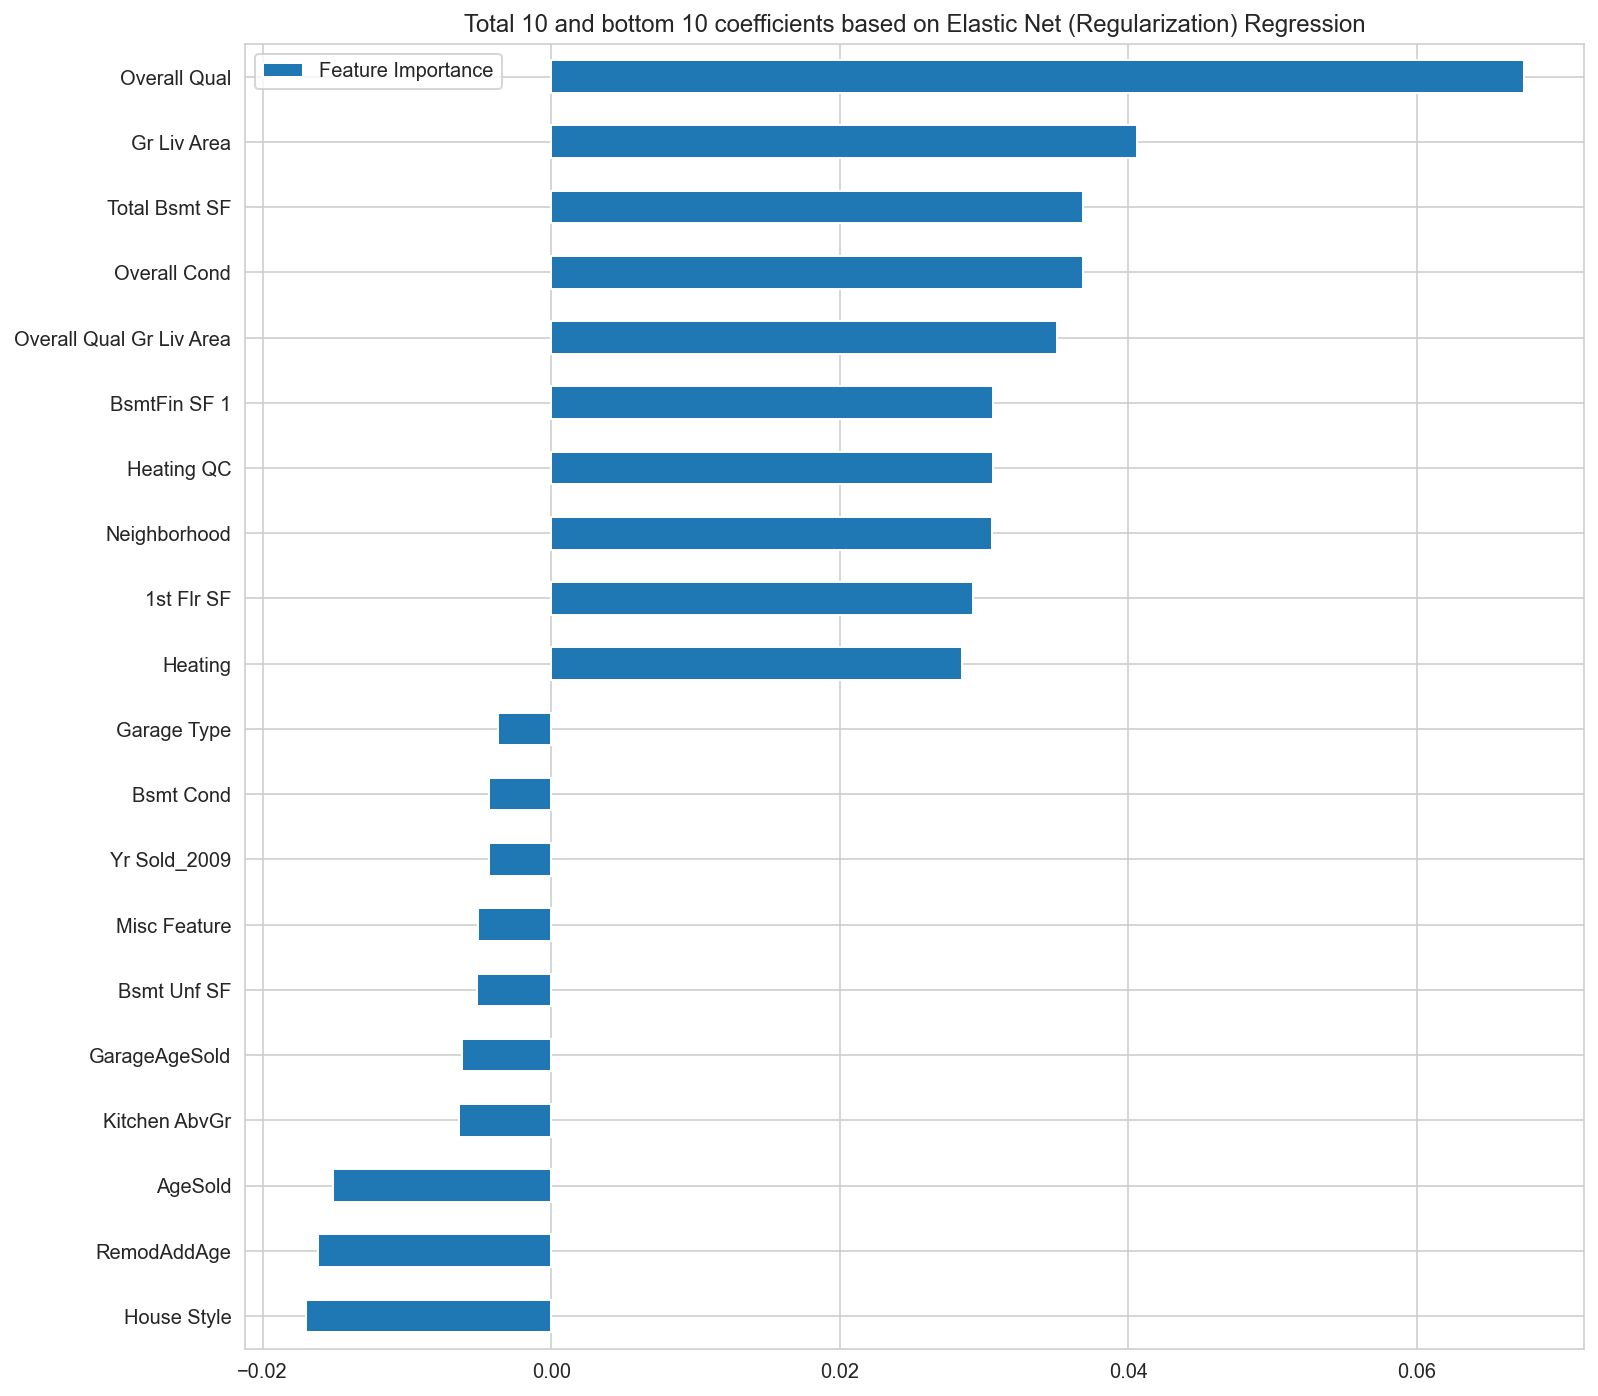

In [132]:
# view the top 10 and bottom 10 coefficients 
imp_features = pd.concat([gsen_features.sort_values('Feature Importance').head(10), gsen_features.sort_values('Feature Importance').tail(10)])
plt.rcParams['figure.figsize'] = (12, 12)
imp_features.plot(kind='barh')
plt.title('Total 10 and bottom 10 coefficients based on Elastic Net (Regularization) Regression')

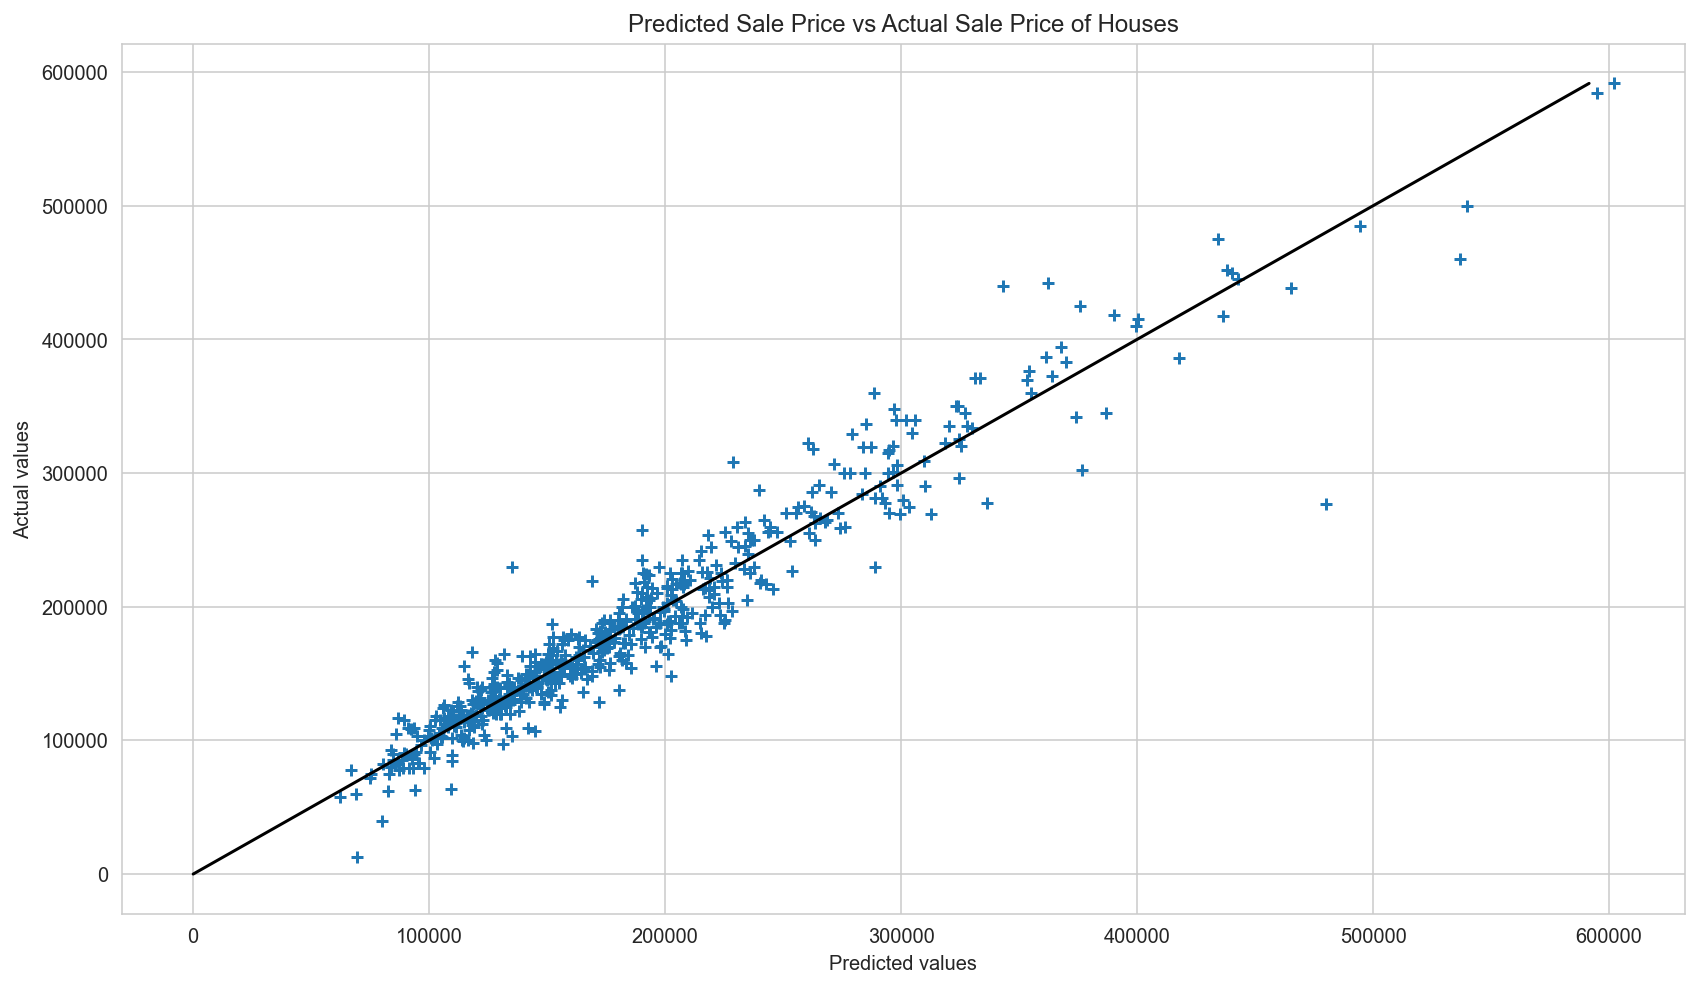

In [133]:
# create a list of the model's predictions for the test data
predictions = gsen.predict(X_test_sc)

# plot predicted values against actual values in the train/test split.
plt.figure(figsize=(14,8))
plt.scatter(np.exp(predictions), np.exp(y_test), marker='+')
plt.title('Predicted Sale Price vs Actual Sale Price of Houses')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

#Plots x=y line
plt.plot([0, np.max(np.exp(y_test))], [0,np.max(np.exp(y_test))], c='k');

#### Re-train on Full Training Dataset

In [134]:
X = train_df[features2]
y = train_df['SalePrice']

X_sc = sc.fit_transform(X)
y_log = np.log(y)

In [135]:
# initialize model for full training set
gsen_full = gsen.best_estimator_

In [136]:
# fit model on full training set
gsen_full.fit(X_sc, y_log)

# score model on full training set
gsen_full.score(X_sc, y_log)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.167133341125098, tolerance: 0.03468102248940234
  model = cd_fast.enet_coordinate_descent(


0.916076354657485

- The training score has increased from **0.9096737325** to **0.9160763547**, indicating that the model should be slightly more accurate as it is able to explain 91.6% of the variation in the sale prices in the full training dataset. 

### Applying model to Predict Housing Data from test dataset

In [137]:
# import the modified files 
test_df = pd.read_csv('datasets/test_modified.csv')

In [138]:
# view the shape of test_df
test_df.shape

(878, 91)

In [139]:
# view column values in test_df
test_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [140]:
# manually create new columns in test_df data

test_df['Overall Qual Gr Liv Area'] = test_df['Overall Qual'] * test_df['Gr Liv Area']
test_df['Neighborhood Gr Liv Area'] = test_df['Neighborhood'] * test_df['Gr Liv Area']
test_df['Exter Qual Gr Liv Area'] = test_df['Exter Qual'] * test_df['Gr Liv Area']
test_df['Gr Liv Area Kitchen Qual'] = test_df['Gr Liv Area'] * test_df['Kitchen Qual']
test_df['Bsmt Qual Gr Liv Area'] = test_df['Bsmt Qual'] * test_df['Gr Liv Area']

In [141]:
# view the new features created in test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 96 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        878 non-null    int64  
 1   PID                       878 non-null    int64  
 2   MS SubClass               878 non-null    int64  
 3   MS Zoning                 878 non-null    int64  
 4   Lot Frontage              878 non-null    float64
 5   Lot Area                  878 non-null    int64  
 6   Street                    878 non-null    int64  
 7   Alley                     878 non-null    int64  
 8   Lot Shape                 878 non-null    int64  
 9   Land Contour              878 non-null    int64  
 10  Utilities                 878 non-null    int64  
 11  Lot Config                878 non-null    int64  
 12  Land Slope                878 non-null    int64  
 13  Neighborhood              878 non-null    int64  
 14  Condition 

In [142]:
# retrieve the features2 created earlier
features2 = ['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Sale Type', 'TotalMainBath', 'TotalBath', 'TotalPorch', 'AgeSold', 'GarageAgeSold', 'RemodAddAge', 'Yr Sold_2006', 'Yr Sold_2007', 'Yr Sold_2008', 'Yr Sold_2009', 'Yr Sold_2010', 'Overall Qual Gr Liv Area', 'Neighborhood Gr Liv Area', 'Exter Qual Gr Liv Area', 'Gr Liv Area Kitchen Qual', 'Bsmt Qual Gr Liv Area']

In [143]:
# create X variable from test DataFrame
Xtest = test_df[features2]

# scale test set
Xtest_sc = sc.transform(Xtest)

In [144]:
# create a list of the model's predictions for the actual test data set
gsen_predictions = gsen_full.predict(Xtest_sc)

# reverse the log transformation applied on the sale prices
gsen_predictions = np.exp(gsen_predictions)

In [145]:
# create a submission csv
Xtest['SalePrice'] = gsen_predictions
Xtest['Id'] = test_df['Id']
submission_gsen = Xtest[['Id','SalePrice']]
submission_gsen.to_csv('datasets/gsen_submission.csv',index=False)

<ipython-input-145-e24237601f90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest['SalePrice'] = gsen_predictions
<ipython-input-145-e24237601f90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest['Id'] = test_df['Id']


In [146]:
# view the submission file
submission_gsen.head()

Id      SalePrice
0  2658  123712.147876
1  2718  163909.876997
2  2414  212644.330571
3  1989  103278.581684
4   625  172474.067216

In [147]:
# view the numerical description of the predicted SalePrice
submission_gsen['SalePrice'].describe()

count       878.000000
mean     179059.170515
std       81326.506971
min       50555.934736
25%      128213.711185
50%      158493.628342
75%      211239.597518
max      877682.507753
Name: SalePrice, dtype: float64

### Identifying the top 5 Neighborhoods

In [148]:
# import the modified files 
test_df = pd.read_csv('datasets/test_modified.csv')
gsen_saleprice = pd.read_csv('datasets/gsen_submission.csv')

In [149]:
# map the Neighborhood back their original names
test_df['Neighborhood'] = test_df['Neighborhood'].map({28:'StoneBr', 27:'NridgHt', 26:'NoRidge', 25:'GrnHill', 24:'Veenker', 23:'Timber', 22:'Somerst', 21:'ClearCr', 20:'Crawfor', 19:'CollgCr', 18:'Blmngtn', 17:'NWAmes', 16:'Gilbert', 15:'Greens', 14:'SawyerW', 13:'Mitchel', 12:'NAmes', 11:'Blueste', 10:'NPkVill', 9:'Sawyer', 8:'Landmrk', 7:'SWISU', 6:'Edwards', 5:'BrkSide', 4:'OldTown', 3:'BrDale', 2:'IDOTRR', 1:'MeadowV'})

In [150]:
# view mapped Neighborhood names
test_df[['Neighborhood']]

Neighborhood
0        OldTown
1         Sawyer
2        Gilbert
3        OldTown
4          NAmes
..           ...
873       NWAmes
874        NAmes
875       Sawyer
876        NAmes
877        NAmes

[878 rows x 1 columns]

In [151]:
# drop the SalePrice column in test data
test_df.drop('SalePrice', axis=1, inplace=True)

In [152]:
# view the predicted saleprice for test data
gsen_saleprice.head()

Id      SalePrice
0  2658  123712.147876
1  2718  163909.876997
2  2414  212644.330571
3  1989  103278.581684
4   625  172474.067216

In [153]:
# combine both test_df and gsen_saleprice
gsen_test_df = pd.merge(test_df, gsen_saleprice, on='Id', how='outer')
gsen_test_df.head()

Id        PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  \
0  2658  902301120            5          4          69.0      9142       2   
1  2718  905108090            8          6          68.0      9662       2   
2  2414  528218130           16          6          58.0     17104       2   
3  1989  902207150            1          4          60.0      8520       2   
4   625  535105100           13          6          68.0      9500       2   

   Alley  Lot Shape  Land Contour  ...  TotalPorch  AgeSold  GarageAgeSold  \
0      1          1             2  ...         172       96           96.0   
1      0          3             2  ...         170       29           29.0   
2      0          3             2  ...         124        0            0.0   
3      0          1             2  ...         184       84           72.0   
4      0          3             2  ...         261       46           46.0   

  RemodAddAge  Yr Sold_2006  Yr Sold_2007  Yr Sold_2008  Yr Sold_2009  \
0          56             1             0             0             0   
1          29             1             0             0             0   
2           0             1             0             0             0   
3           1             0             1             0             0   
4          46             0             0             0             1   

   Yr Sold_2010      SalePrice  
0             0  123712.147876  
1             0  163909.876997  
2             0  212644.330571  
3             0  103278.581684  
4             0  172474.067216  

[5 rows x 91 columns]

In [154]:
# view the information of the combined data
gsen_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    int64  
 4   Lot Frontage     878 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    int64  
 7   Alley            878 non-null    int64  
 8   Lot Shape        878 non-null    int64  
 9   Land Contour     878 non-null    int64  
 10  Utilities        878 non-null    int64  
 11  Lot Config       878 non-null    int64  
 12  Land Slope       878 non-null    int64  
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    int64  
 15  Condition 2      878 non-null    int64  
 16  Bldg Type        878 non-null    int64  
 17  House Style     

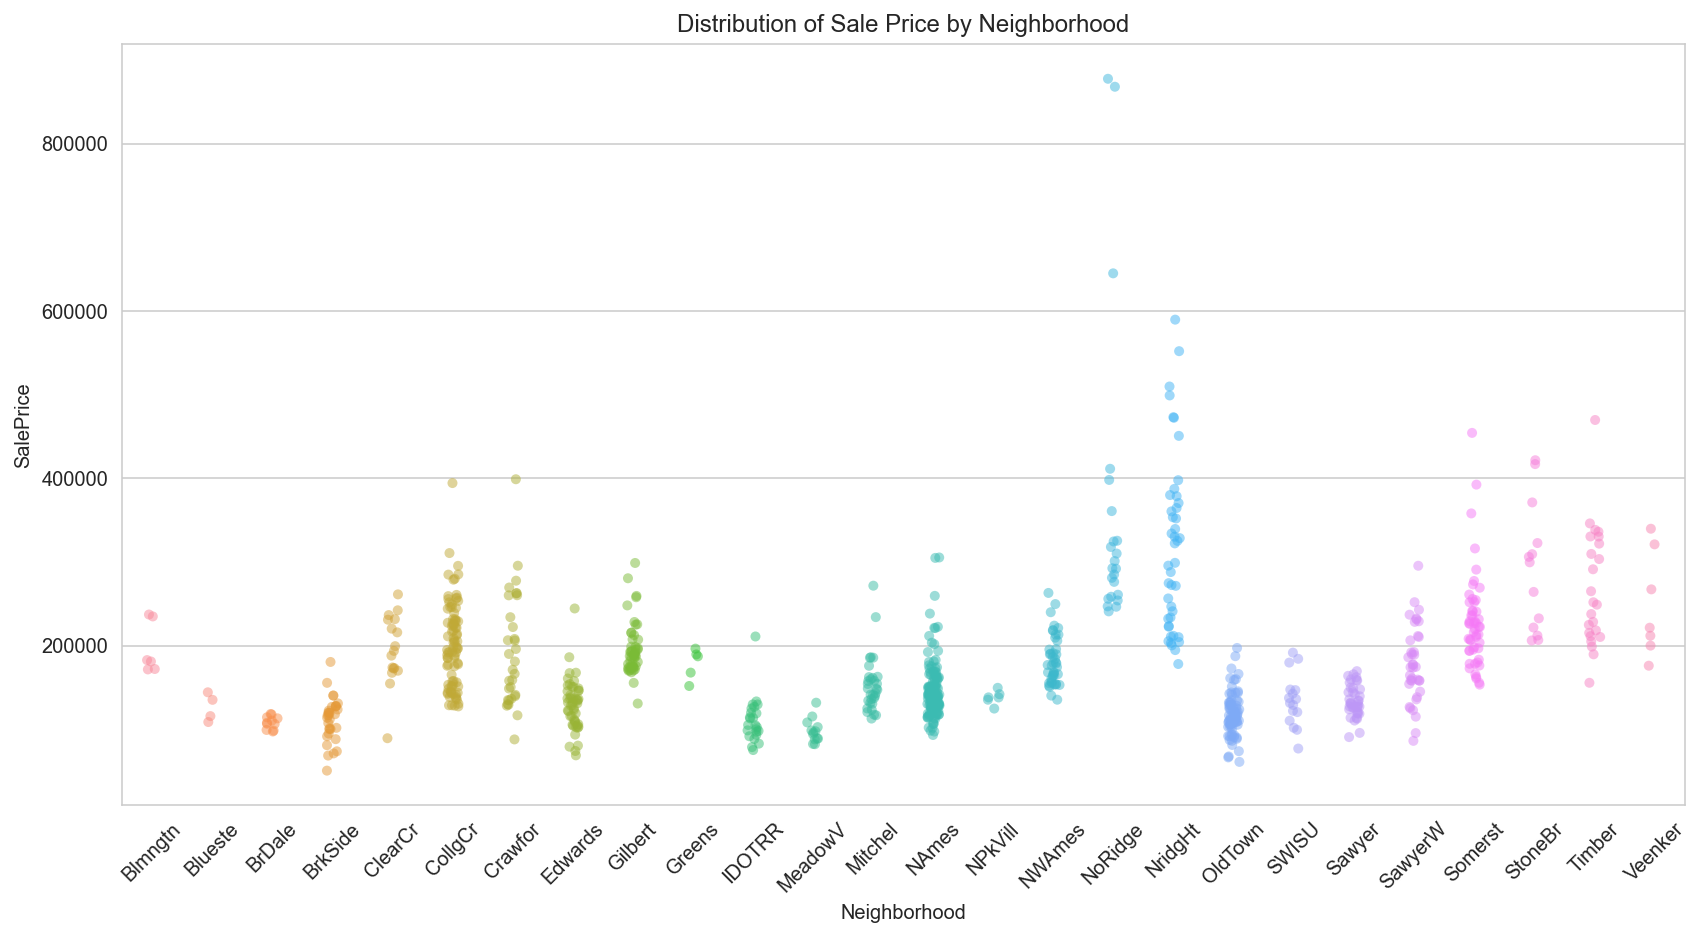

In [155]:
# view the distribution of SalePrice based on Neighborhood
plt.figure(figsize=(14,7))
sns.stripplot(x=gsen_test_df['Neighborhood'], y=gsen_test_df['SalePrice'], order=np.sort(gsen_test_df['Neighborhood'].unique()), jitter=0.1, alpha=0.5)
plt.xticks(rotation=45)
plt.title('Distribution of Sale Price by Neighborhood');

In [156]:
# compute the mean Sale price for each Neighborhood
mean_saleprice_by_neighborhood = gsen_test_df.groupby('Neighborhood')['SalePrice'].mean()
mean_saleprice_by_neighborhood

Neighborhood
Blmngtn    196588.635295
Blueste    125961.182043
BrDale     108134.257394
BrkSide    111552.742789
ClearCr    195372.473187
CollgCr    201456.851224
Crawfor    192621.280686
Edwards    129157.687786
Gilbert    195679.919576
Greens     178531.644094
IDOTRR     110468.844621
MeadowV     98088.981118
Mitchel    153279.396091
NAmes      147484.039625
NPkVill    137971.711019
NWAmes     182881.457382
NoRidge    362221.499193
NridgHt    319261.692432
OldTown    118181.315953
SWISU      134849.916050
Sawyer     134058.147560
SawyerW    178033.353321
Somerst    228582.786366
StoneBr    291625.548742
Timber     268283.794730
Veenker    248203.202023
Name: SalePrice, dtype: float64

In [157]:
# create a new variable to identify the total square feet per house 
gsen_test_df['Total Area in SF'] = gsen_test_df['Total Bsmt SF'] + gsen_test_df['1st Flr SF'] + gsen_test_df['2nd Flr SF'] + gsen_test_df['Garage Area']

# copute the SalePrice per Total Area in SF    
gsen_test_df['SalePrice per SF'] = gsen_test_df['SalePrice'] / gsen_test_df['Total Area in SF']

In [158]:
# compute the mean Sale price per SF for each Neighborhood
gsen_test_df.groupby('Neighborhood')['SalePrice per SF'].mean()

Neighborhood
Blmngtn    64.215815
Blueste    57.224342
BrDale     51.365213
BrkSide    53.068253
ClearCr    58.760456
CollgCr    63.019969
Crawfor    60.246508
Edwards    55.351763
Gilbert    67.113254
Greens     67.325725
IDOTRR     48.405445
MeadowV    57.671885
Mitchel    58.113202
NAmes      54.812122
NPkVill    54.728739
NWAmes     57.538147
NoRidge    73.461597
NridgHt    73.457463
OldTown    47.446511
SWISU      47.594600
Sawyer     52.341533
SawyerW    59.625082
Somerst    65.746673
StoneBr    70.486551
Timber     69.153531
Veenker    64.960272
Name: SalePrice per SF, dtype: float64

- By computing the mean Sale Price for each Neighborhood, we observe that the top 5 neighborhoods include: 
    - Northridge ('NoRidge') - USD 362,221
    - Northridge Heights ('NridgHt') - USD 319,262
    - Stone Brook ('StoneBr') - USD 291,626
    - Timber ('Timberland') - USD 268,284
    - Veenker ('Veenker') - USD 248,203


- On the other hand, when computing the mean Sale Price per Total Area (in square feet), we observe that the top 5 neighborhoods include:  
    - Northridge ('NoRidge') - USD 73.46/square feet
    - Northridge Heights ('NridgHt') - USD 73.46/square feet
    - Stone Brook ('StoneBr') - USD 70.49/square feet
    - Timber ('Timberland') - USD 69.15/square feet
    - Greens ('Greens') - USD 67.32/square feet 
    
    
- While Veenker is listed in the top 5 neighborhoods when comparing the mean Sale Price, its mean Sale Price per Total Area (in square feet) is only USD 64.96/square feet. 
    - This implies that the total area (in square feet) of the houses in Veenker is much larger than its counterparts, thus driving down the cost per square feet. 
    
    
- On the other hand, while Greens is listed in the top 5 neighborhoods when comparing mean Sale Price per Total Area (in square feet), its mean Sale Price is only USD 178,532.
    - This indicates that despite the lower mean Sale Price, it is much more costly to purchase each square feet for houses in Greens. In addition, the total area (in square feet) of the houses in Greens is much smaller than its counterparts.

### Identifying top features

In [159]:
# create a new variable with all features used to predict the model
Xtest_final = Xtest.drop(['SalePrice', 'Id'], axis=1)

In [160]:
# obtain the coefficients of the variables
gsen_test_features = pd.DataFrame({"Feature Importance":gsen_full.coef_}, index=Xtest_final.columns)

# view the table of coefficients
gsen_test_features.sort_values('Feature Importance', ascending=False)

Feature Importance
Overall Qual                        0.070735
Overall Cond                        0.040473
Gr Liv Area                         0.039052
Overall Qual Gr Liv Area            0.038249
Total Bsmt SF                       0.036260
...                                      ...
Kitchen AbvGr                      -0.006851
GarageAgeSold                      -0.009668
AgeSold                            -0.014446
RemodAddAge                        -0.015241
House Style                        -0.016200

[93 rows x 1 columns]

In [161]:
# to transform the coefficients of the variables derived from test dataset 
transformed_gsen_coef = []
for i in gsen_test_features.iloc[:,0]:
    z = math.exp(i)
    transformed_gsen_coef.append(z)
print(transformed_gsen_coef)

[1.018052483513352, 1.0270839196748258, 1.0112827485279423, 1.0114007913698693, 1.004556188588933, 1.0032845144221199, 1.0046668805530974, 1.008419442544492, 1.0016532445919257, 1.0026434462796334, 1.0008456750981, 1.0326863628994503, 1.0120990924909046, 1.0022245427892844, 1.0067247738544547, 0.983930652695567, 1.0732962774182377, 1.0413030162385757, 1.0137282267874963, 1.0143487316813367, 1.0036462172127898, 0.999342859927967, 1.0125220311217842, 0.9971584105962868, 1.0013698967349007, 1.0024148794705823, 1.0142643168889804, 1.0074956484544062, 1.0151302386063985, 1.0119438206532252, 0.9986594468536677, 1.012309878633106, 1.0128193668318959, 1.031629274638042, 0.9967577171654435, 1.0000086529037497, 0.9935487442674482, 1.0369251846714163, 1.0214816814033354, 1.0274449803486003, 1.0187682818052979, 1.0008870576985691, 1.0323095780520444, 1.0097976001182989, 0.9999642596381925, 1.0398249358517189, 1.012952519467468, 0.9953752708731191, 1.0053933896054628, 1.0018323488295418, 1.00213392

In [162]:
# to compute the effect of the variables' coefficients on the SalePrice
gsen_coef_effect = [(x-1) * gsen_test_df['SalePrice'].mean() for x in transformed_gsen_coef]

In [163]:
# to create a DataFrame featuring the variables and their effect on SalePrice
gsen_impact = pd.DataFrame(data=[Xtest_final.columns, gsen_coef_effect]).T

# to rename the columns
gsen_impact.columns = ['Features', 'Impact on SalePrice per 1-unit change']

# to view the DataFrame created
gsen_impact.sort_values('Impact on SalePrice per 1-unit change', ascending=False)

Features Impact on SalePrice per 1-unit change
16              Overall Qual                               13124.4
17              Overall Cond                               7395.68
45               Gr Liv Area                               7131.02
88  Overall Qual Gr Liv Area                               6981.57
37             Total Bsmt SF                               6611.79
..                       ...                                   ...
51             Kitchen AbvGr                              -1222.53
81             GarageAgeSold                              -1722.87
80                   AgeSold                              -2568.18
82               RemodAddAge                              -2708.28
15               House Style                              -2877.36

[93 rows x 2 columns]

- From the DataFrame above, it shows that the top 2 features that would result in the highest positive change in sale prices of houses are: 
    - **Overall material and finish quality** ('Overall Quality') - a house that has an Overall Qual score that is one rank above will allow the mean sale price to increase by USD 13,124, all else being equal. 
    - **Overall condition rating** ('Overall Cond') - a house that has an Overall Cond score that is one rank above will allow the mean sale price to increase by USD 7,396, all else being equal. 
    
    
- However, it should be noted that this DataFrame is not conclusive in predicting the changes in sale prices from features measured in square feet. For example: 
    -  Above grade (ground) living area ('Gr Liv Area') - a house that has one square feet bigger in its above grade (ground) living area does not necessarily imply that the mean sale price will increase by USD 7,131. 

## Conclusion and Recommendations

#### Prediction of sale prices of houses in Ames

In predicting the sale prices of the houses in Ames (using the test dataset) for IRE's review, the following information is derived derived:
- Mean Sale Price: USD 179,059
- Median Sale Price: USD 158,494
- Minimum Sale Price: USD 50,556
- Maximum Sale Price: USD: 877,683

#### Identification of top 5 neighborhoods in Ames that command high sale prices of housing

- By computing the mean Sale Price for each Neighborhood, we observe that the top 5 neighborhoods include: 
    - Northridge - USD 362,221
    - Northridge Heights - USD 319,262
    - Stone Brook - USD 291,626
    - Timber - USD 268,284
    - Veenker - USD 248,203


- On the other hand, when computing the mean Sale Price per Total Area (in square feet), we observe that the top 5 neighborhoods include:  
    - Northridge - USD 73.46/square feet
    - Northridge Heights - USD 73.46/square feet
    - Stone Brook - USD 70.49/square feet
    - Timber - USD 69.15/square feet
    - Greens - USD 67.32/square feet 
    
    
- To earn higher profit margins from the sale of houses, we would recommend that IRE focuses on houses in the neighborhoods of **Northridge, Northridge Heights, Stone Brook, Timber and Veenker**. As Ames expands its northern area, newer neighborhoods such as Northridge Heights will benefit from the construction of modern houses, thus commanding higher sale prices. 

#### Identification of top 2 features that would lead to an increase in sale price of the houses

- The top 2 features that would result in the highest positive change in sale prices of houses are:
    - **Overall material and finish quality** - a house that has an Overall Qual score that is one rank above will allow the mean sale price to increase by USD 13,124, all else being equal.
        - What this means is that IRE should consider the following aspects when identifying houses to invest in: 
            - Materials used should be highly decorative and of structural quality; 
            - Materials used should be designed for maximum durability, so that they can handle the effects of climate and environmental changes (i.e. use of stainless steel doors for an outdoor kitchen). 
            - Colours (i.e. light vs dark color scheme) and finishes (i.e. glossy vs matte surfaces) can affect the overall ambience of the house.
            - Source: [CWI.Design (2021)](https://www.creativewallcoverings.com/choosing-materials-and-finishes-important-aspects-to-consider/)
    
    - **Overall condition rating** - a house that has an Overall Cond score that is one rank above will allow the mean sale price to increase by USD 7,396, all else being equal.
        - What this means is that IRE should consider the following aspects when identifying houses to invest in: 
            - Any repair works for damages to structures, fixtures should be carried out promptly;
            - Interior refinement works are carried out such that the houses come across as though they have been individually designed; 
            - Immense amount of attention is given to the intricate details (both the interior and exterior), such that the house can be characterised by its excellent quality of workmanship. 
            - Source: [Spartanburg County (2021)](https://www.spartanburgcounty.org/DocumentCenter/View/291/Physical-Condition-Codes?bidId=)